# Black box assignment for I501

## By Kaicheng Yang | yangkc@iu.edu

In [1]:
import requests
import bs4

There are 10 different types of cells. Each of them is named with an airport name and assigned with a color. All the information can be found in the following table:

|id|name |Airport    |Country    |Color |
|--|-----|-----------|-----------|------|
|1 |gru  |São Paulo  |Brazil     |000000|
|2 |pty  |Tocumen    |Panama     |808080|
|3 |jfk  |New York   |U.S.       |0000FF|
|4 |lax  |L.A.       |U.S.       |FF00FF|
|5 |las  |Las Vegas  |U.S.       |00FFFF|
|6 |lis  |Lisbon     |Portugal   |008000|
|7 |bru  |Brussels   |Belgium    |FF0000|
|8 |hkg  |Hong Kong  |China      |FFA500|
|9 |icn  |Seoul      |South Korea|FFC0CB|
|10|mex  |Mexico City|Mexico     |FFFFFF|

Build a airports encode table to encode the airports name into numbers.

In [53]:
airports = ["gru", "pty", "jfk", "lax", "las", "lis", "bru", "hkg", "icn", "mex"]

In [189]:
cell_colors = ["#000000", "#808080", "#0000FF", "#FF00FF", "#00FFFF", "#008000", "#FF0000", "#FFA500", "#FFC0CB", "#70008c"]

In [57]:
airports_coding_table = {}
for i, item in enumerate(airports):
    airports_coding_table[item] = i+1

The `BlackBoxQuery` class is used to crawl data from the web page.

The `BlackBoxQuery.nextNSteps()` method can run the black box with n steps.

The current rounds can be seen by printing the `BlackBoxQuery` instance directly.

In [124]:
class BlackBoxQuery(object):
    def __init__(self):
        self.url = "http://homes.soic.indiana.edu/rocha/academics/i501/blackbox/BlackBox.php"
        self.s = requests.Session()
        self.r = self.s.get(self.url)
        self.parseHtml()
    
    def nextNSteps(self, cycles):
        self.r = self.s.get(self.url, params={"cycles": cycles})
        self.parseHtml()
    
    def getTable(self):
        table = []
        for item in self.soup.find_all("table")[0].children:
            if isinstance(item, bs4.element.Tag):
                inner_table = []
                for td in item.children:
                    if isinstance(td, bs4.element.Tag):
                         inner_table.append(airports_coding_table[td["class"][0]])
                table.append(inner_table)
        return np.asarray(table)
    
    def parseHtml(self):
        self.soup = bs4.BeautifulSoup(self.r.text)
        self.rounds = self.soup.find(id="controls").find("p").text
    
    def __repr__(self):
        return self.rounds

## Possible exploreation options:
- Check the long term behavior
- How to charactorize the system?
- Check the effect of different steps
- Divide the system into 4 different regions and see their different behaviors
- Check the correlations of the time series to see the update rule

In [158]:
from collections import Counter

In [140]:
bbq = BlackBoxQuery()

In [199]:
def crawlData(steps, rounds, interval):
    table_list = []
    bbq = BlackBoxQuery()
    for i in range(rounds):
        if interval > 0:
            if i % interval == 0:
                print i
        table_list.append(bbq.getTable())
        bbq.nextNSteps(steps)
    return table_list

In [227]:
def basicStat(table_list):
    stats = dict()
    for i in range(1, 11):
        stats[i] = list()
    for arr in table_list:
        stat = Counter(arr.flatten())
        for i in range(1, 11):
            stats[i].append(stat[i] / 400.)
    return stats

In [234]:
def getDiversity(table_list):
    diversity = []
    for arr in table_list:
        diversity.append(len(np.unique(arr.flatten())))
    return diversity

### Step = 1

In [211]:
table_list_s1_1 = crawlData(1, 100, 0)
stats_s1_1 = basicStat(table_list_s1_1)

In [212]:
table_list_s1_2 = crawlData(1, 100, 0)
stats_s1_2 = basicStat(table_list_s1_2)

In [213]:
table_list_s1_3 = crawlData(1, 100, 0)
stats_s1_3 = basicStat(table_list_s1_3)

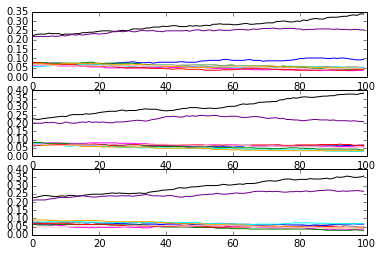

In [214]:
plt.subplot(3, 1, 1)
for i in range(1, 11):
    plt.plot(stats_s1_1[i], color=cell_colors[i-1])
plt.subplot(3, 1, 2)
for i in range(1, 11):
    plt.plot(stats_s1_2[i], color=cell_colors[i-1])
plt.subplot(3, 1, 3)
for i in range(1, 11):
    plt.plot(stats_s1_3[i], color=cell_colors[i-1])

### Step = 5

In [216]:
table_list_s5_1 = crawlData(5, 20, 0)
stats_s5_1 = basicStat(table_list_s5_1)

In [217]:
table_list_s5_2 = crawlData(5, 20, 0)
stats_s5_2 = basicStat(table_list_s5_2)

In [219]:
table_list_s5_3 = crawlData(5, 20, 0)
stats_s5_3 = basicStat(table_list_s5_3)

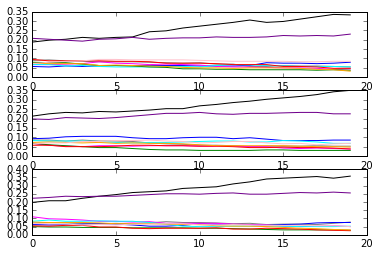

In [220]:
plt.subplot(3, 1, 1)
for i in range(1, 11):
    plt.plot(stats_s5_1[i], color=cell_colors[i-1])
plt.subplot(3, 1, 2)
for i in range(1, 11):
    plt.plot(stats_s5_2[i], color=cell_colors[i-1])
plt.subplot(3, 1, 3)
for i in range(1, 11):
    plt.plot(stats_s5_3[i], color=cell_colors[i-1])

# Long time behavior

Steps = 100

In [238]:
table_list_s100_1 = crawlData(100, 20, 0)
stats_s100_1 = basicStat(table_list_s100_1)
div_s100_1 = getDiversity(table_list_s100_1)

In [240]:
table_list_s100_2 = crawlData(100, 20, 0)
stats_s100_2 = basicStat(table_list_s100_2)
div_s100_2 = getDiversity(table_list_s100_2)

In [241]:
table_list_s100_3 = crawlData(100, 20, 0)
stats_s100_3 = basicStat(table_list_s100_3)
div_s100_3 = getDiversity(table_list_s100_3)

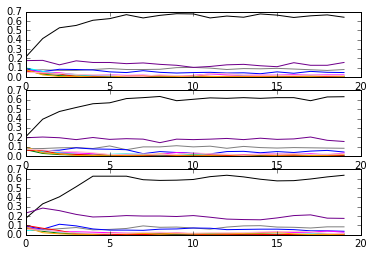

In [233]:
plt.subplot(3, 1, 1)
for i in range(1, 11):
    plt.plot(stats_s100_1[i], color=cell_colors[i-1])
plt.subplot(3, 1, 2)
for i in range(1, 11):
    plt.plot(stats_s100_2[i], color=cell_colors[i-1])
plt.subplot(3, 1, 3)
for i in range(1, 11):
    plt.plot(stats_s100_3[i], color=cell_colors[i-1])

See how many species are there in long time limit

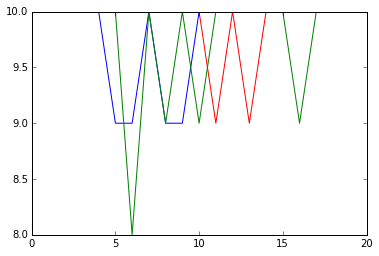

In [242]:
plot(div_s100_1)
plot(div_s100_2)
plot(div_s100_3)

Some conclusions:
- The system will converge to stable state after about 800 steps
- The steps interval don't seem to affect the result
- In the stable state all 10 species will exsit, but the distribution is heavily skewed
- The whole space can be divided into 4 10 by 10 squares where different rules apply

In [260]:
table_list_1000 = crawlData(1, 1000, 10)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [247]:
mask = np.where(table_list_s1_1[1].flatten() - table_list_s1_1[0].flatten() != 0)

In [358]:
stats_1000 = basicStat(table_list_1000)

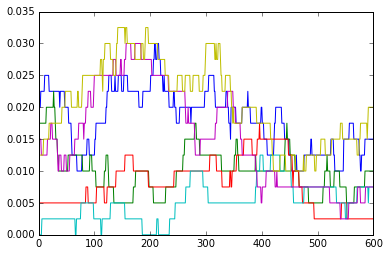

In [371]:
#plot(stats_1000[1])
#plot(stats_1000[2])
#plot(stats_1000[3])
plot(stats_1000[4][400:])
plot(stats_1000[5][400:])
plot(stats_1000[6][400:])
plot(stats_1000[7][400:])
plot(stats_1000[8][400:])
plot(stats_1000[9][400:])
#plot(stats_1000[10])

In [261]:
jumps = []
for n in range(999):
    mask = np.where(table_list_1000[n+1].flatten() - table_list_1000[n].flatten() != 0)
    jumps += zip(table_list_1000[n].flatten()[mask], table_list_1000[n+1].flatten()[mask])

In [262]:
print len(jumps)
jumps_counter = Counter(jumps)

1873


In [265]:
jumps_counter

Counter({(10, 1): 370, (1, 3): 195, (1, 2): 178, (3, 10): 112, (2, 1): 97, (2, 10): 68, (1, 10): 65, (3, 1): 56, (5, 1): 47, (1, 4): 47, (9, 10): 44, (4, 10): 39, (4, 1): 38, (3, 9): 23, (9, 1): 22, (8, 10): 20, (3, 2): 20, (2, 8): 19, (7, 1): 18, (8, 1): 17, (6, 1): 17, (2, 4): 16, (1, 5): 15, (2, 9): 14, (6, 10): 14, (2, 3): 14, (7, 10): 13, (8, 9): 12, (4, 2): 12, (5, 3): 12, (5, 2): 12, (2, 5): 11, (3, 8): 10, (9, 5): 9, (10, 2): 9, (9, 7): 8, (10, 4): 8, (1, 9): 8, (7, 3): 7, (7, 9): 7, (9, 3): 7, (2, 7): 7, (3, 6): 7, (3, 5): 7, (4, 3): 7, (1, 7): 7, (1, 6): 6, (7, 2): 6, (8, 2): 6, (6, 2): 5, (3, 7): 5, (4, 5): 5, (10, 5): 5, (4, 6): 5, (6, 7): 4, (4, 9): 4, (10, 3): 4, (1, 8): 4, (8, 3): 4, (9, 2): 4, (9, 8): 3, (5, 4): 3, (8, 5): 3, (6, 3): 3, (2, 6): 3, (6, 5): 3, (5, 9): 2, (8, 7): 2, (7, 8): 2, (7, 6): 2, (6, 8): 2, (6, 4): 2, (5, 10): 2, (3, 4): 2, (7, 5): 2, (4, 7): 1, (5, 7): 1, (10, 7): 1, (6, 9): 1, (4, 8): 1})

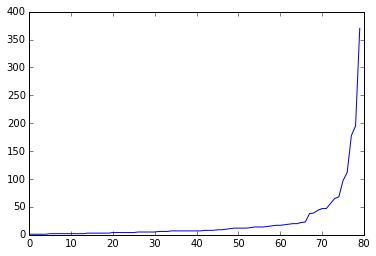

In [270]:
plot(sorted(jumps_counter.values()))

In [356]:
for key, value in jumps_counter.items():
    if key[0] == 5:
        print key, value

(5, 9) 2
(5, 4) 3
(5, 1) 47
(5, 7) 1
(5, 3) 12
(5, 10) 2
(5, 2) 12


In [357]:
for key, value in jumps_counter.items():
    if key[1] == 5:
        print key, value

(2, 5) 11
(8, 5) 3
(1, 5) 15
(4, 5) 5
(6, 5) 3
(10, 5) 5
(3, 5) 7
(7, 5) 2
(9, 5) 9


In [375]:
def getNeighbor(n, l=20):
    neighbors = []
    # left
    if n % l != 0:
        neighbors.append(n-1)
    
    # up left
    if n % l != 0 and n >= l:
        neighbors.append(n-l-1)
    
    # up
    if n >= l:
        neighbors.append(n-l)
    
    # up right
    if n >= l and (n+1) % l != 0:
        neighbors.append(n-l+1)
    
    # r
    if (n+1) % l != 0:
        neighbors.append(n+1)
    
    # right bottom
    if (n+1) % l != 0 and n < l*(l-1):
        neighbors.append(n+l+1)
    
    # d
    if n < l*(l-1):
        neighbors.append(n+l)
        
    # left bottom
    if n % l != 0 and n < l*(l-1):
        neighbors.append(n+l-1)
    return neighbors

In [402]:
def temp(n):
    mask = np.where(table_list_1000[n+1].flatten() - table_list_1000[n].flatten() != 0)
    for m in mask[0]:
        print "%d => %d " % (table_list_1000[n].flatten()[m], table_list_1000[n+1].flatten()[m]), (table_list_1000[n].flatten())[getNeighbor(m)]

In [403]:
temp(0)

8 => 9  [1 7 1]
1 => 10  [10  1 10 10 10  1 10 10]
2 => 3  [ 5 10  9  1  9  8  4  9]
5 => 1  [2 4 5 8 3 9 4 7]


In [404]:
temp(1)

4 => 10  [ 1 10  9  3  7 10  2 10]
6 => 5  [1 1 4 6 5]


In [405]:
temp(2)

10 => 1  [ 1 10  1  1 10 10 10 10]
6 => 10  [9 6 6 1 8 1 9 2]


In [406]:
temp(3)

3 => 10  [ 9 10  1  4  3  6  7 10]
9 => 1  [3 2 1 5 2 1 5 7]


In [407]:
temp(4)

1 => 3  [ 4 10  8  6 10]
10 => 1  [ 1  1  1 10 10 10 10 10]
9 => 1  [10 10  1  1  1  9  3  5]
5 => 1  [ 6  3 10  6  6  4  5  3]


In [488]:
temp(8)

1 => 4  [ 8 10  1  9  7  3  4  8]
10 => 1  [ 1  1 10 10  1]
6 => 1  [10  1  4  2  5  8  7  1]


# Divied view

In [444]:
base_arr = arange(10)
upleft = arange(10)
for i in range(9):
    upleft = np.concatenate((upleft, (base_arr + 20*(i+1))))
#    print len(upleft)

In [445]:
upright = upleft + 10

In [449]:
downleft = upleft + 200

In [451]:
downright = downleft + 10

In [459]:
table_list_1000[1].flatten()[upleft]

array([ 1, 10, 10,  1, 10, 10, 10,  1,  1, 10,  1, 10,  1, 10, 10,  1, 10,
        1, 10, 10,  1,  1, 10, 10, 10,  1,  1, 10,  1,  1,  1, 10,  1,  1,
       10, 10,  1,  1, 10,  1, 10,  1,  1, 10, 10,  1,  1, 10, 10, 10,  1,
        1, 10, 10,  1, 10, 10,  1, 10,  1,  1, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10,  1, 10,  1, 10, 10,  1, 10,  1, 10,  1,  1, 10,
       10,  1, 10,  1, 10,  1,  1, 10,  1, 10, 10, 10,  1,  1,  1])

In [460]:
def basicStatRegional(table_list, mask):
    stats = dict()
    for i in range(1, 11):
        stats[i] = list()
    for arr in table_list:
        stat = Counter(arr.flatten()[mask])
        for i in range(1, 11):
            stats[i].append(stat[i] / 400.)
    return stats

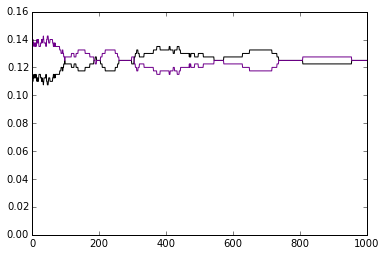

In [464]:
stats_rigional_s1000_upleft = basicStatRegional(table_list_1000, upleft)
for i in range(1, 11):
    plt.plot(stats_rigional_s1000_upleft[i], color=cell_colors[i-1])

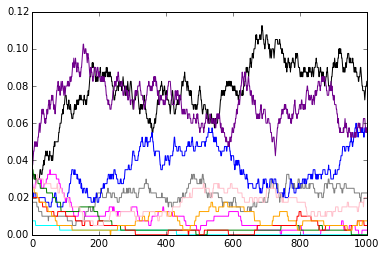

In [465]:
stats_rigional_s1000_upright = basicStatRegional(table_list_1000, upright)
for i in range(1, 11):
    plt.plot(stats_rigional_s1000_upright[i], color=cell_colors[i-1])

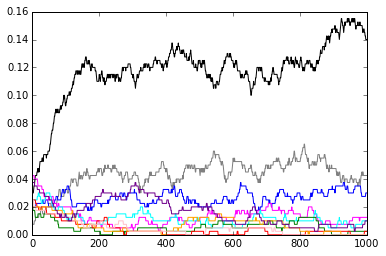

In [466]:
stats_rigional_s1000_downleft = basicStatRegional(table_list_1000, downleft)
for i in range(1, 11):
    plt.plot(stats_rigional_s1000_downleft[i], color=cell_colors[i-1])

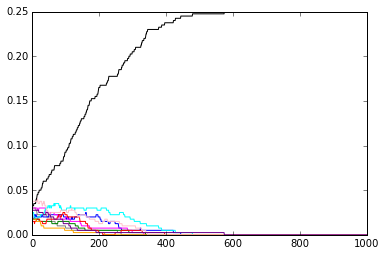

In [467]:
stats_rigional_s1000_downright = basicStatRegional(table_list_1000, downright)
for i in range(1, 11):
    plt.plot(stats_rigional_s1000_downright[i], color=cell_colors[i-1])

In [476]:
def jumpPattern(n, region_mask):
    mask = np.where(table_list_1000[n+1].flatten() - table_list_1000[n].flatten() != 0)
    for m in mask[0]:
        if m in region_mask:
            print "%d => %d " % (table_list_1000[n].flatten()[m], table_list_1000[n+1].flatten()[m]), (table_list_1000[n].flatten())[getNeighbor(m)]

In [490]:
def jumpPatternStat(num, region_mask):
    stat = []
    for n in range(num):
        mask = np.where(table_list_1000[n+1].flatten() - table_list_1000[n].flatten() != 0)
        for m in mask[0]:
            if m in region_mask:
                stat.append((table_list_1000[n].flatten()[m], table_list_1000[n+1].flatten()[m]))
    return stat

In [491]:
jpstat = jumpPatternStat(999, upleft)

In [493]:
jpcounter = Counter(jpstat)

In [494]:
jpcounter

Counter({(10, 1): 47, (1, 10): 42})

In [477]:
for i in range(10):
    jumpPattern(i, upleft)

1 => 10  [10  1 10 10 10  1 10 10]
10 => 1  [ 1 10  1  1 10 10 10 10]
10 => 1  [ 1  1  1 10 10 10 10 10]
1 => 10  [10 10 10 10  1]
10 => 1  [ 1  1 10 10  1]
1 => 10  [10  1 10 10 10 10 10 10]


In [478]:
for i in range(100):
    jumpPattern(i, downright)

5 => 1  [2 4 5 8 3 9 4 7]
5 => 1  [ 6  3 10  6  6  4  5  3]
5 => 3  [8 3 9 9 9 1 1 3]
7 => 3  [9 7 4 9 1 9 1 6]
3 => 7  [9 7 4 9 1 9 1 6]
5 => 3  [4 5 3 3 8 3 1 2]
2 => 1  [9 9 8 8 1 5 7 1]
8 => 1  [2 1 4 2 2]
3 => 7  [4 5 3 3 8 3 1 2]
2 => 1  [10  8  4  3  6  3  4 10]
2 => 1  [4 8 1 1 9 9 8 2]
4 => 9  [8 7 5 3 7 1 2 4]
9 => 5  [ 8  1  9  4 10]
9 => 1  [7 9 7 4 7 1 6 7]
10 => 4  [ 1 10 10  3  5  2  6  4]
6 => 1  [ 1  7  1  7  1  1  9 10]
7 => 9  [10  1  7  5  7  9  9  9]
8 => 5  [5 1 7 6 1 1 4 7]
8 => 1  [ 2  4  1  9  5  4 10  6]
9 => 3  [10  1  1  1  1  3  4  1]
9 => 1  [8 7 5 3 7 1 2 4]
7 => 1  [ 1  8  4 10  6  1  5  5]
3 => 9  [4 3 1 4 9]
10 => 1  [ 4  4  1 10  6  9  6  1]
8 => 9  [ 9  4  2 10  8  1  1  9]
9 => 5  [ 9 10  9  7  9  3  3 10]
9 => 5  [ 5  8 10  9  5  3 10 10]
4 => 5  [5 1 6 5 2 9 9 9]
4 => 10  [ 8 10  4  1  1  6  1  1]
9 => 7  [ 1  7  1  5 10  1  4  1]
9 => 1  [3 3 5 5 9 9 3 8]
2 => 7  [2 2 5]
9 => 5  [1 5 5 2 9 1 9 3]
10 => 1  [10  5 10  1  4  3  5  7]
4 => 3  [10 10 

In [479]:
for i in range(100):
    jumpPattern(i, downleft)

2 => 3  [ 5 10  9  1  9  8  4  9]
6 => 5  [1 1 4 6 5]
9 => 1  [3 2 1 5 2 1 5 7]
9 => 1  [10 10  1  1  1  9  3  5]
4 => 2  [ 4  7  5 10  7  4  5  6]
10 => 1  [ 3  8 10  1 10  1 10  4]
6 => 1  [ 8  9 10  3  9]
6 => 1  [10  1  4  2  5  8  7  1]
7 => 2  [ 4  6 10 10  5  2  4  1]
9 => 3  [4 4 6 3 1 1 8 7]
7 => 1  [6 4 3 5 1]
10 => 5  [ 5 10  5 10  5  9  7  2]
4 => 1  [10  3  9  4  4  1  2  9]
4 => 6  [ 4 10  4  6  3  8  7  4]
1 => 5  [3 6 3 4 9 7 1 8]
7 => 1  [ 4  1  7  1  6  9 10  1]
1 => 2  [10  1  4  2  5  8  7  1]
5 => 1  [1 4 7 8 8 1 2 1]
10 => 1  [ 4  3  1 10  1  6  4  6]
8 => 1  [ 7  2  5  4 10  4  9  3]
5 => 2  [ 5 10  5 10  5  9  7  2]
6 => 7  [4 8 4 7 3 5 3 6]
5 => 2  [ 2  4  2  7  4 10  1  7]
4 => 1  [3 1 1 4 6]
2 => 8  [ 2  4  2  7  4 10  1  7]
2 => 3  [ 9 10  1  4  1  1  3  3]
1 => 5  [8 3 5 9 7 1 4 8]
3 => 1  [ 8 10  1  1  1]
4 => 1  [6 1 1 1 6 4 3 1]
4 => 6  [1 9 4 6 7 1 1 3]
10 => 2  [3 9 8]
4 => 3  [ 5  1  1 10  6  4  6  5]
9 => 5  [ 3  7  1 10  4  6  1 10]
7 => 5  [5 5 9 7

In [480]:
for i in range(100):
    jumpPattern(i, upright)

8 => 9  [1 7 1]
4 => 10  [ 1 10  9  3  7 10  2 10]
6 => 10  [9 6 6 1 8 1 9 2]
3 => 10  [ 9 10  1  4  3  6  7 10]
1 => 3  [ 4 10  8  6 10]
8 => 10  [ 6 10 10 10  7 10  5  6]
6 => 10  [10  4  3 10  8  8  8  2]
10 => 1  [ 9 10  1  4  3  6  7 10]
1 => 4  [ 8 10  1  9  7  3  4  8]
5 => 10  [ 1 10  4  9  3  1 10  1]
3 => 9  [4 4 7 2 7]
1 => 4  [ 9 10  1  4  3  6  7 10]
10 => 1  [ 3  5  6 10  6  6  1  6]
2 => 9  [6 7 4 1 2 6 2 1]
8 => 9  [6 3 4 1 3 1 6 6]
9 => 10  [10 10  6  5  8  4  8  1]
6 => 10  [10  6  6  9  6 10  9  7]
2 => 10  [ 1  6  9  2  6 10 10 10]
8 => 10  [ 4 10  7  6  1 10  6  5]
7 => 10  [4 6 1 1 9]
10 => 1  [10  7  6  9  7 10  4  5]
10 => 1  [4 6 1 1 9]
6 => 10  [ 1  6 10 10 10  5  6  1]
4 => 10  [ 2  3 10 10  9]
1 => 4  [10  7  6  9  7 10  4  5]
4 => 10  [ 7  6 10  9  1  2  9  6]
4 => 10  [ 1 10  1  4  9  3 10  1]
2 => 10  [ 9 10  1  8  3  6  6 10]
10 => 1  [10 10  6  6 10  9  7 10]
7 => 10  [4 1 9 9 4]
10 => 1  [4 1 9 9 4]
9 => 10  [ 9  1  4  7  3 10  8  1]
10 => 1  [ 1  6  9

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

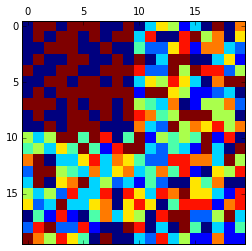

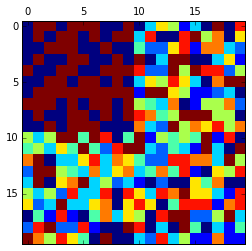

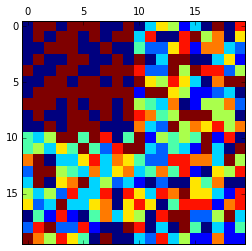

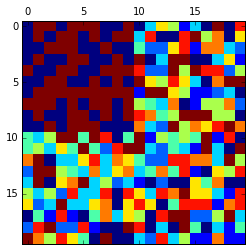

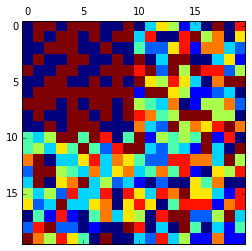

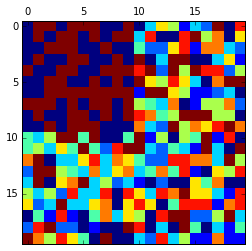

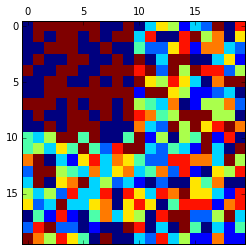

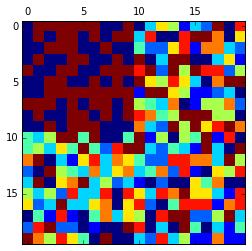

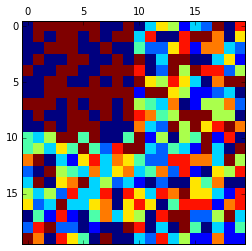

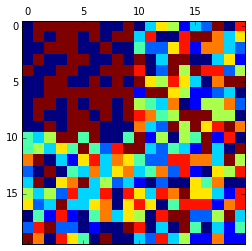

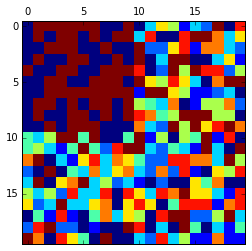

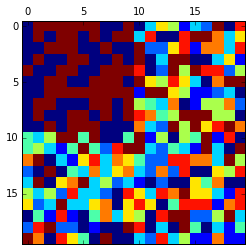

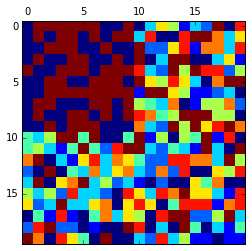

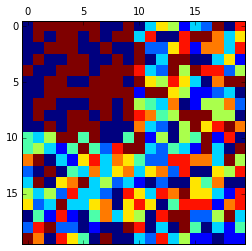

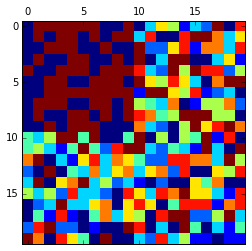

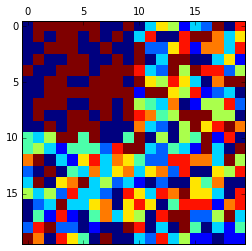

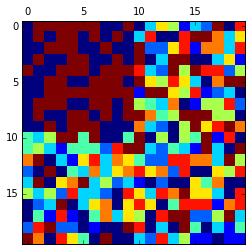

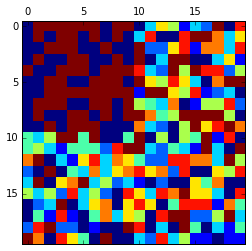

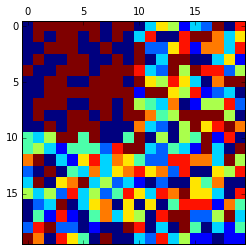

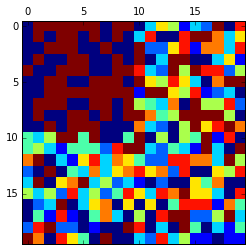

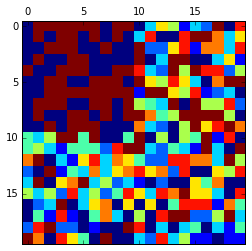

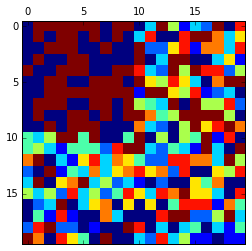

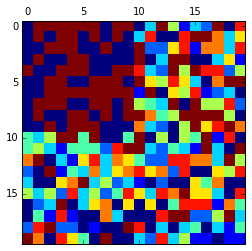

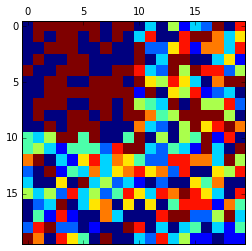

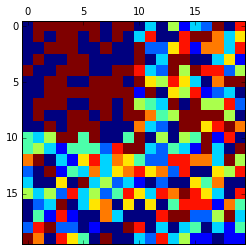

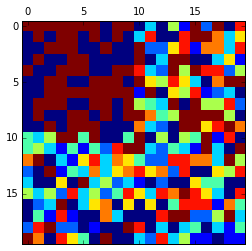

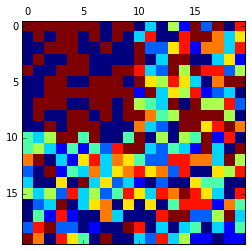

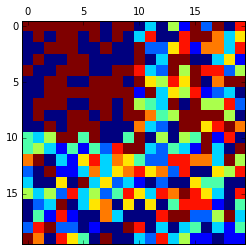

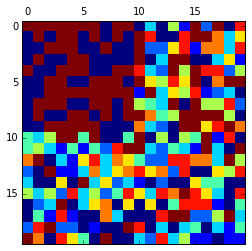

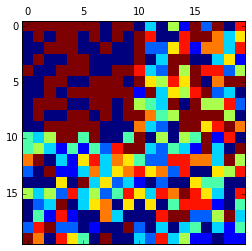

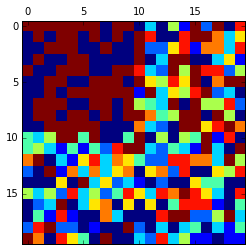

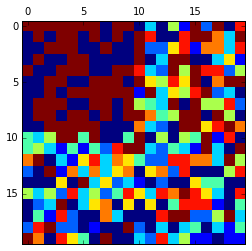

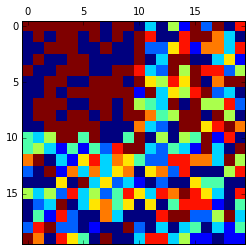

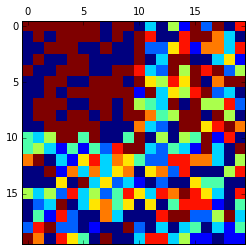

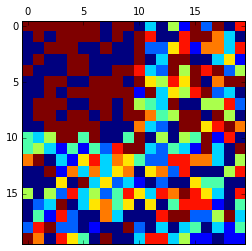

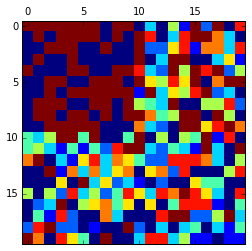

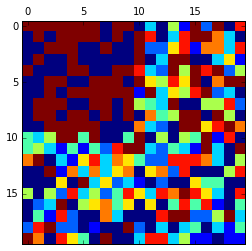

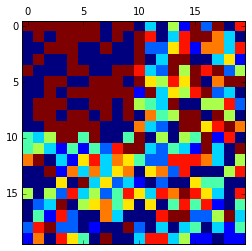

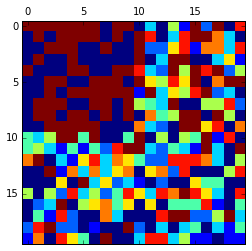

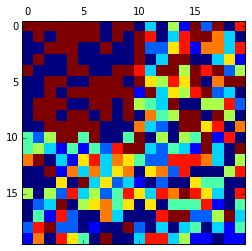

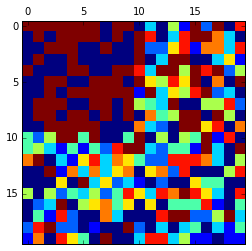

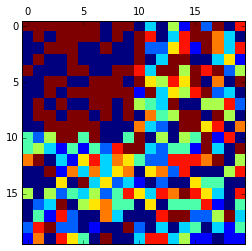

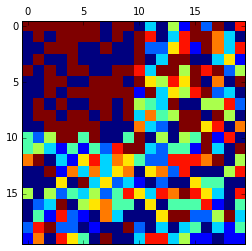

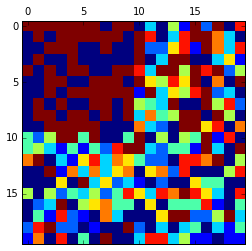

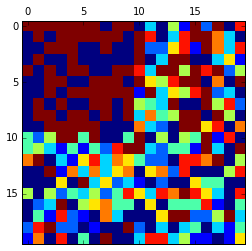

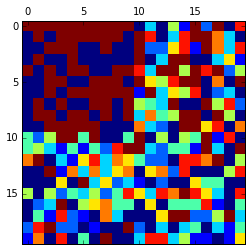

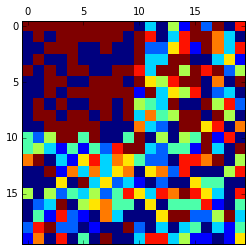

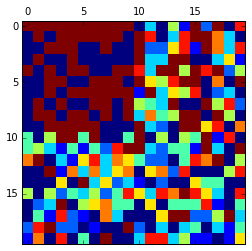

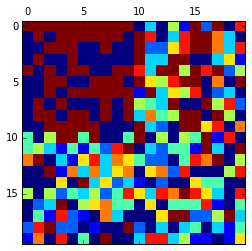

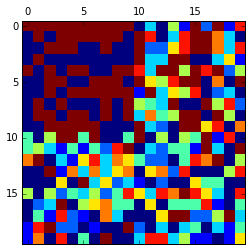

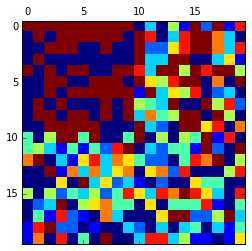

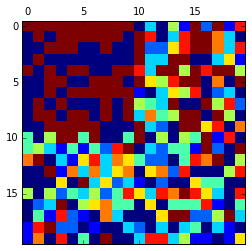

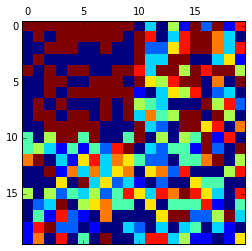

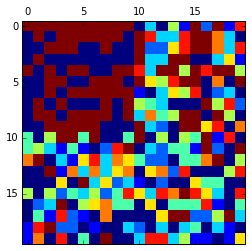

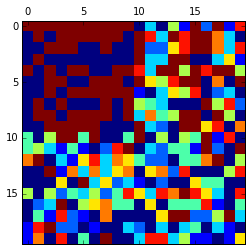

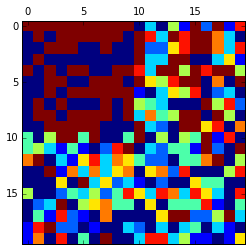

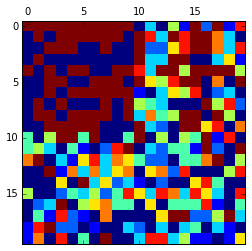

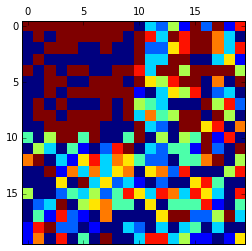

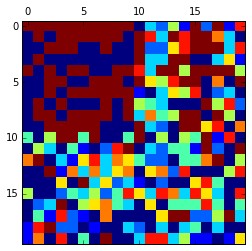

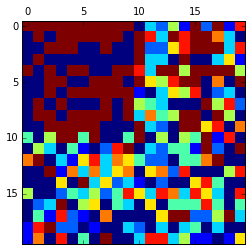

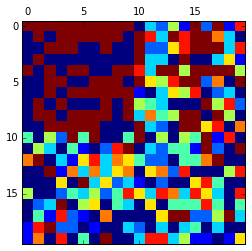

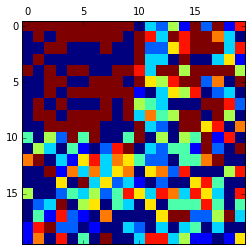

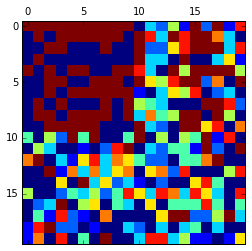

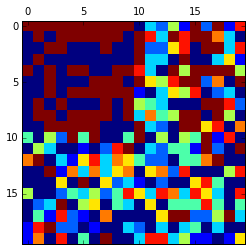

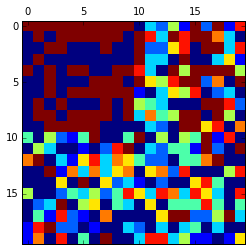

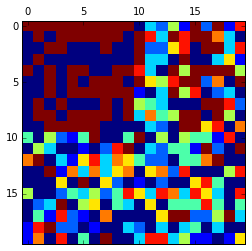

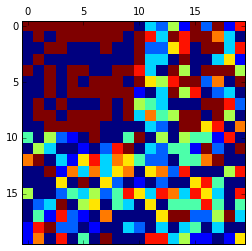

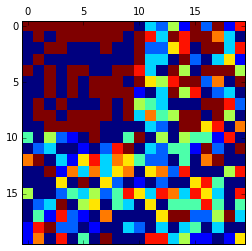

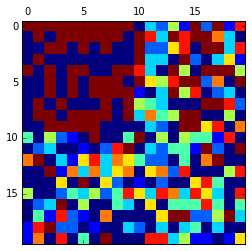

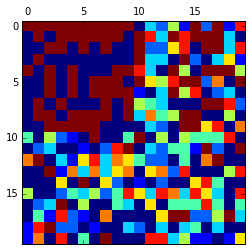

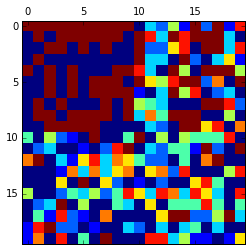

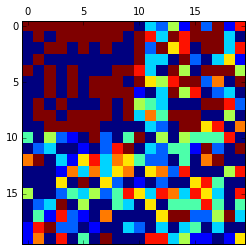

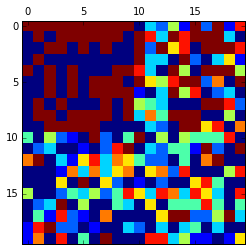

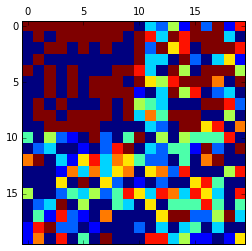

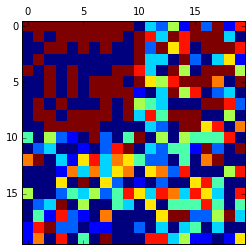

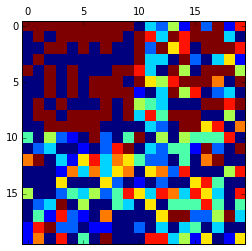

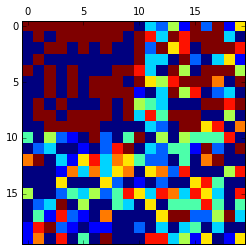

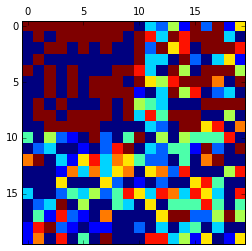

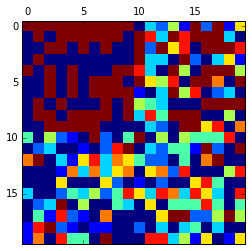

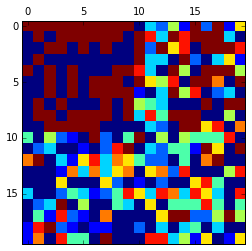

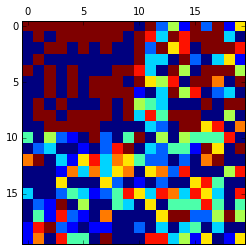

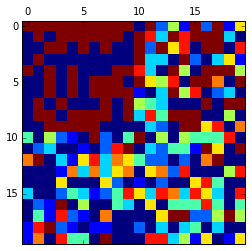

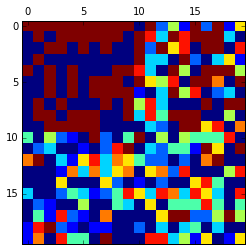

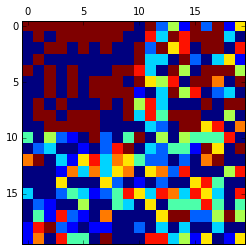

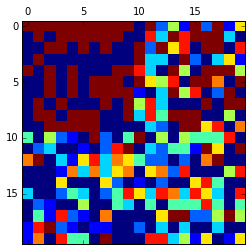

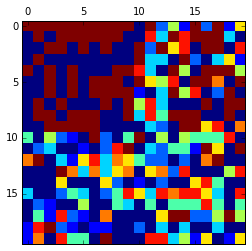

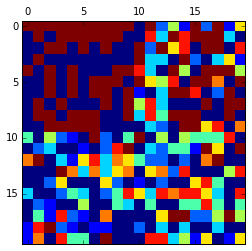

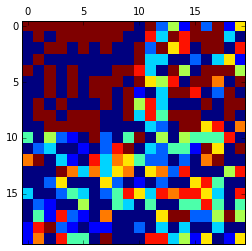

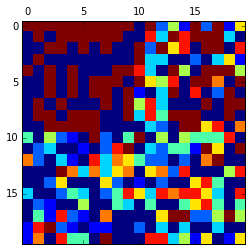

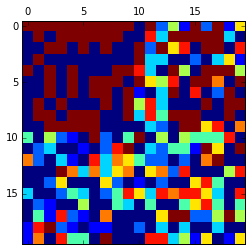

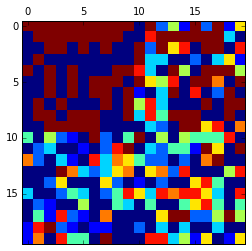

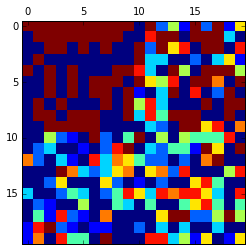

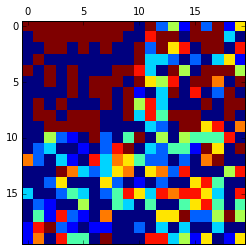

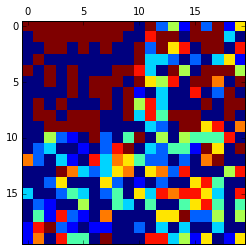

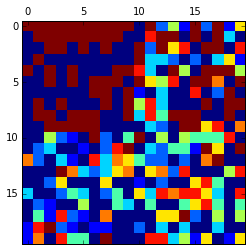

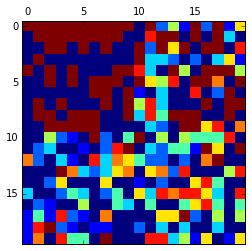

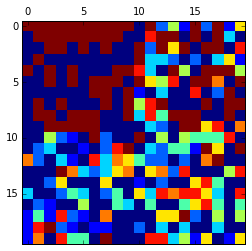

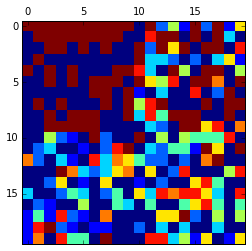

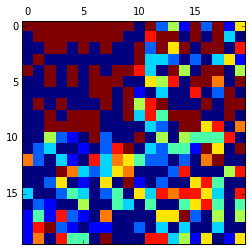

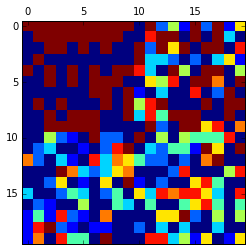

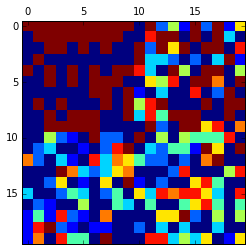

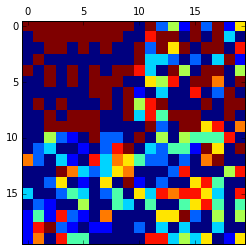

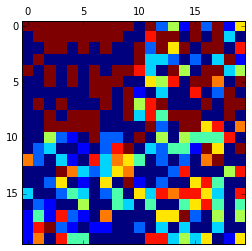

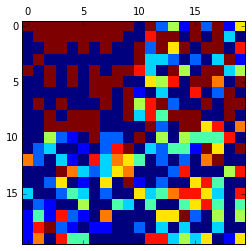

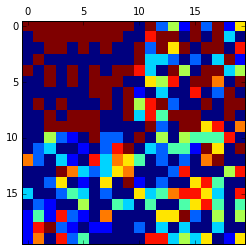

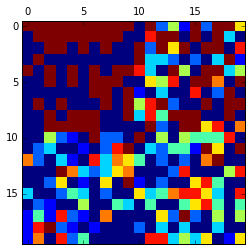

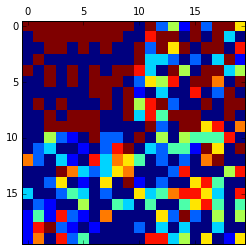

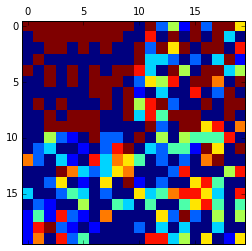

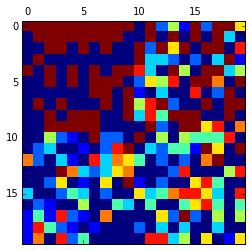

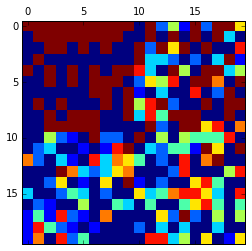

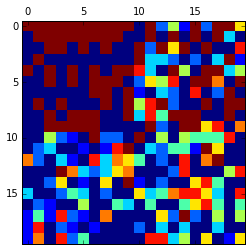

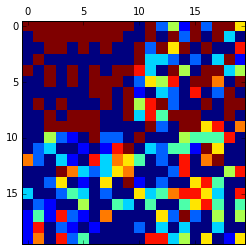

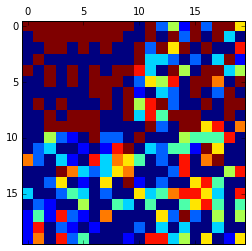

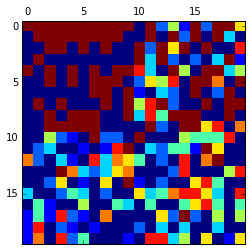

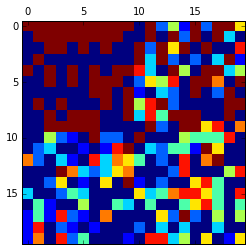

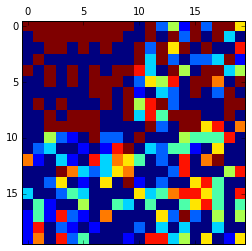

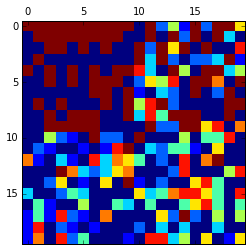

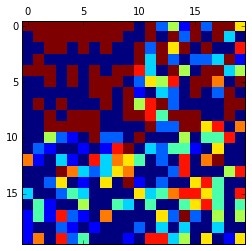

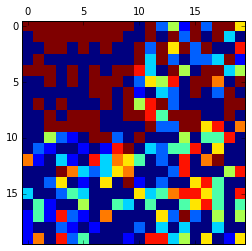

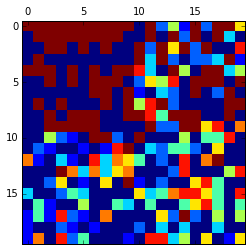

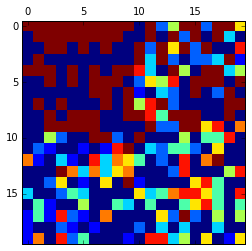

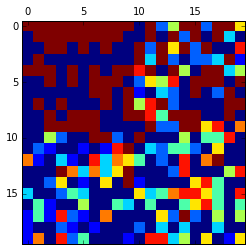

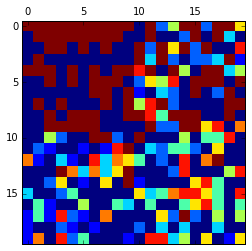

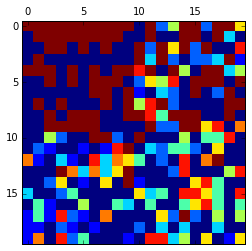

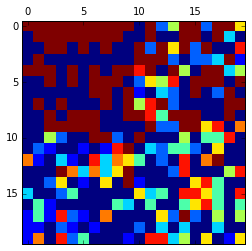

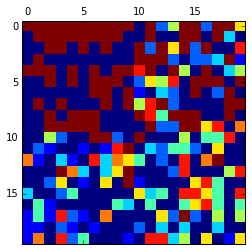

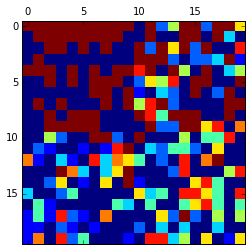

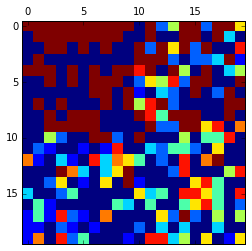

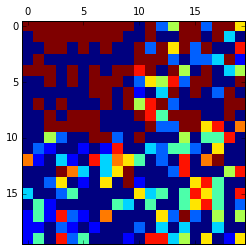

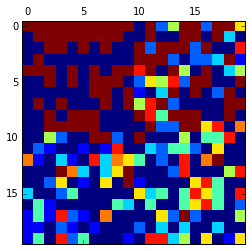

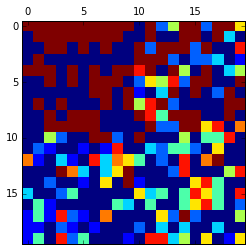

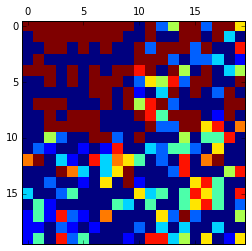

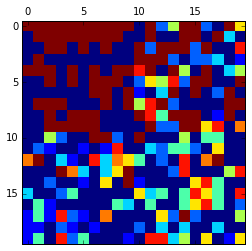

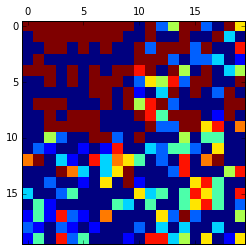

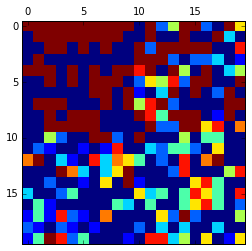

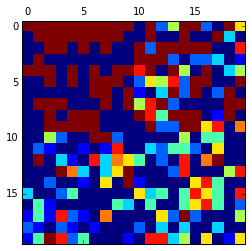

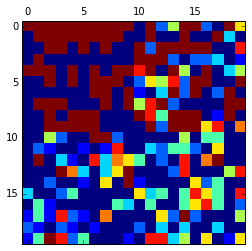

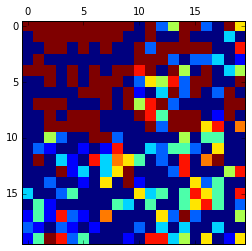

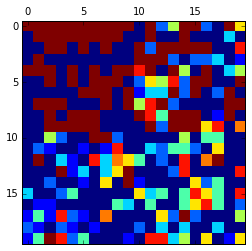

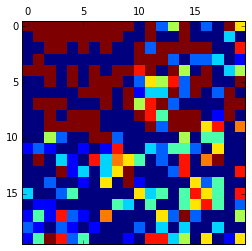

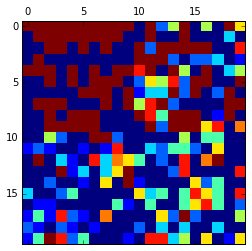

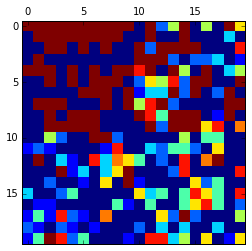

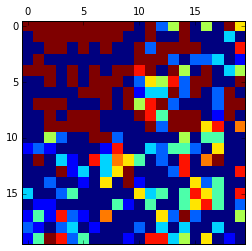

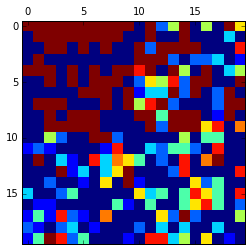

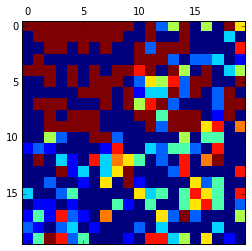

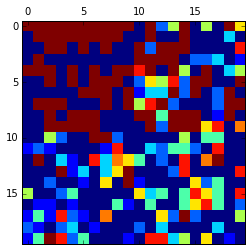

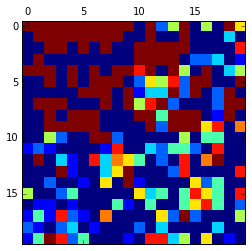

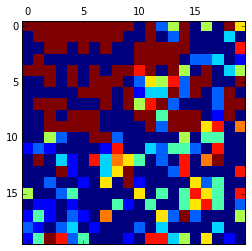

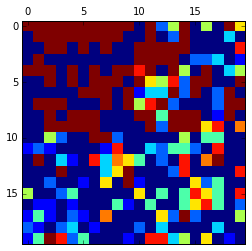

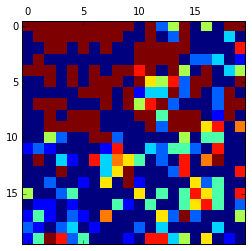

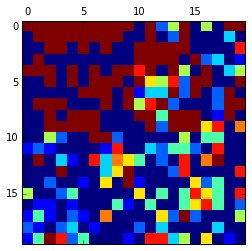

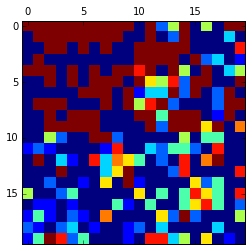

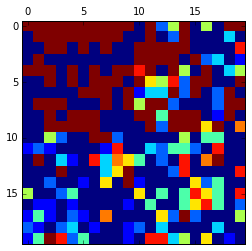

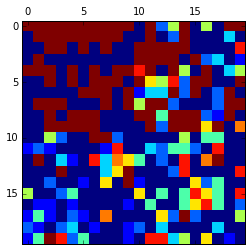

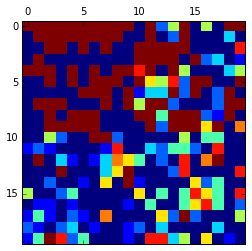

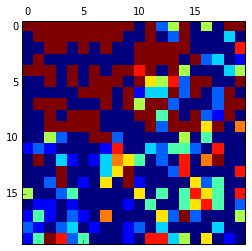

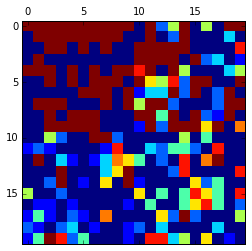

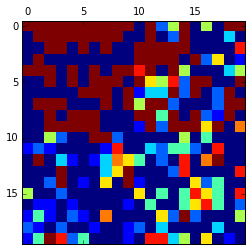

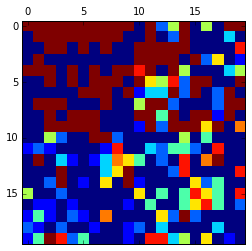

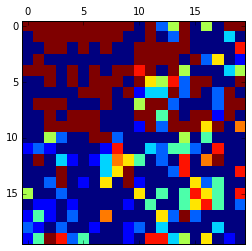

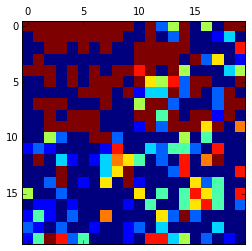

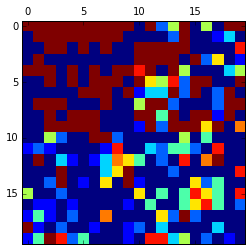

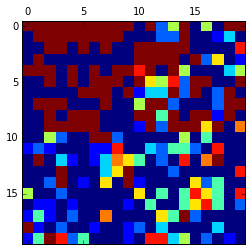

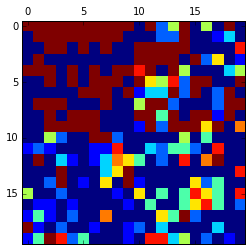

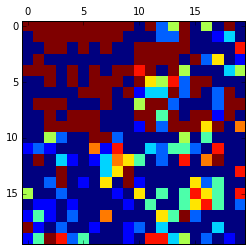

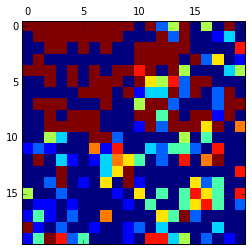

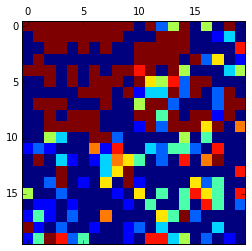

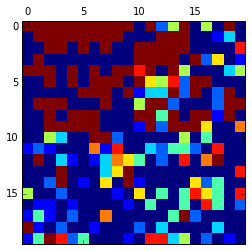

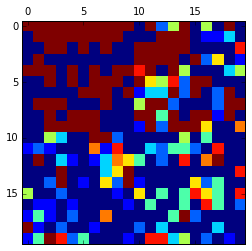

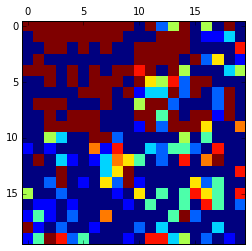

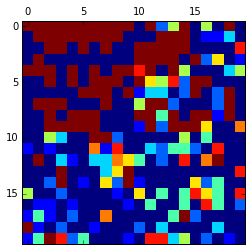

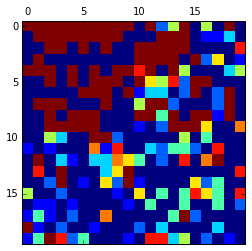

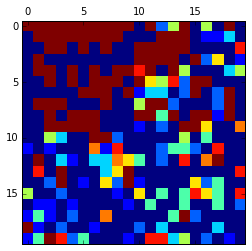

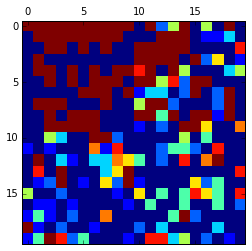

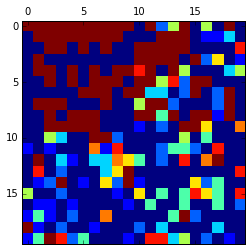

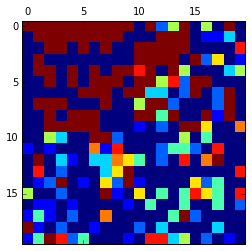

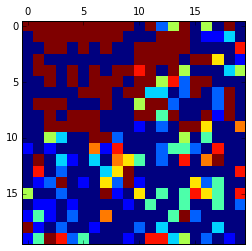

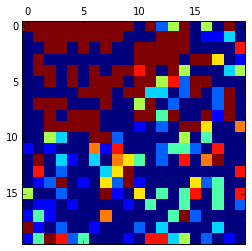

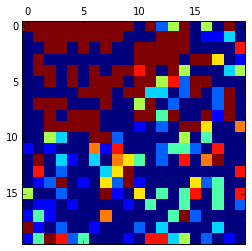

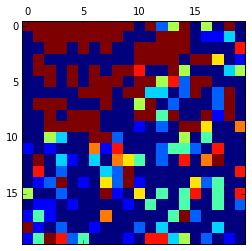

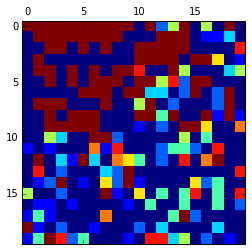

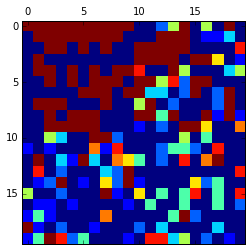

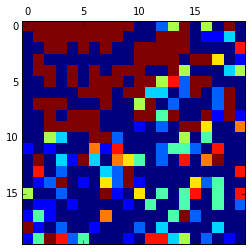

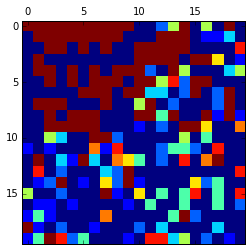

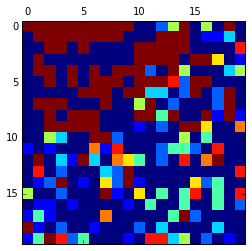

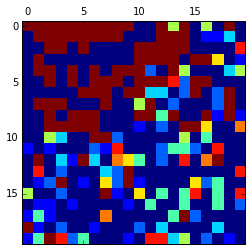

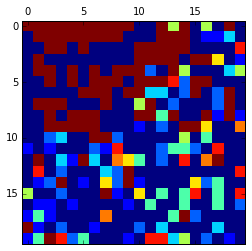

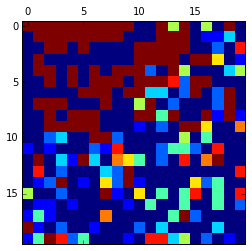

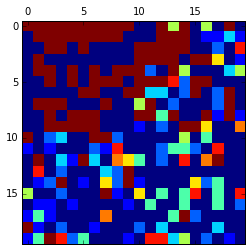

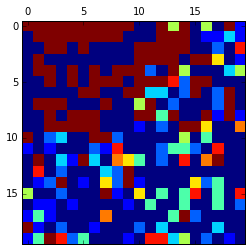

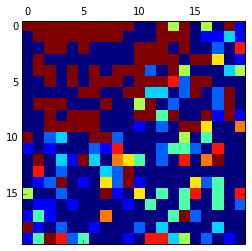

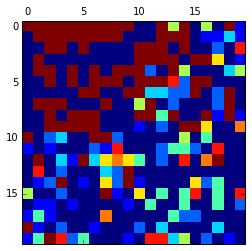

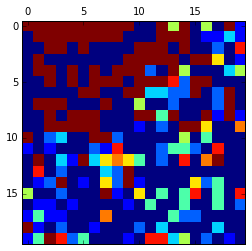

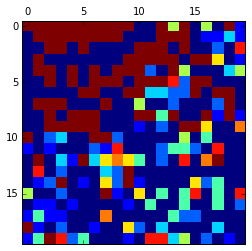

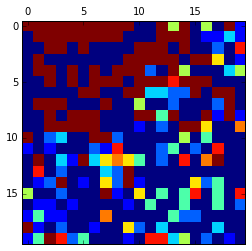

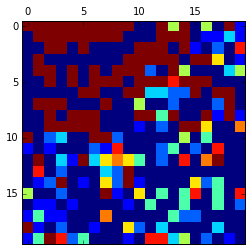

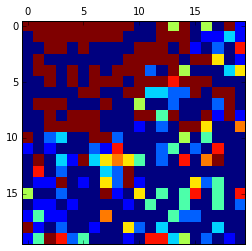

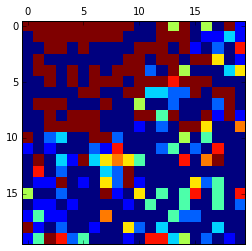

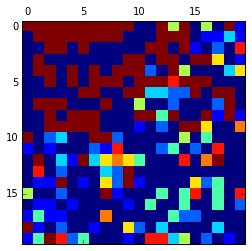

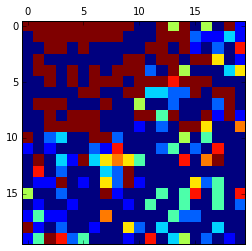

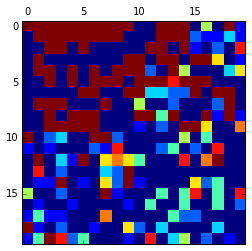

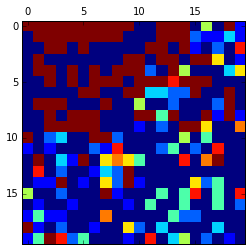

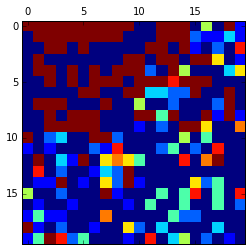

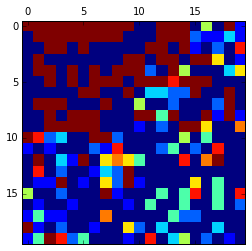

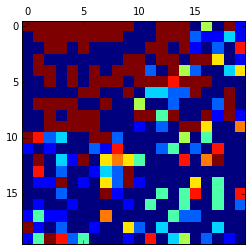

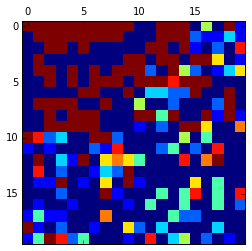

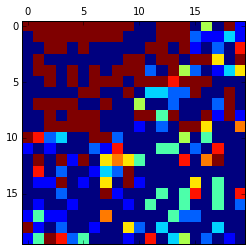

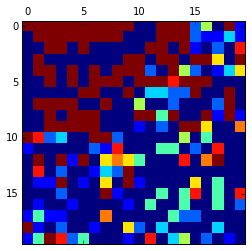

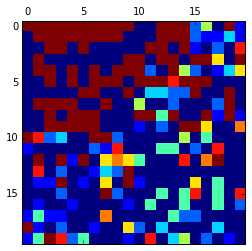

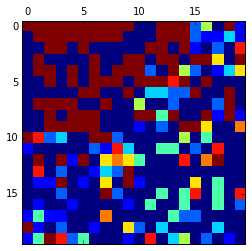

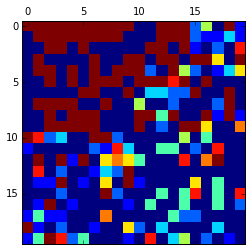

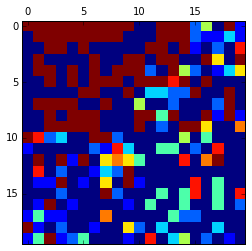

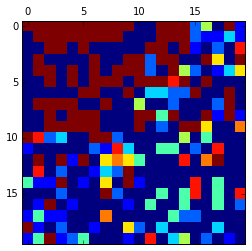

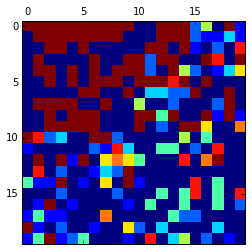

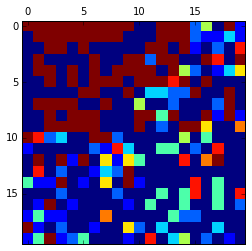

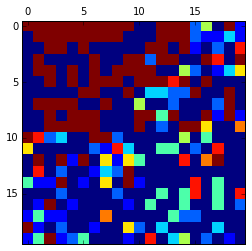

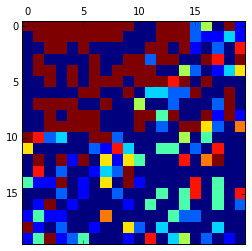

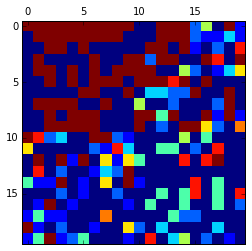

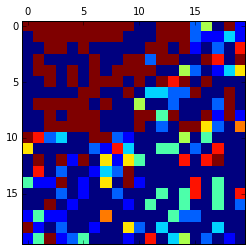

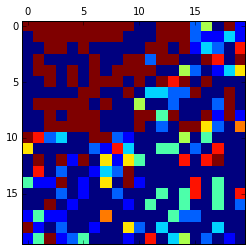

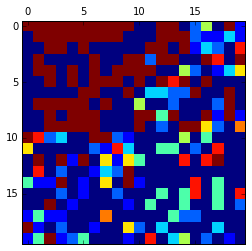

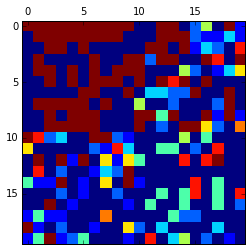

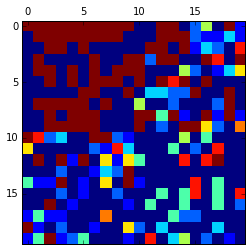

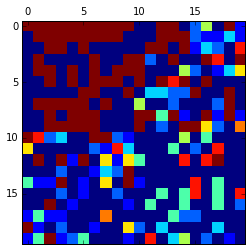

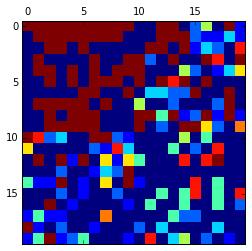

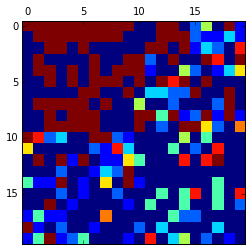

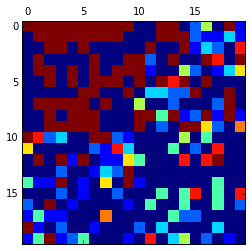

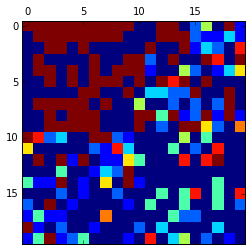

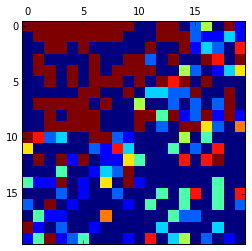

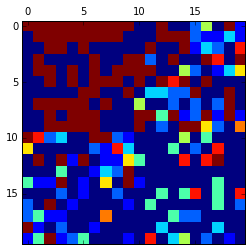

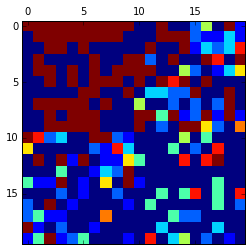

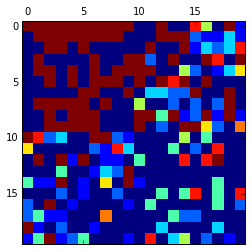

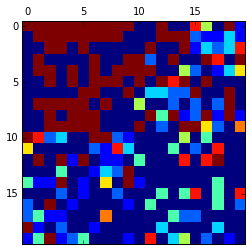

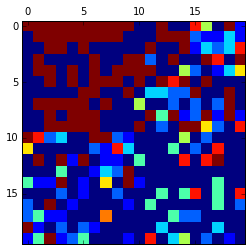

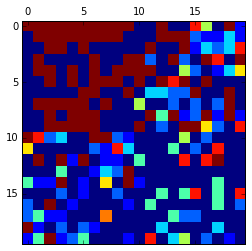

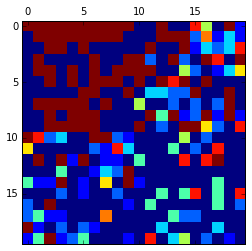

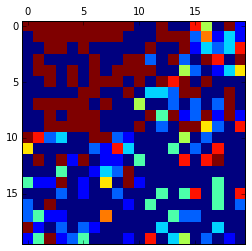

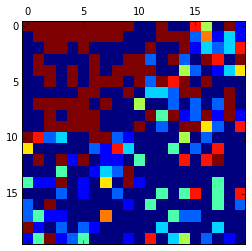

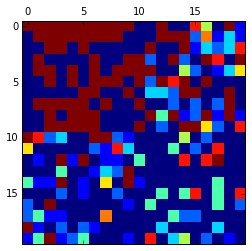

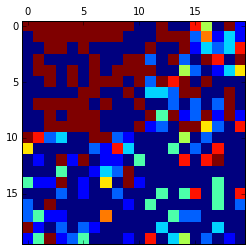

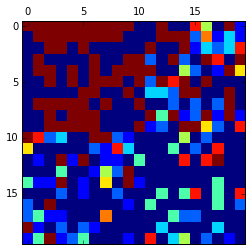

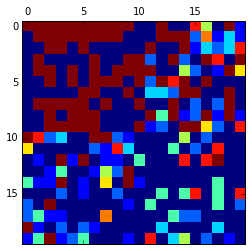

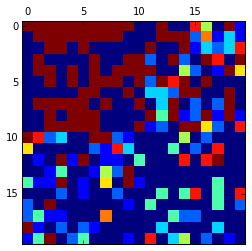

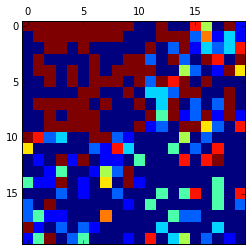

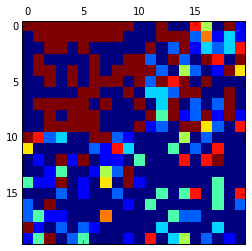

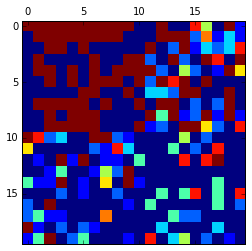

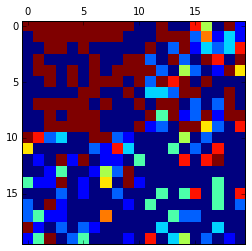

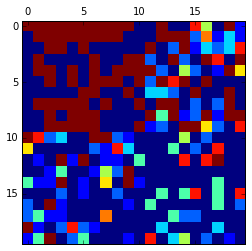

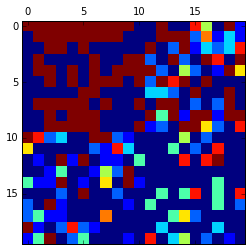

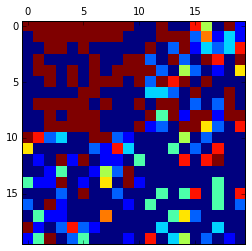

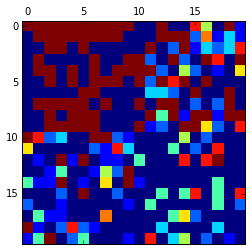

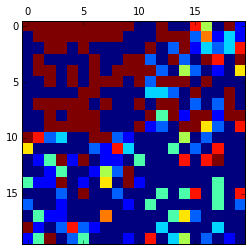

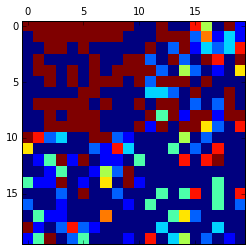

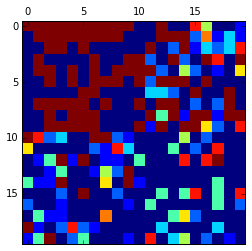

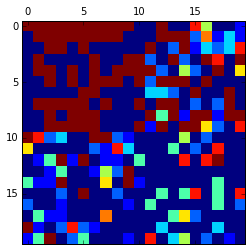

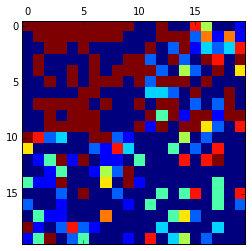

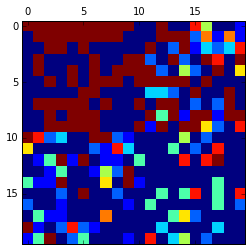

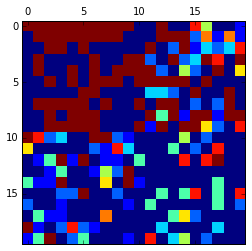

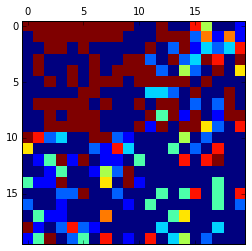

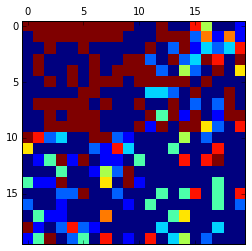

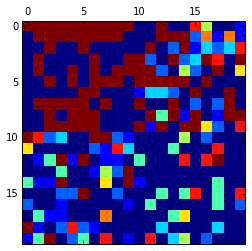

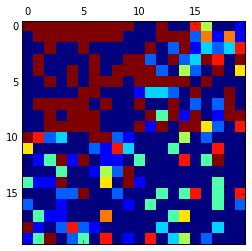

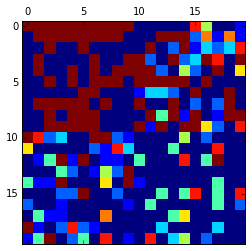

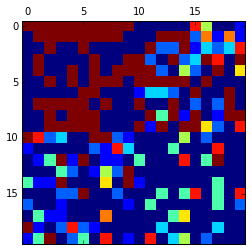

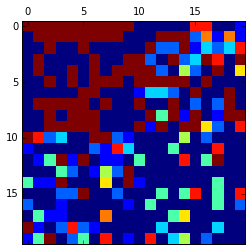

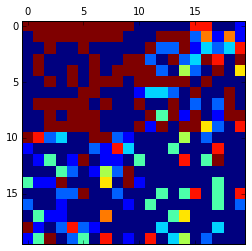

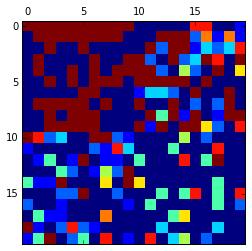

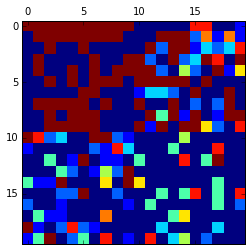

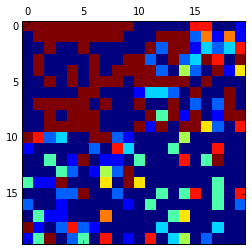

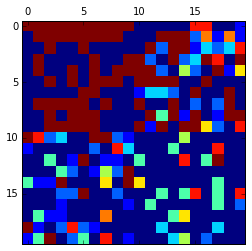

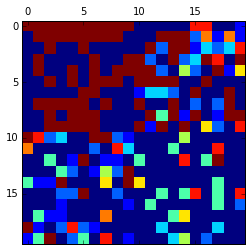

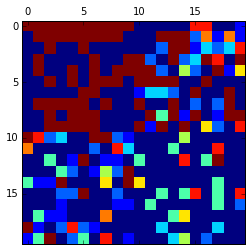

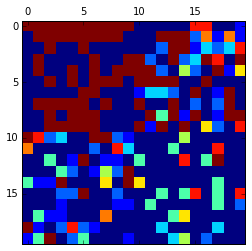

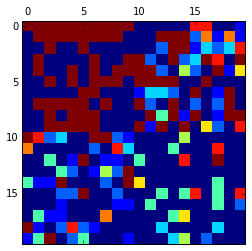

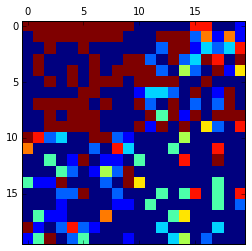

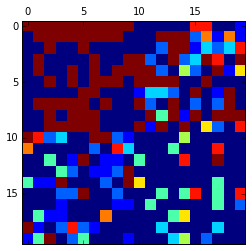

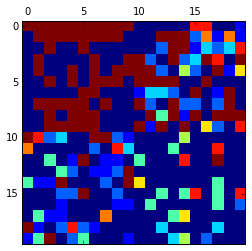

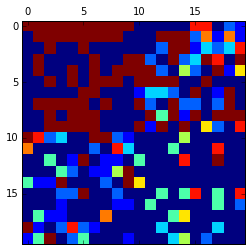

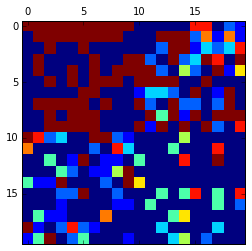

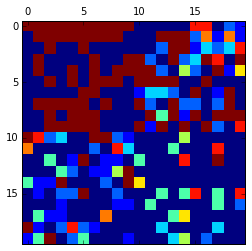

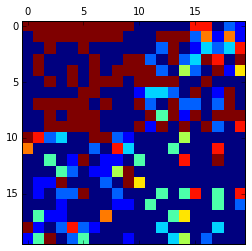

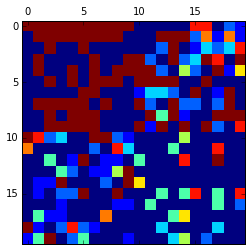

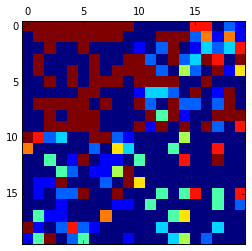

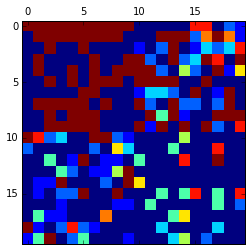

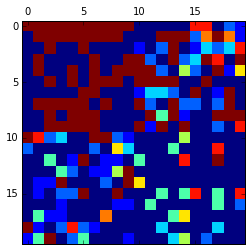

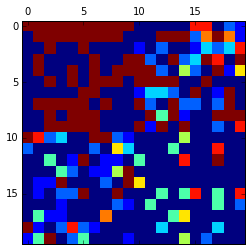

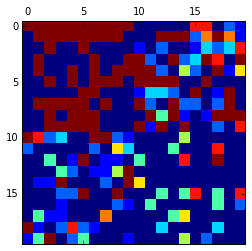

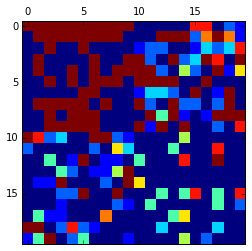

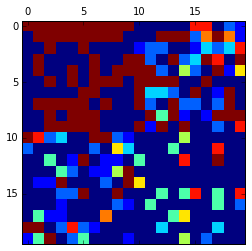

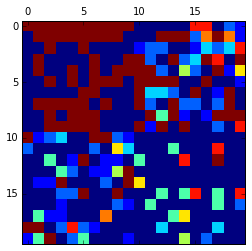

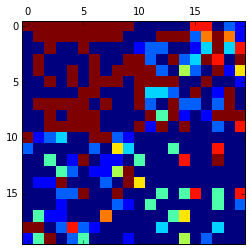

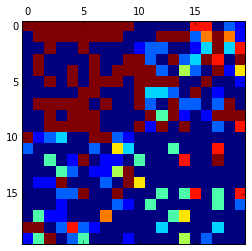

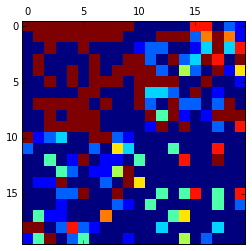

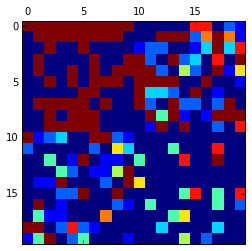

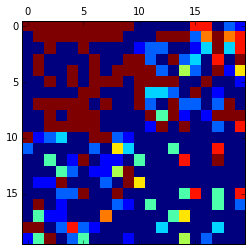

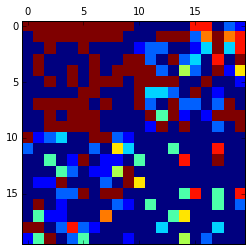

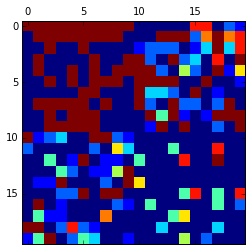

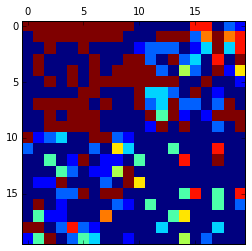

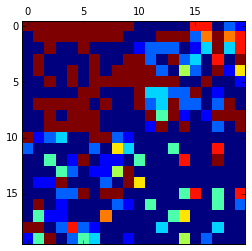

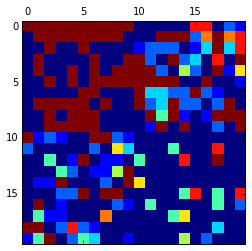

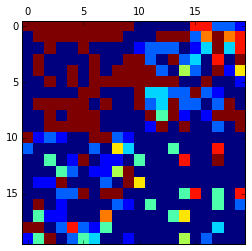

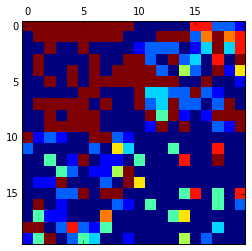

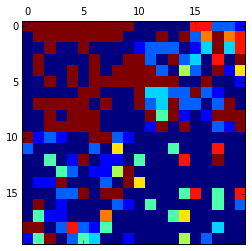

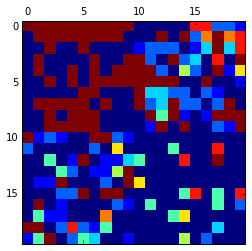

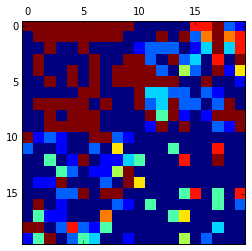

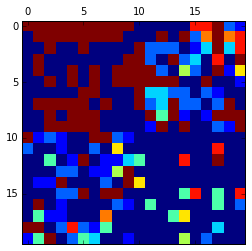

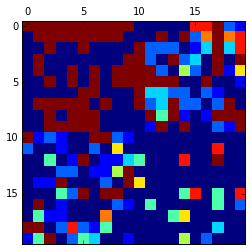

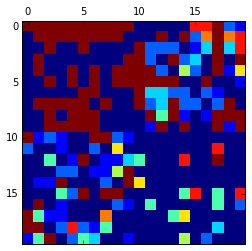

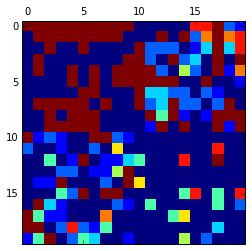

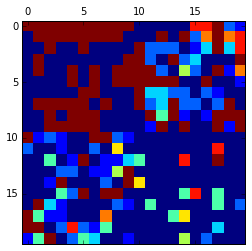

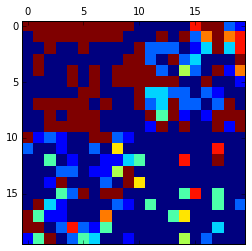

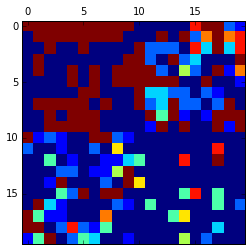

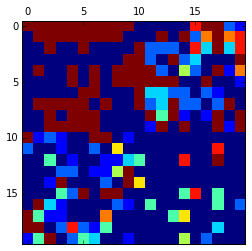

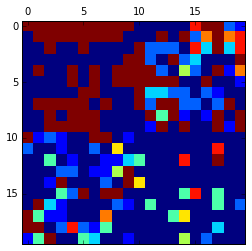

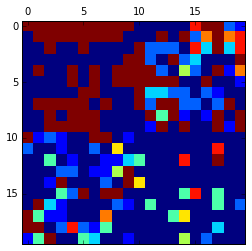

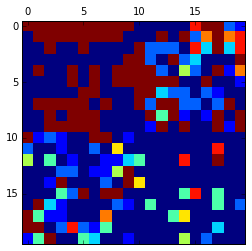

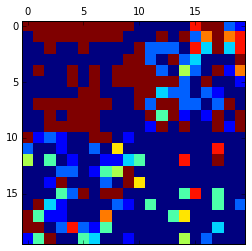

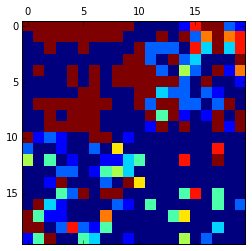

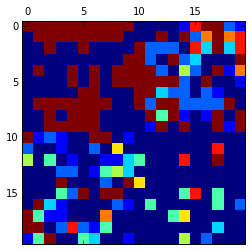

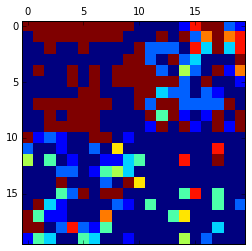

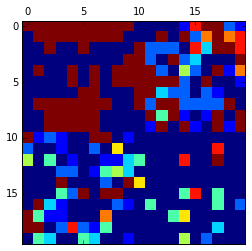

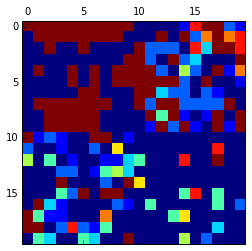

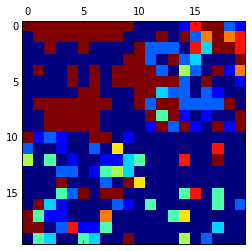

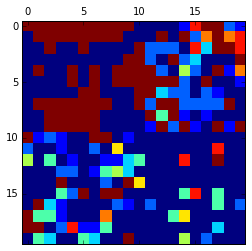

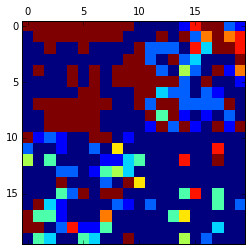

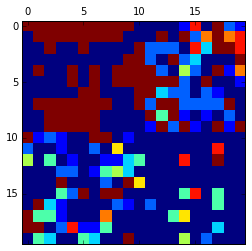

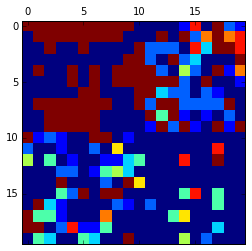

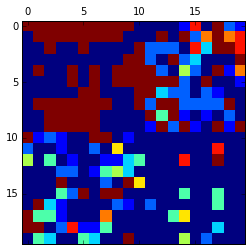

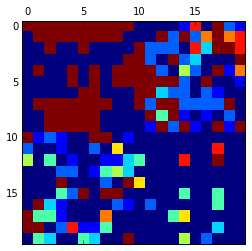

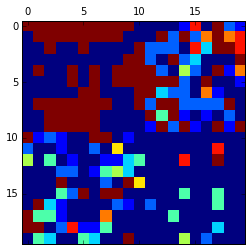

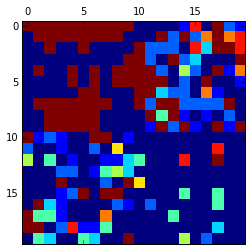

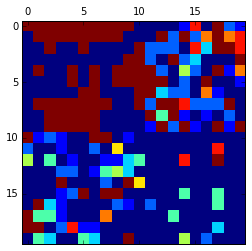

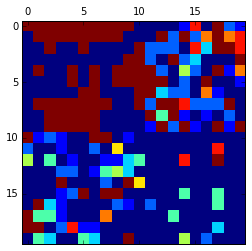

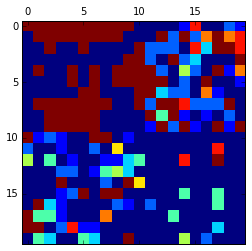

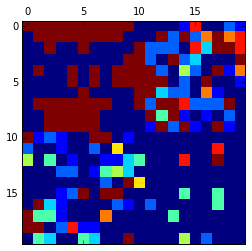

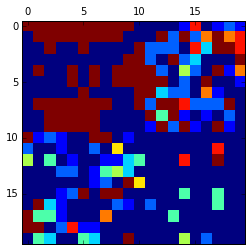

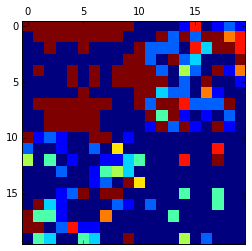

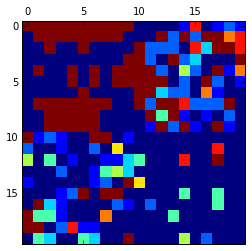

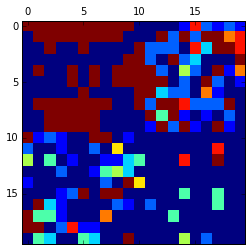

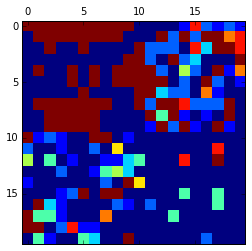

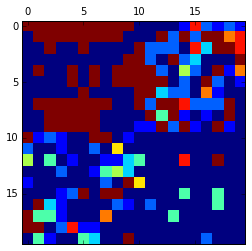

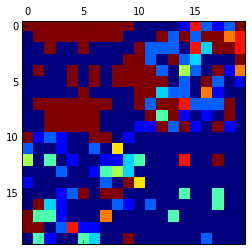

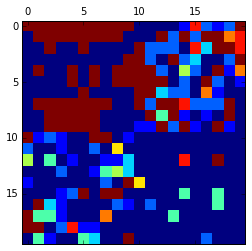

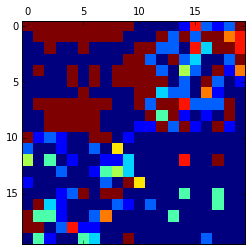

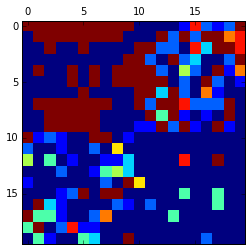

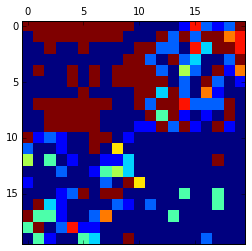

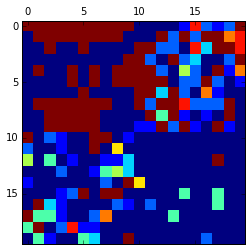

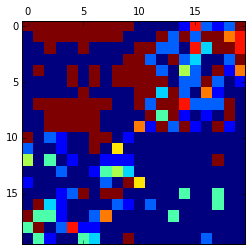

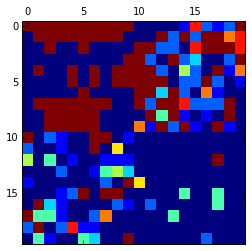

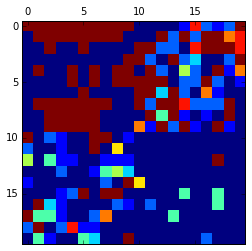

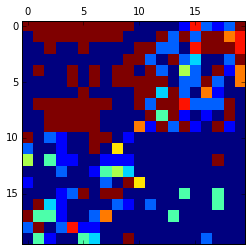

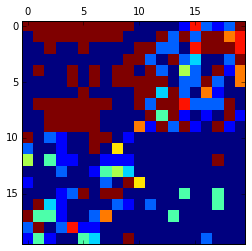

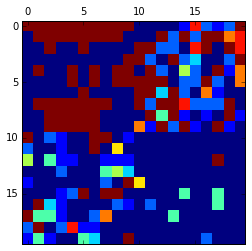

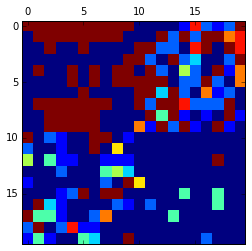

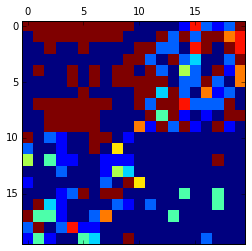

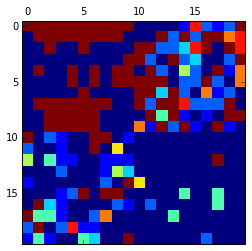

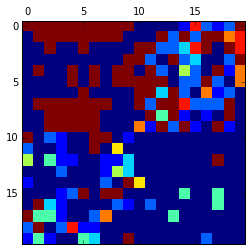

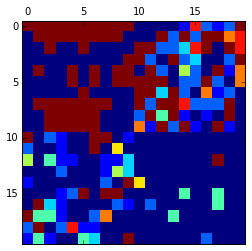

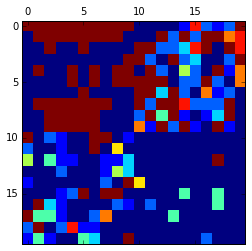

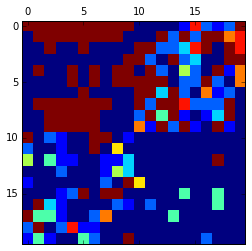

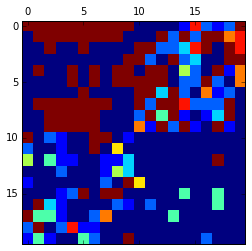

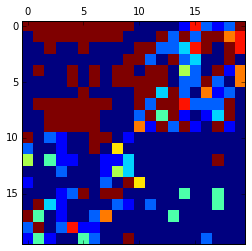

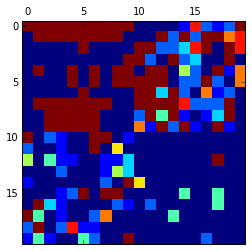

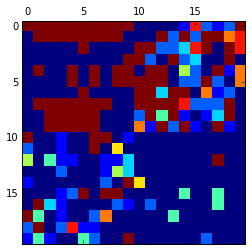

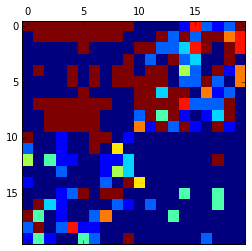

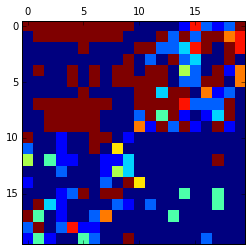

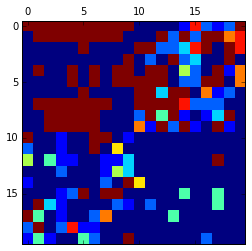

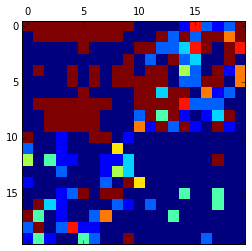

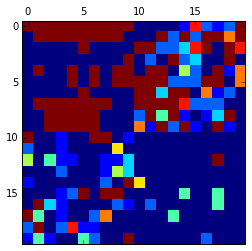

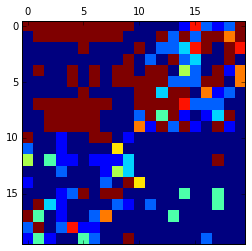

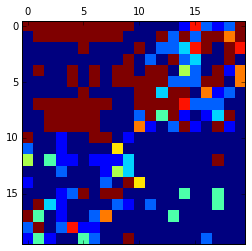

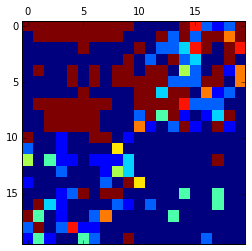

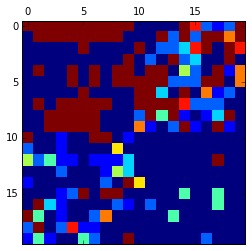

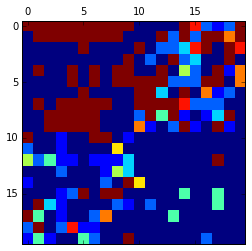

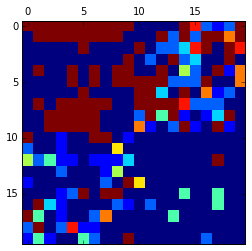

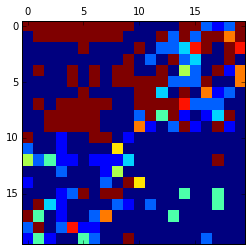

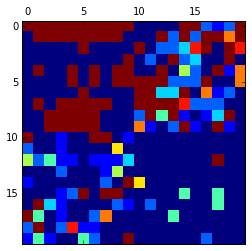

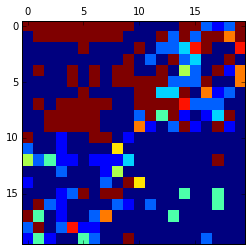

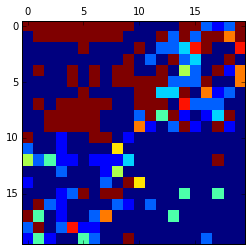

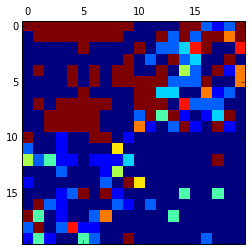

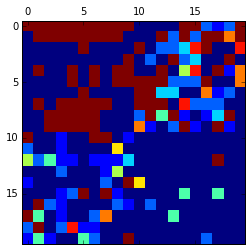

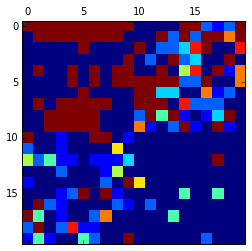

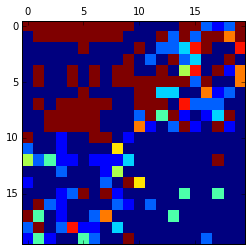

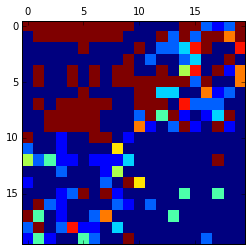

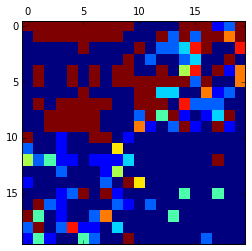

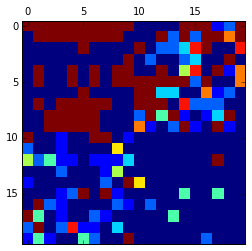

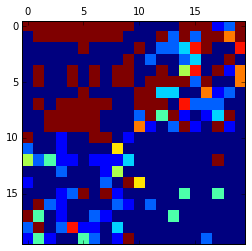

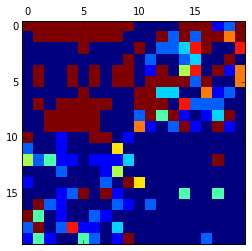

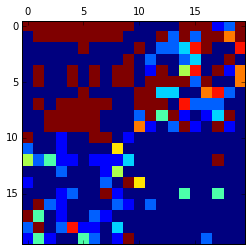

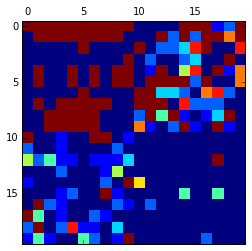

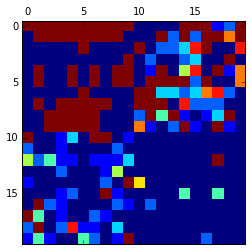

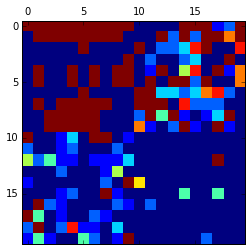

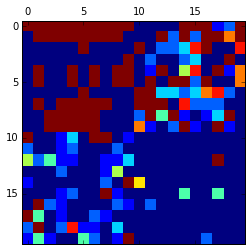

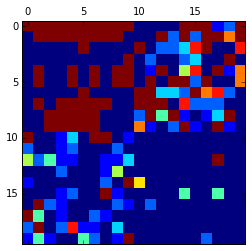

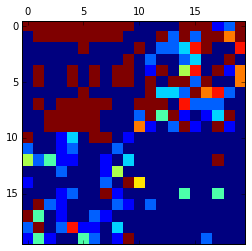

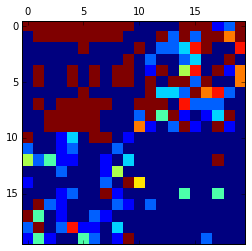

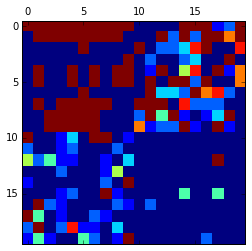

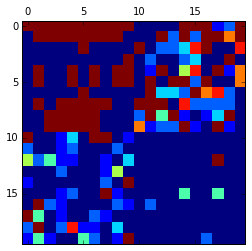

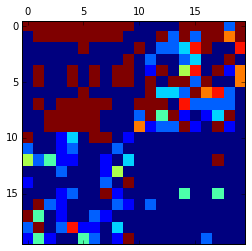

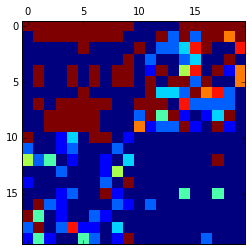

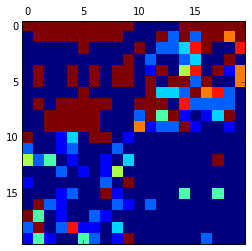

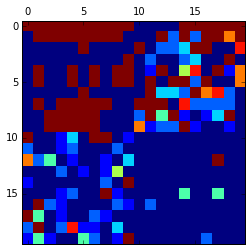

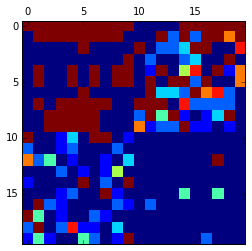

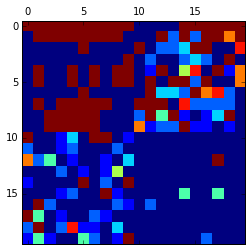

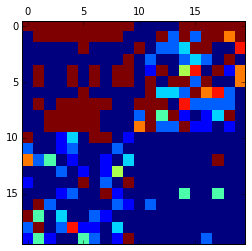

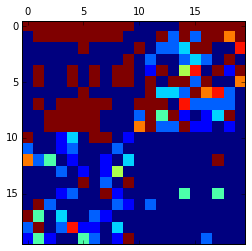

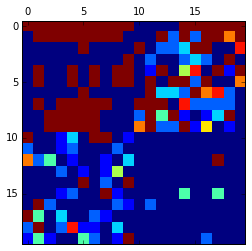

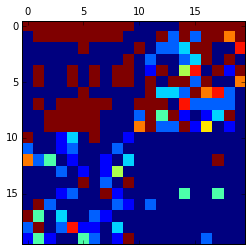

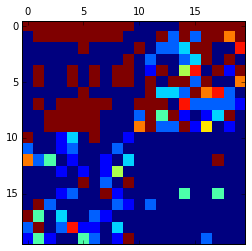

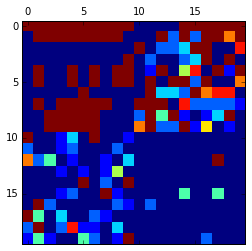

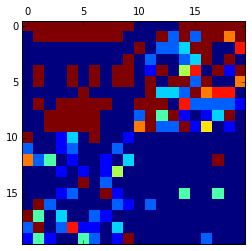

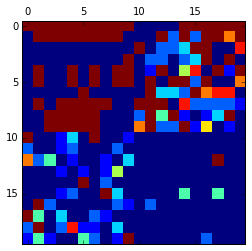

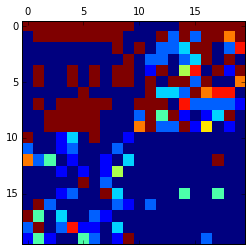

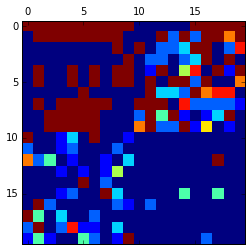

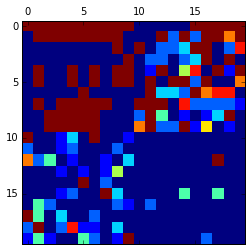

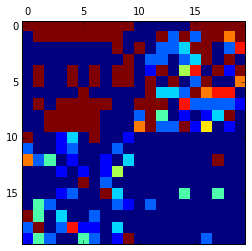

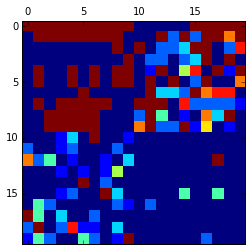

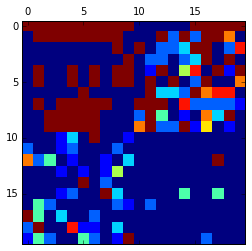

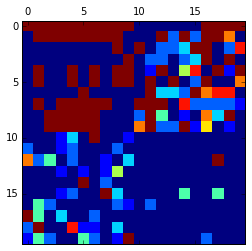

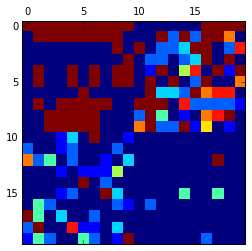

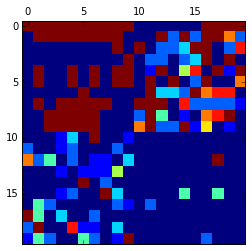

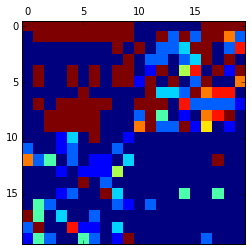

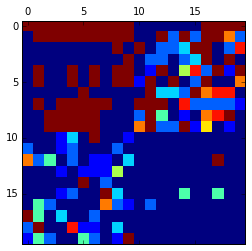

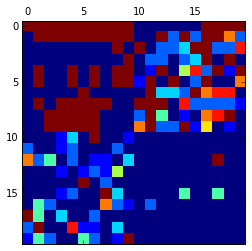

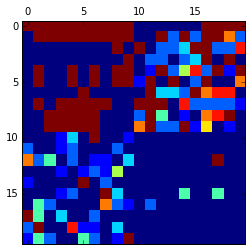

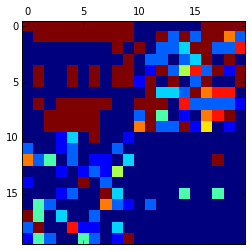

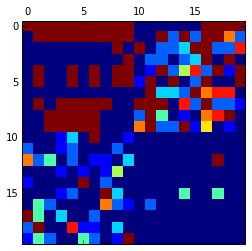

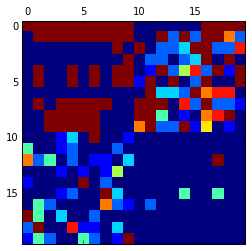

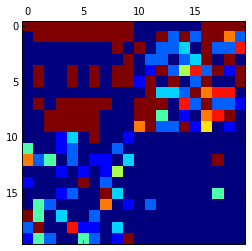

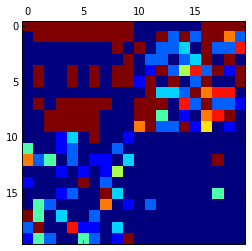

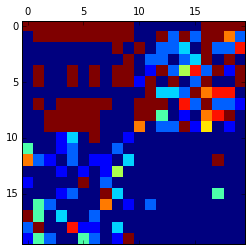

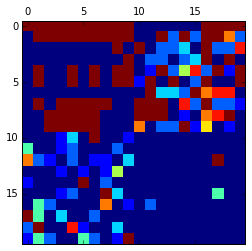

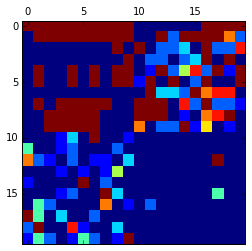

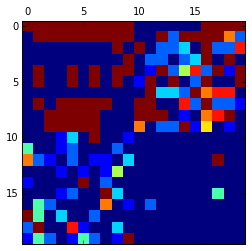

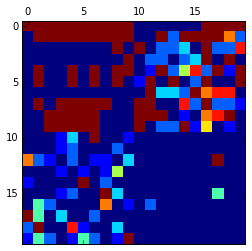

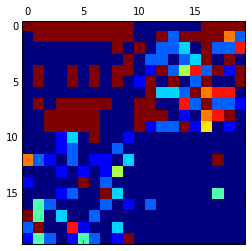

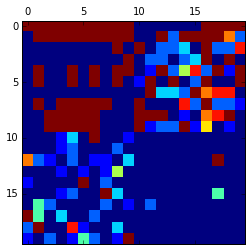

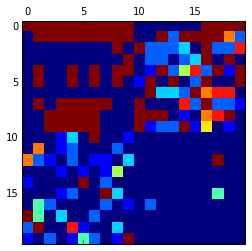

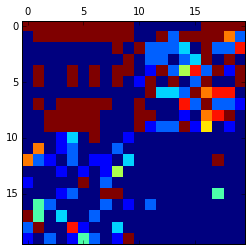

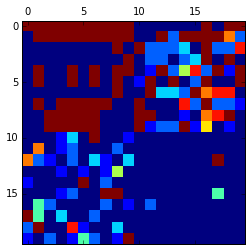

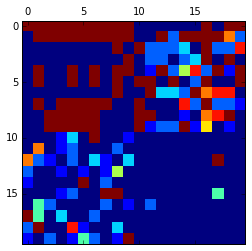

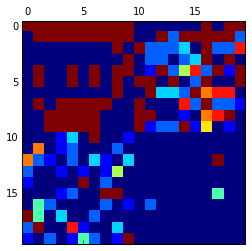

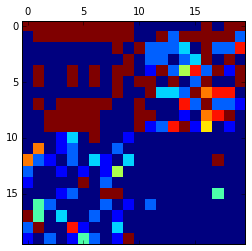

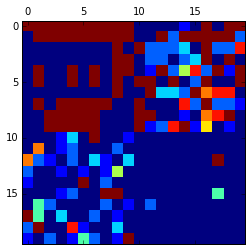

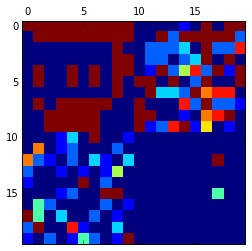

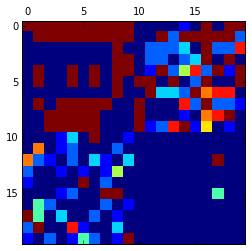

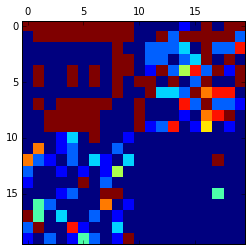

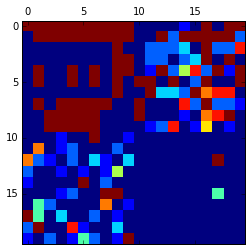

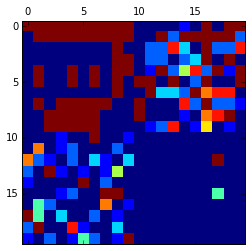

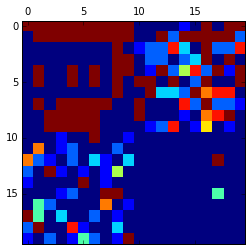

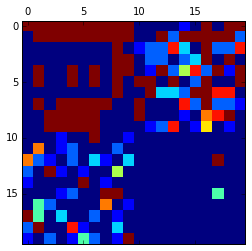

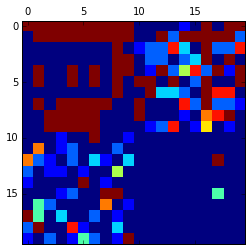

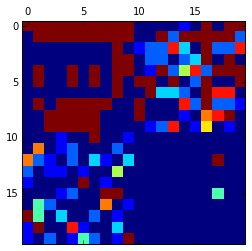

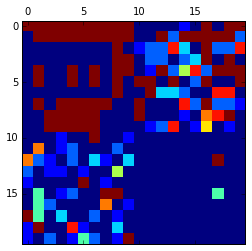

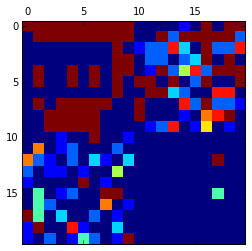

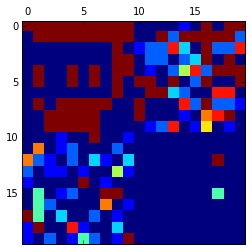

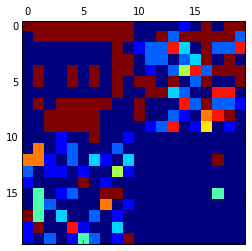

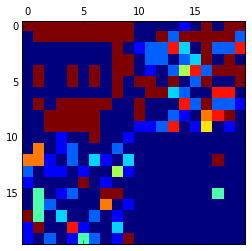

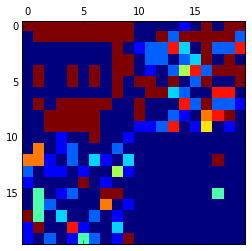

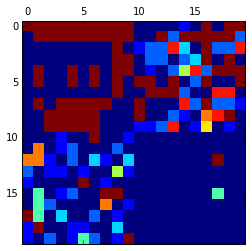

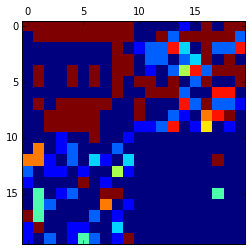

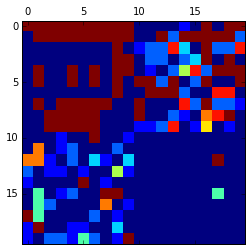

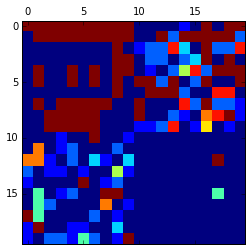

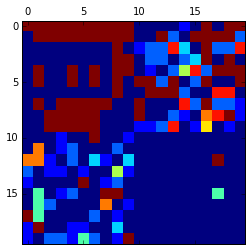

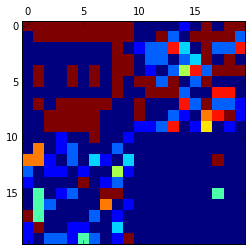

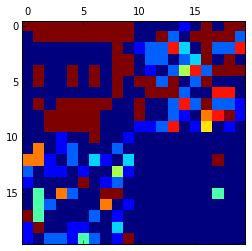

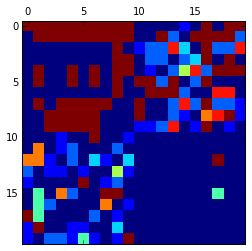

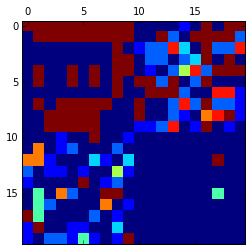

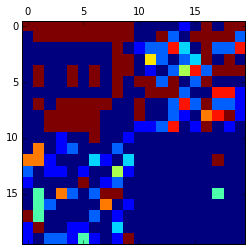

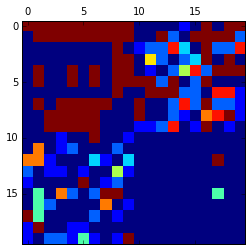

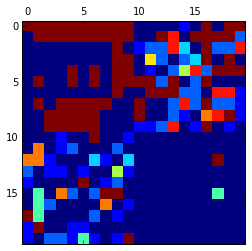

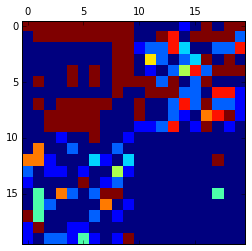

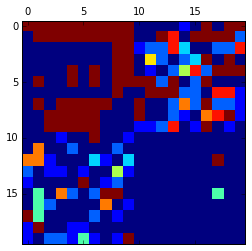

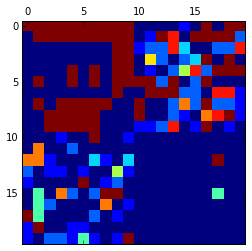

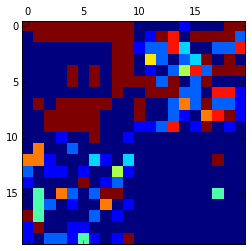

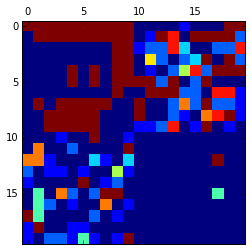

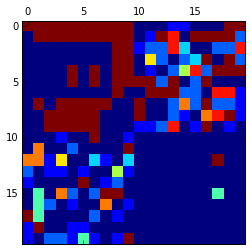

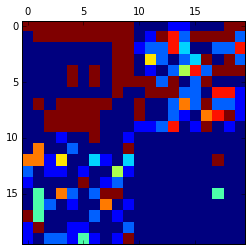

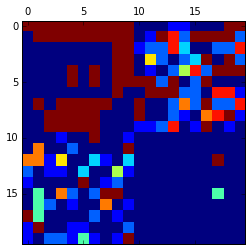

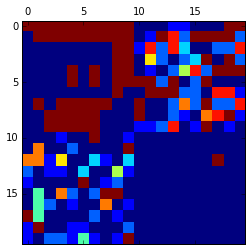

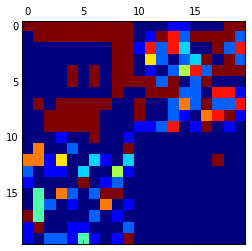

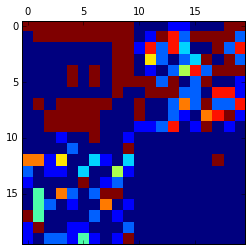

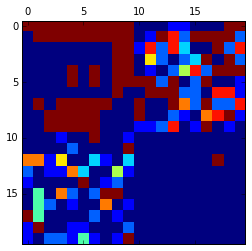

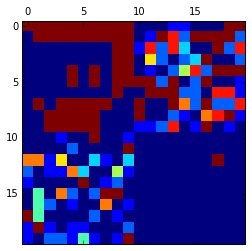

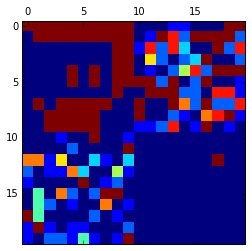

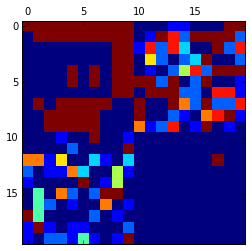

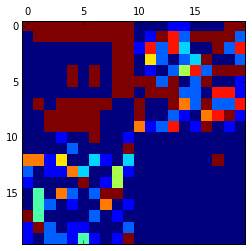

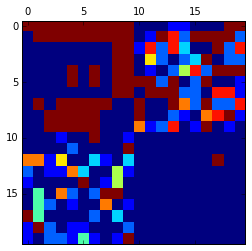

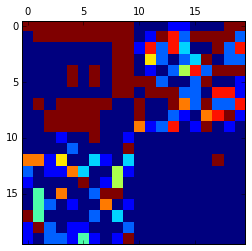

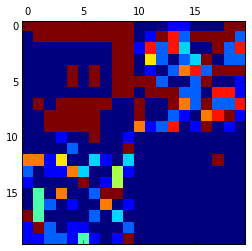

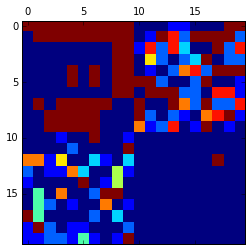

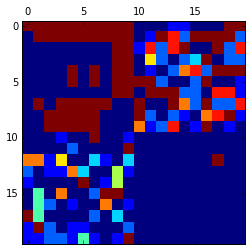

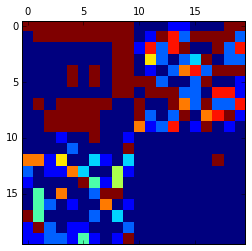

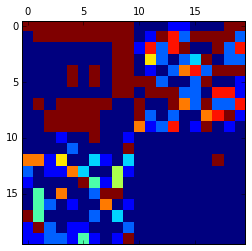

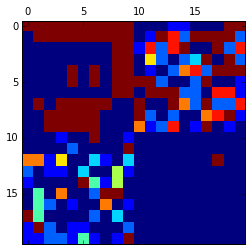

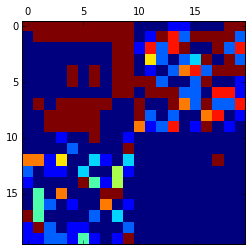

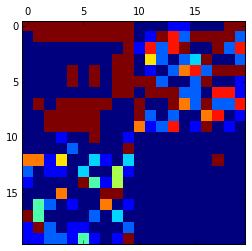

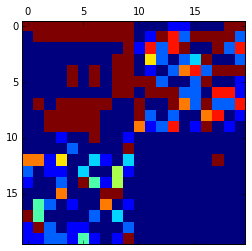

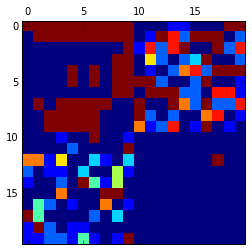

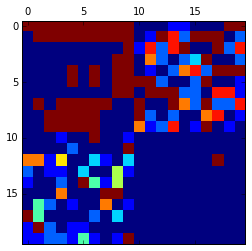

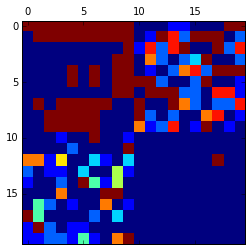

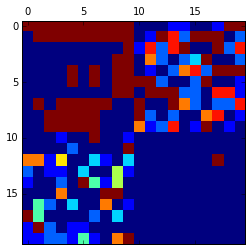

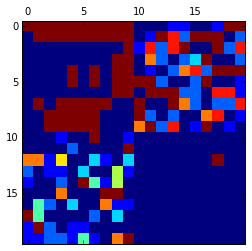

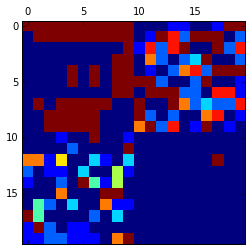

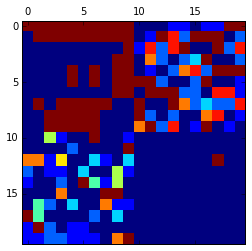

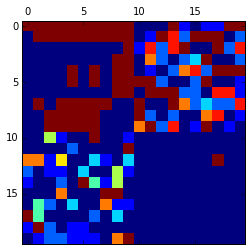

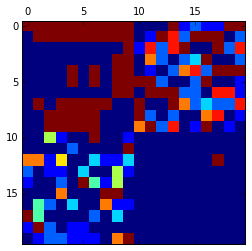

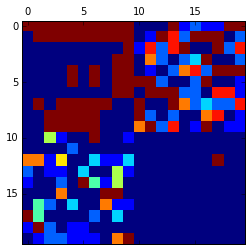

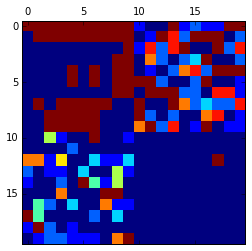

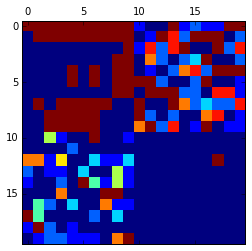

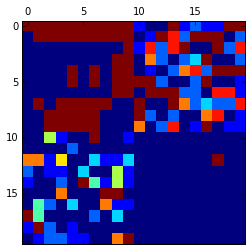

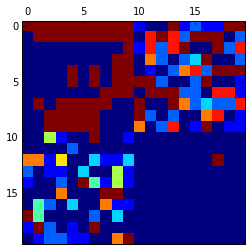

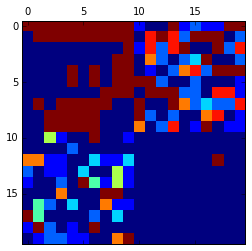

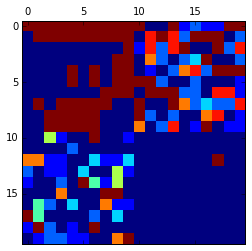

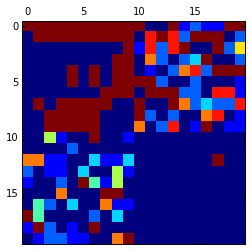

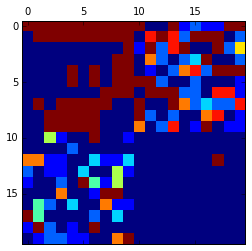

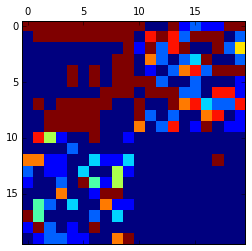

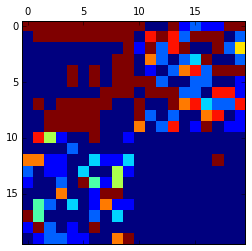

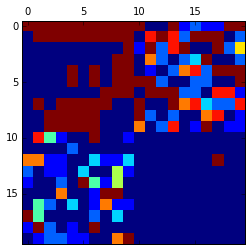

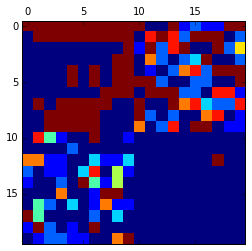

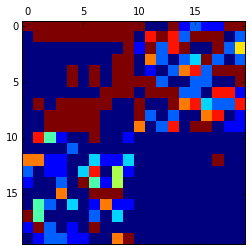

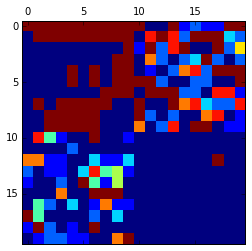

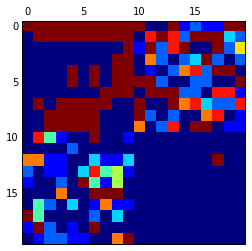

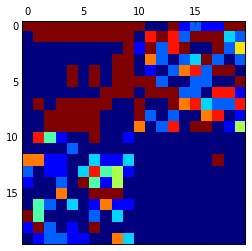

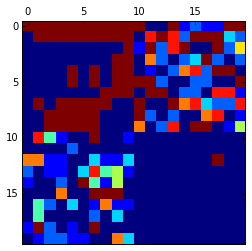

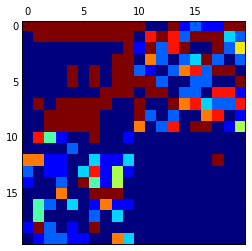

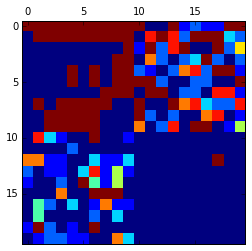

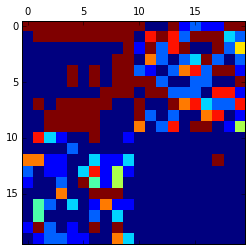

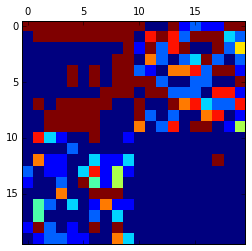

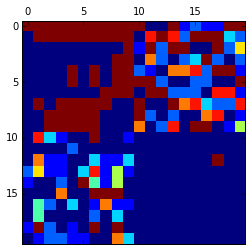

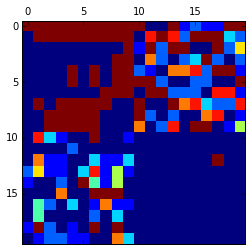

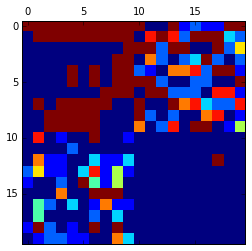

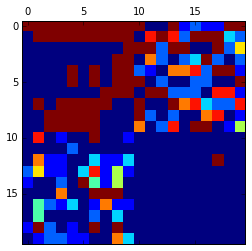

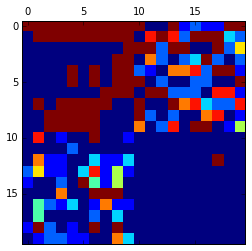

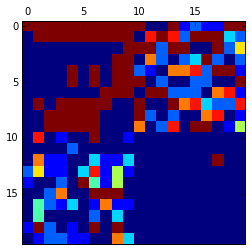

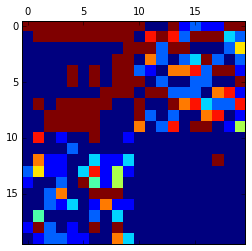

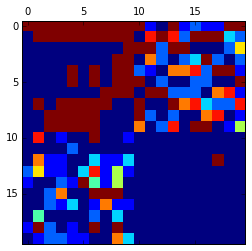

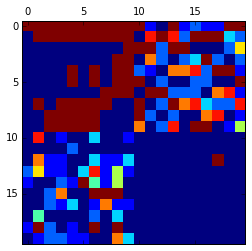

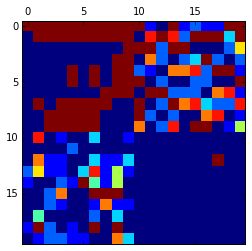

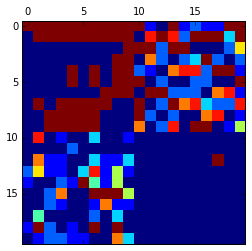

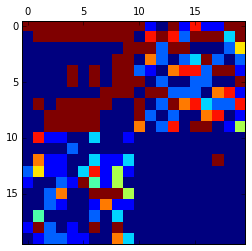

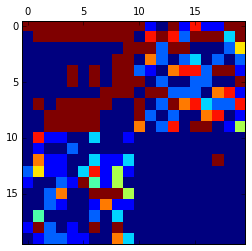

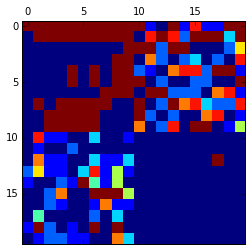

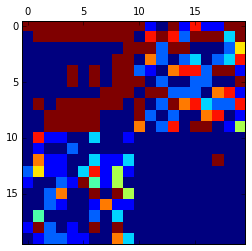

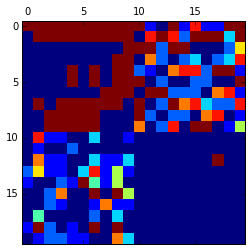

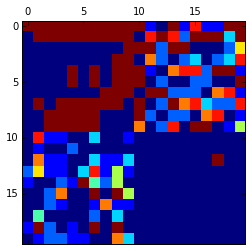

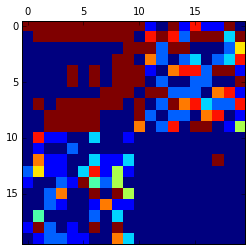

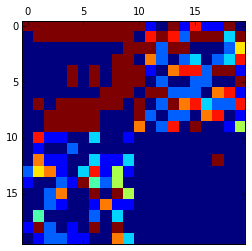

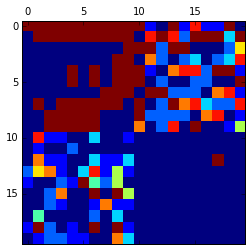

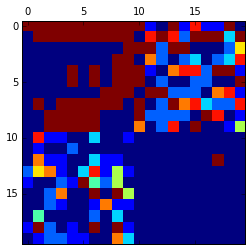

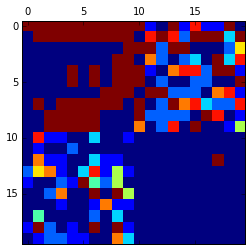

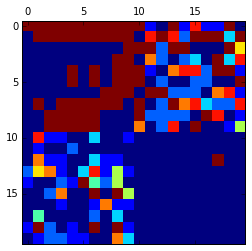

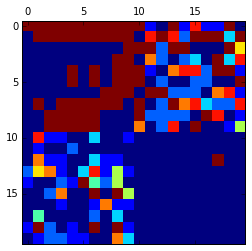

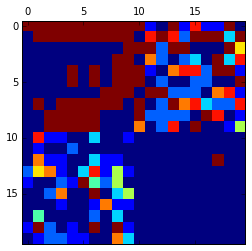

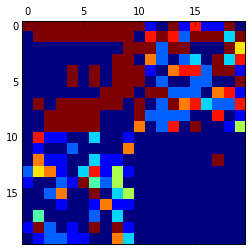

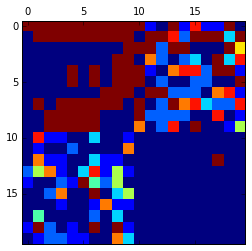

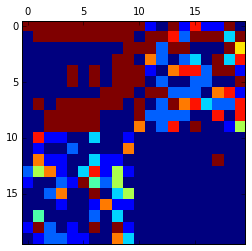

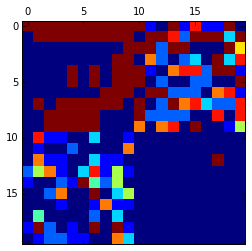

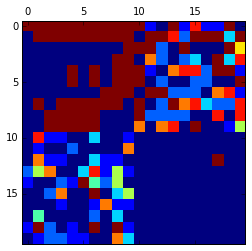

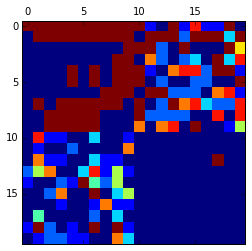

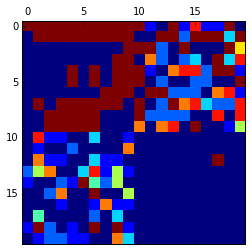

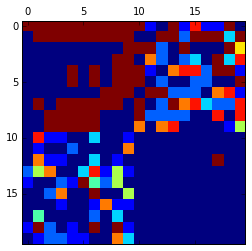

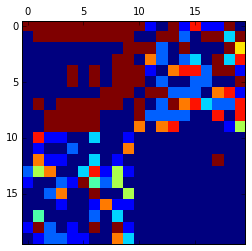

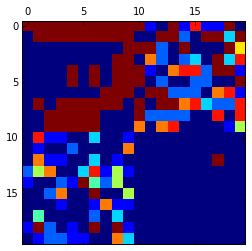

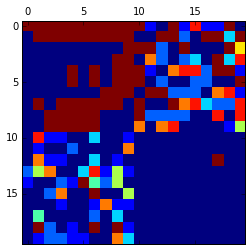

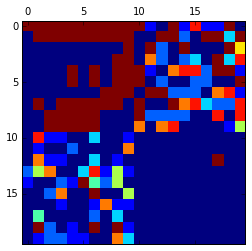

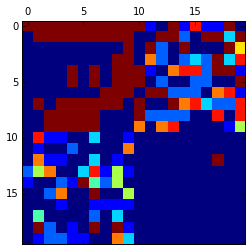

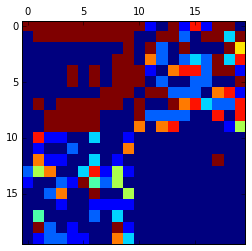

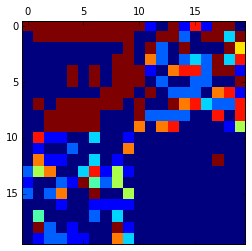

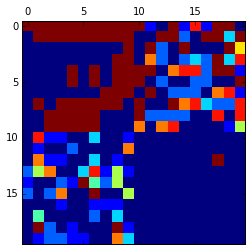

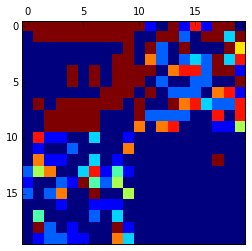

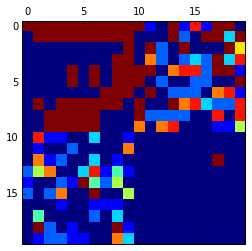

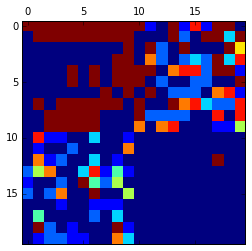

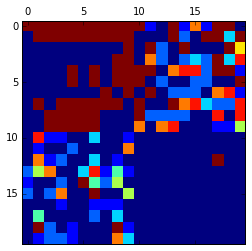

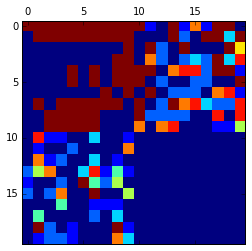

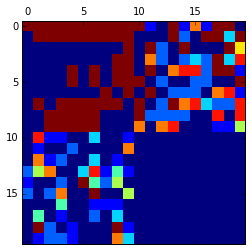

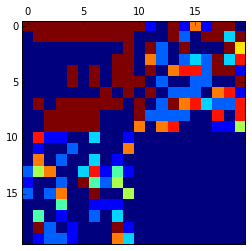

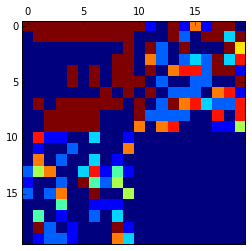

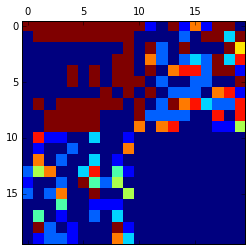

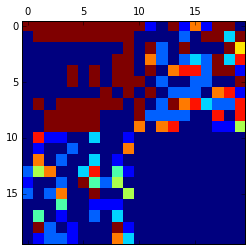

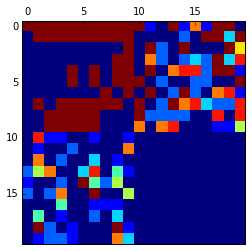

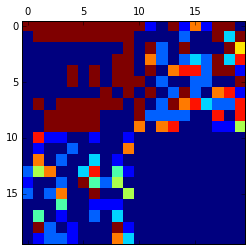

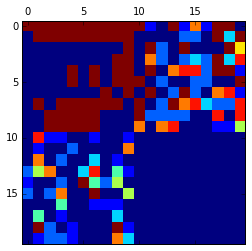

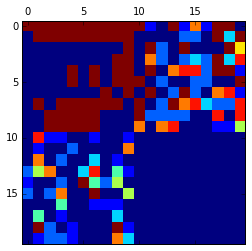

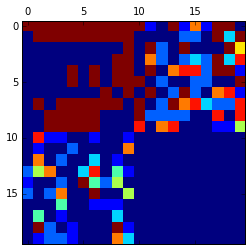

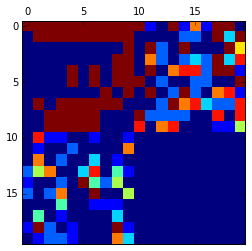

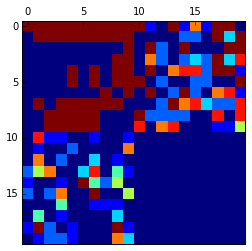

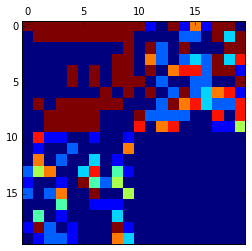

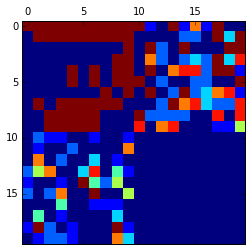

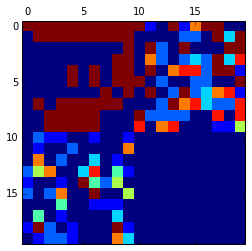

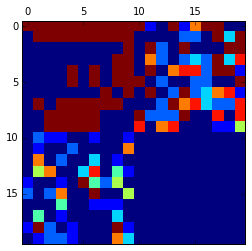

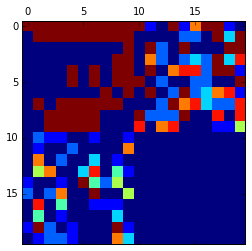

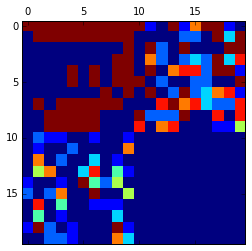

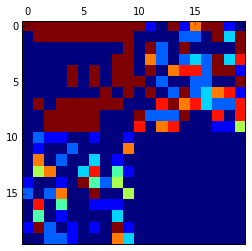

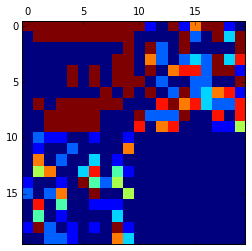

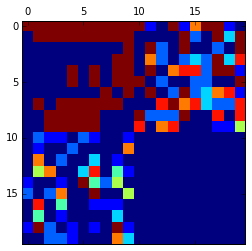

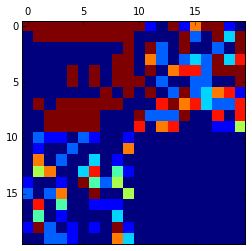

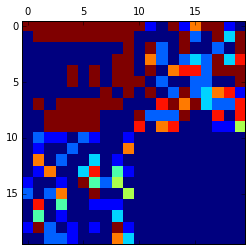

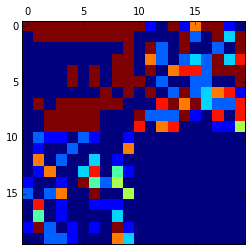

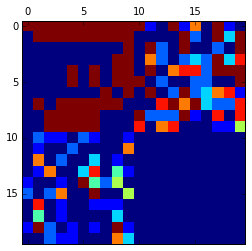

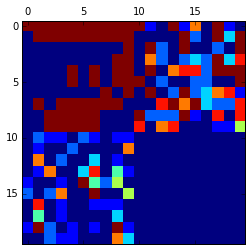

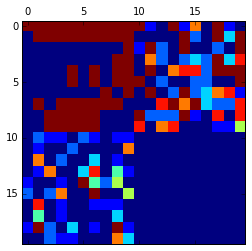

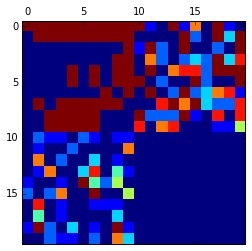

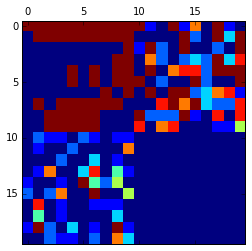

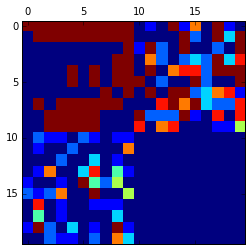

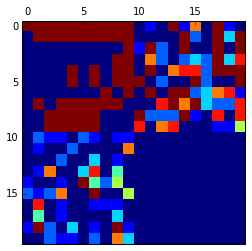

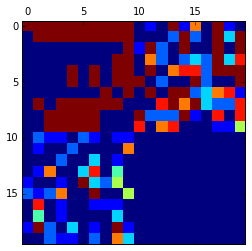

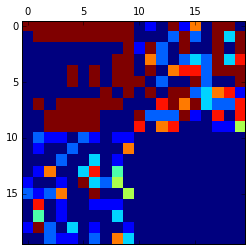

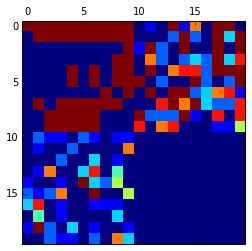

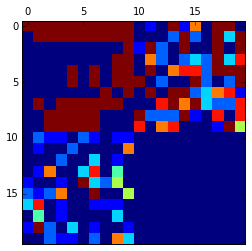

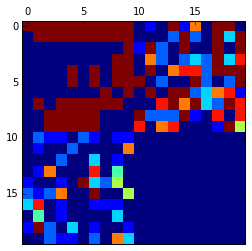

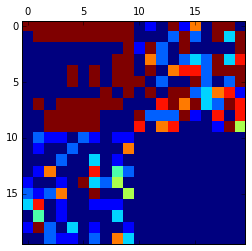

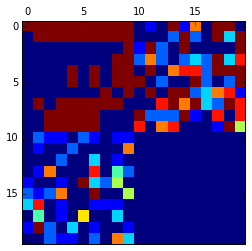

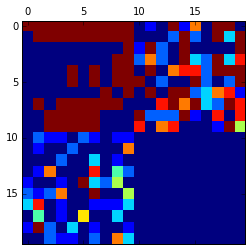

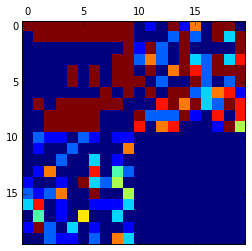

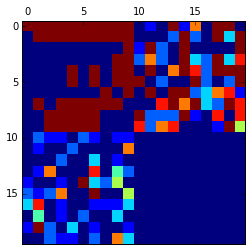

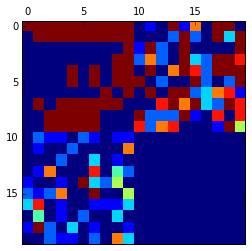

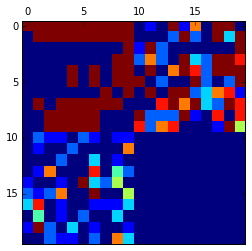

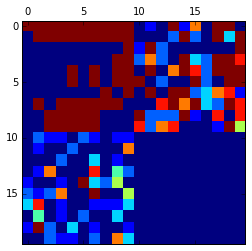

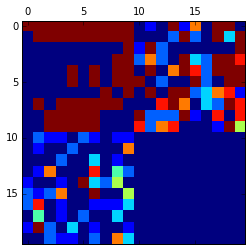

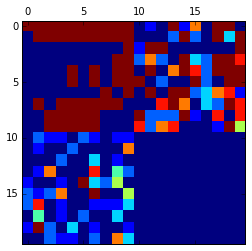

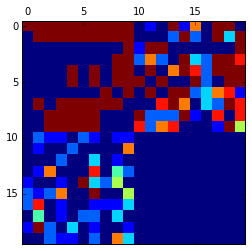

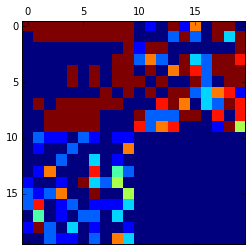

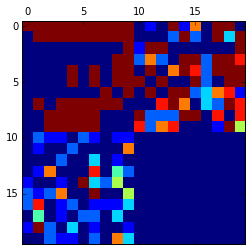

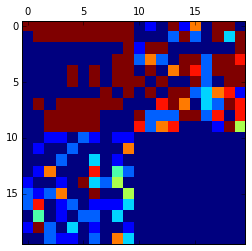

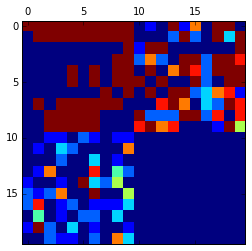

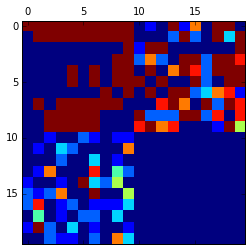

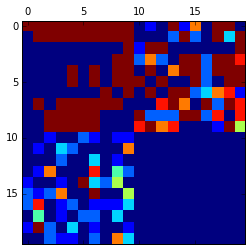

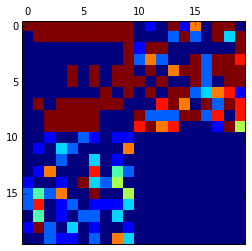

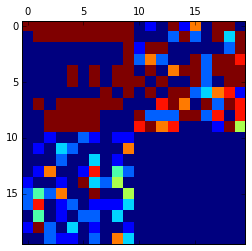

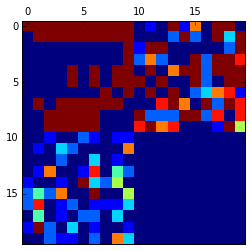

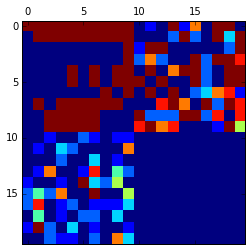

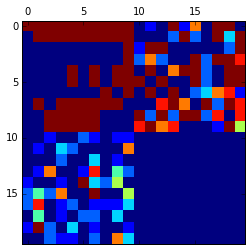

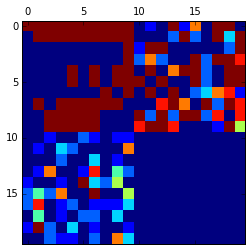

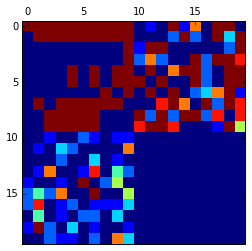

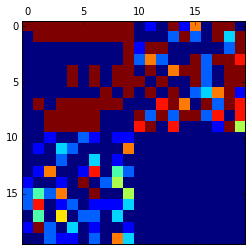

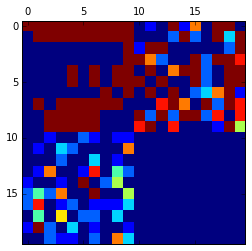

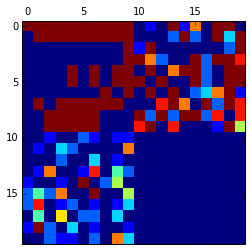

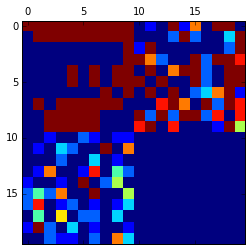

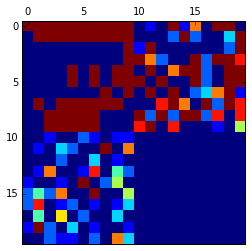

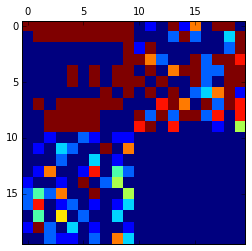

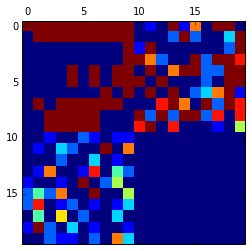

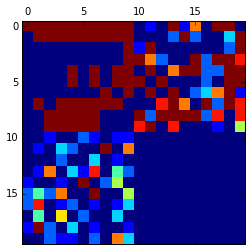

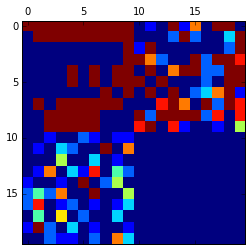

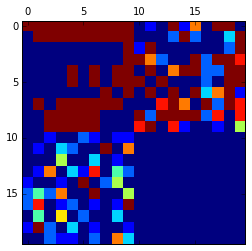

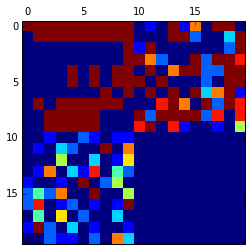

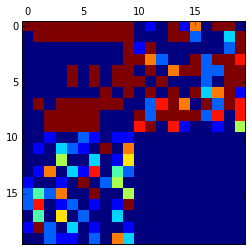

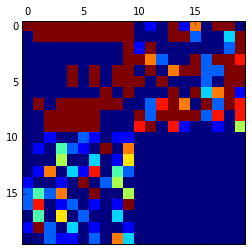

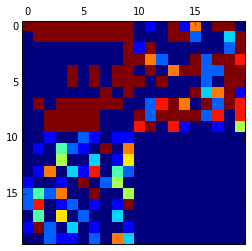

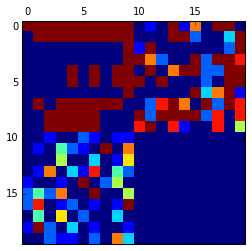

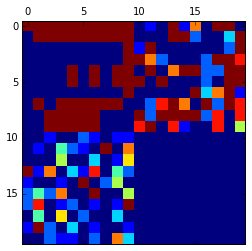

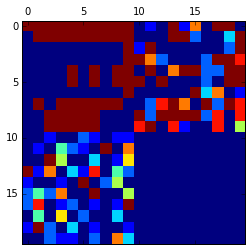

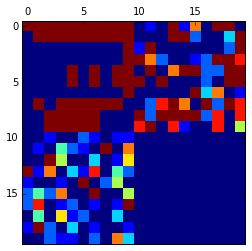

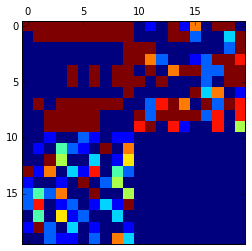

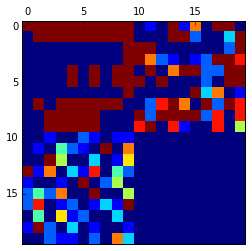

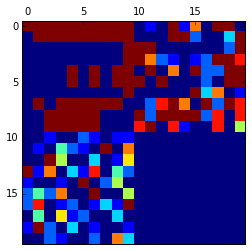

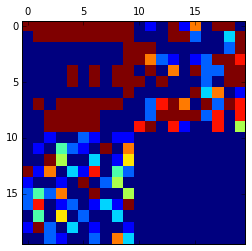

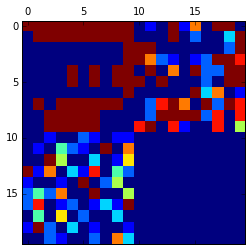

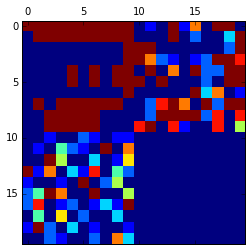

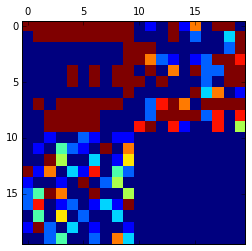

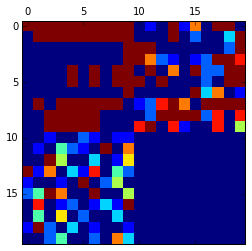

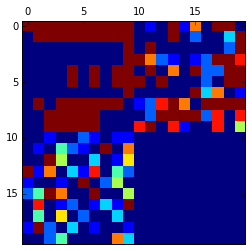

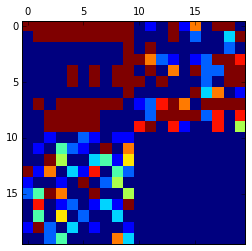

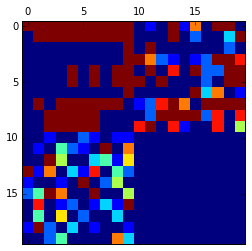

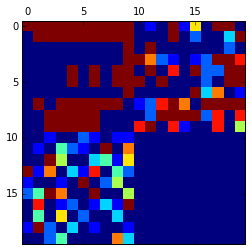

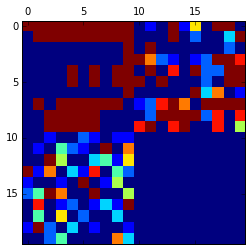

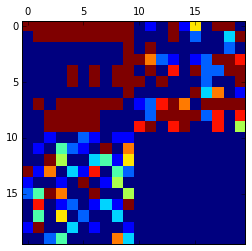

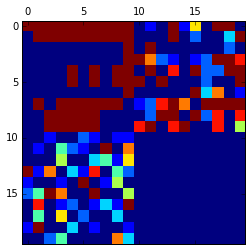

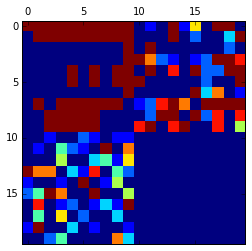

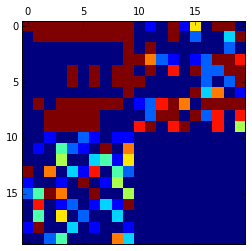

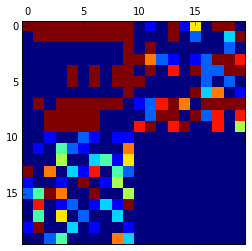

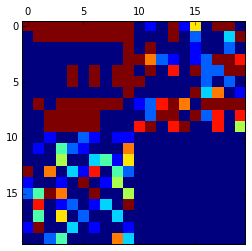

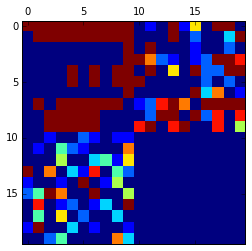

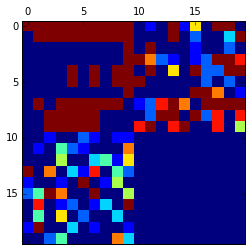

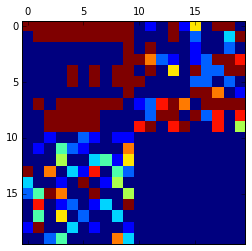

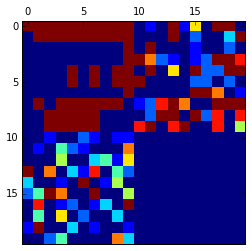

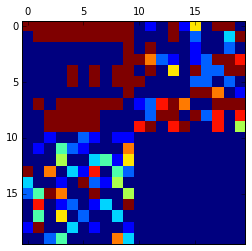

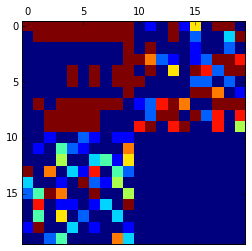

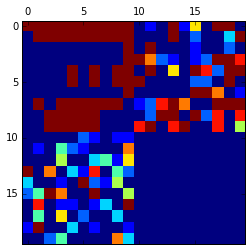

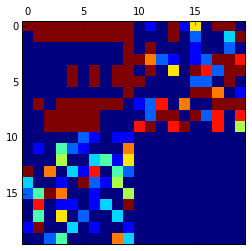

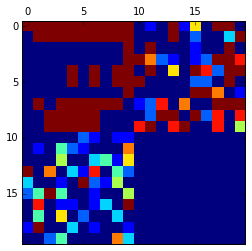

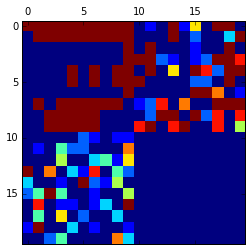

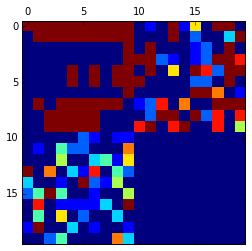

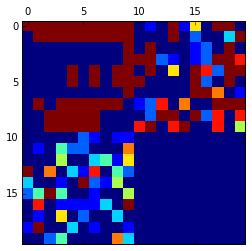

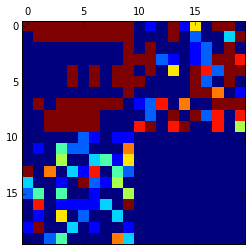

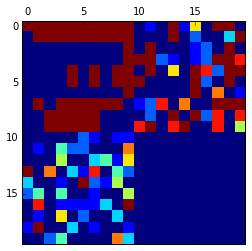

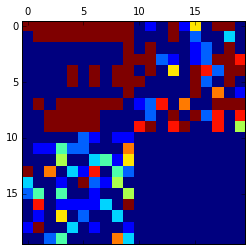

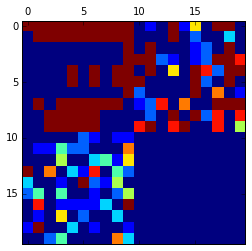

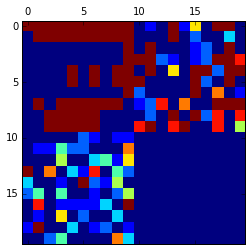

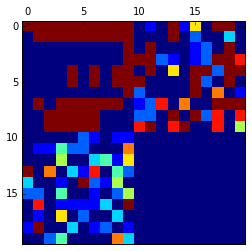

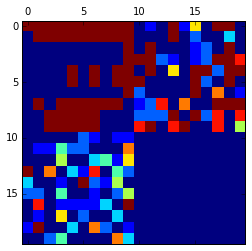

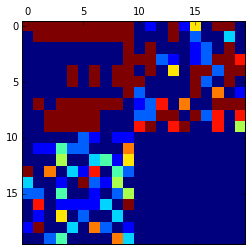

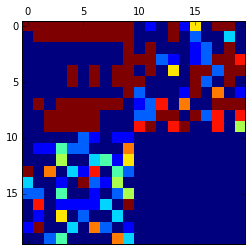

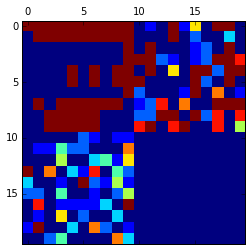

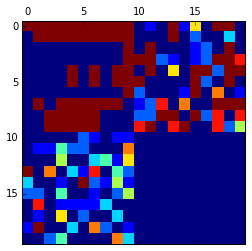

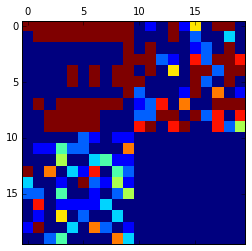

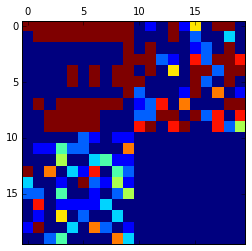

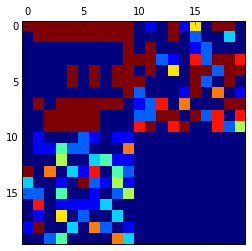

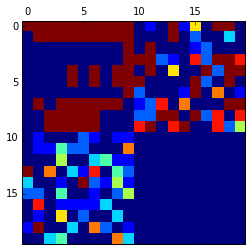

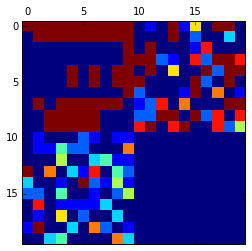

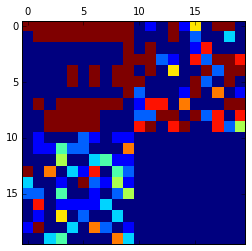

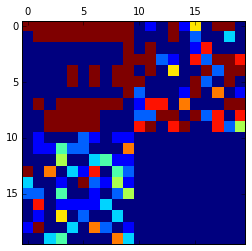

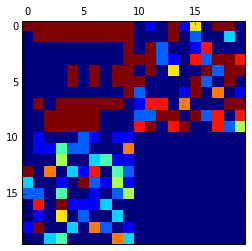

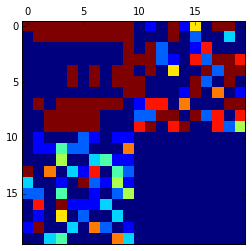

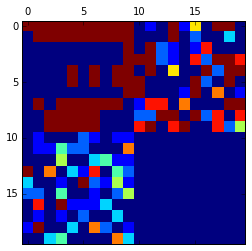

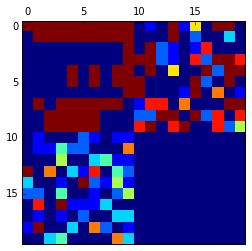

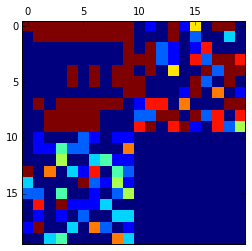

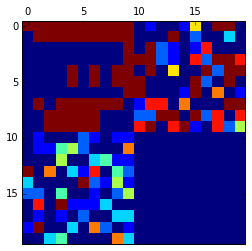

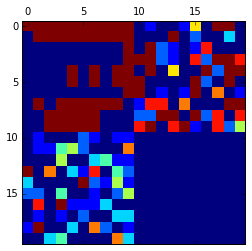

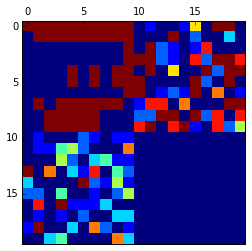

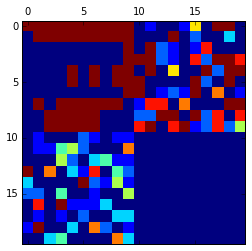

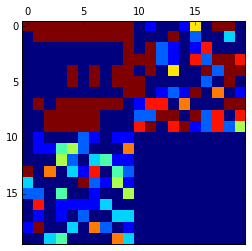

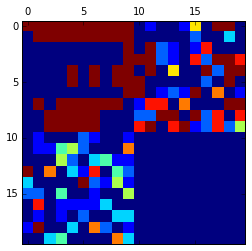

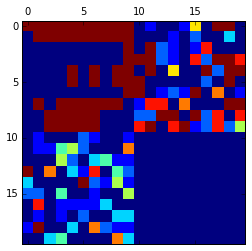

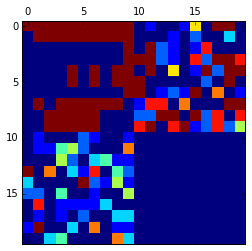

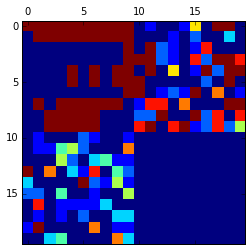

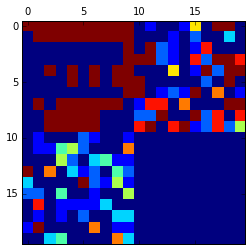

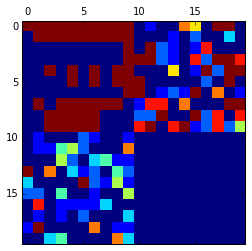

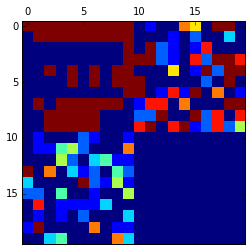

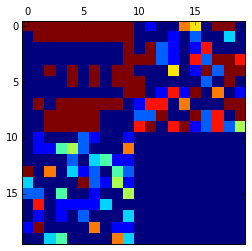

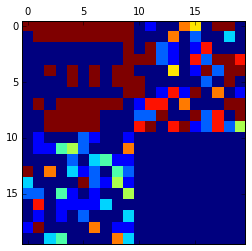

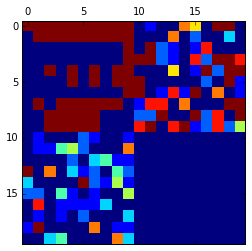

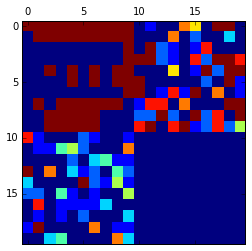

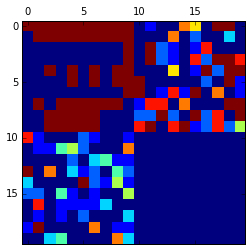

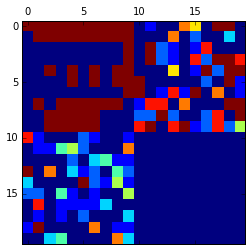

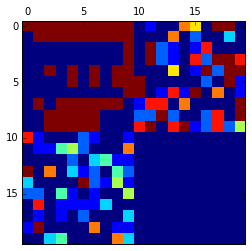

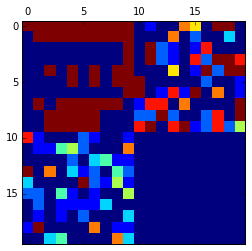

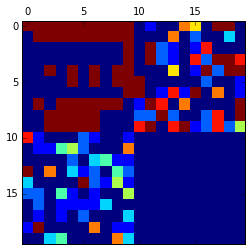

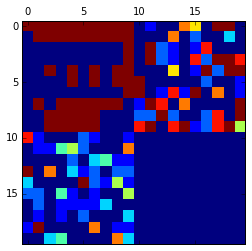

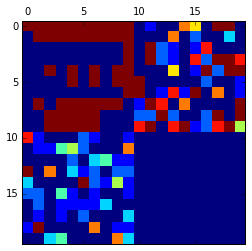

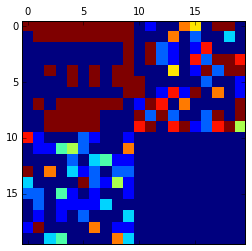

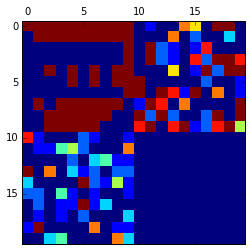

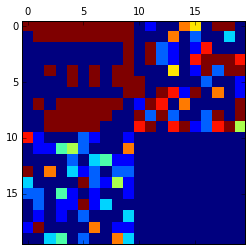

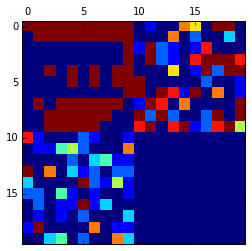

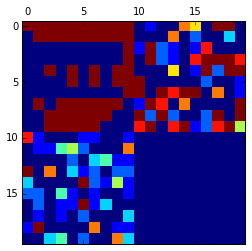

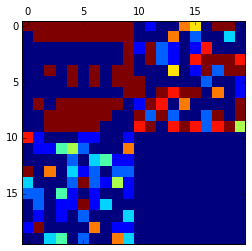

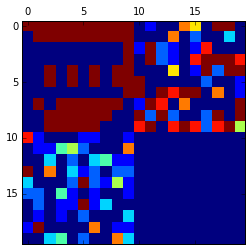

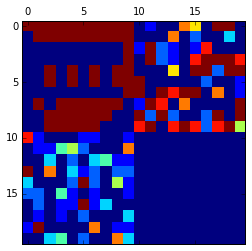

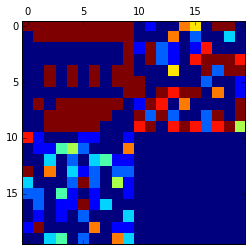

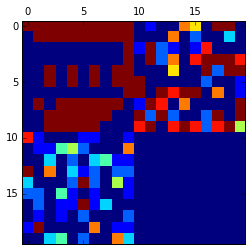

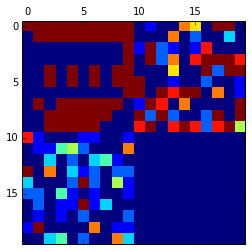

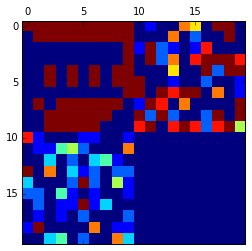

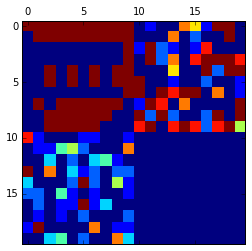

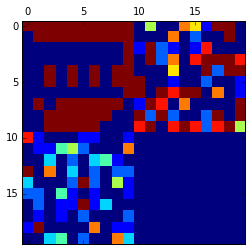

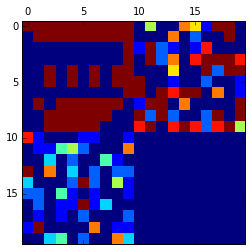

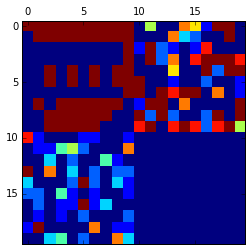

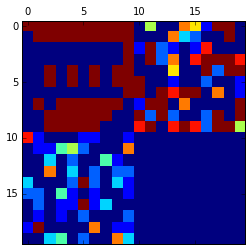

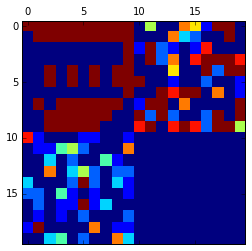

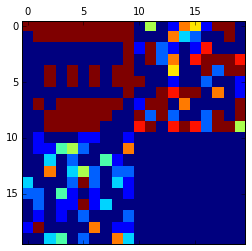

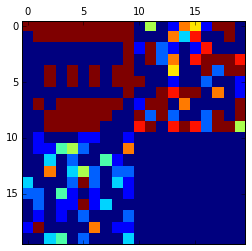

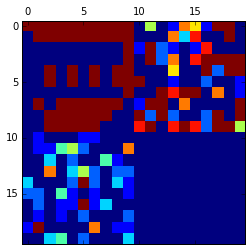

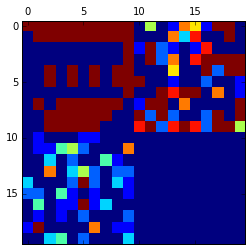

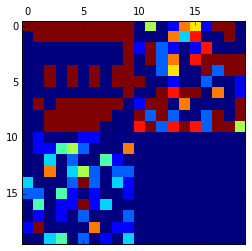

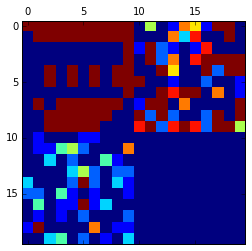

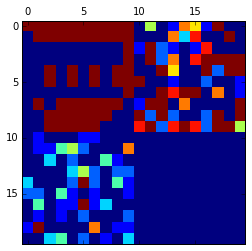

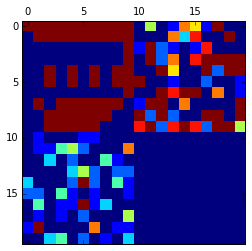

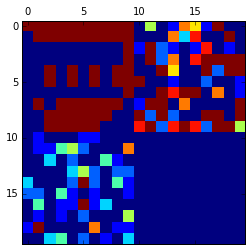

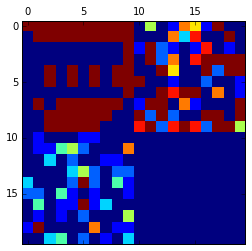

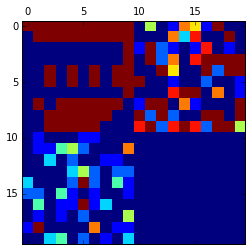

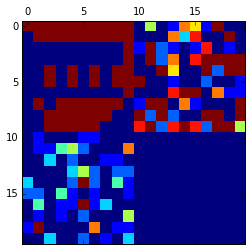

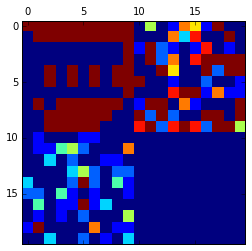

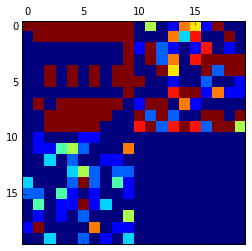

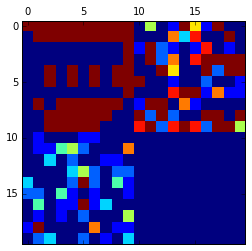

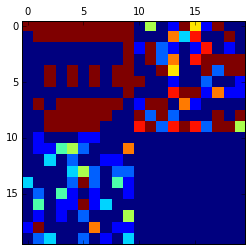

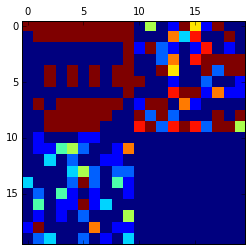

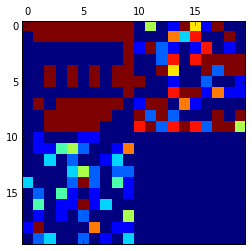

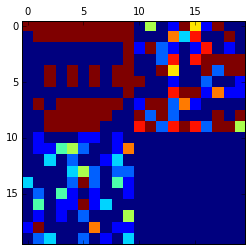

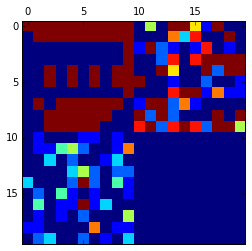

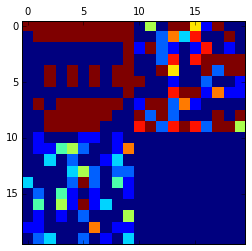

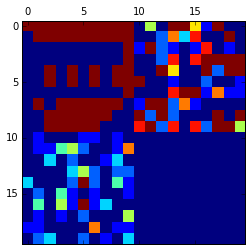

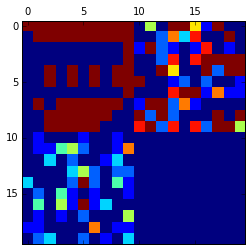

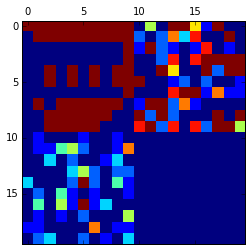

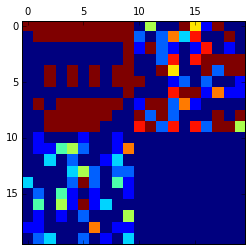

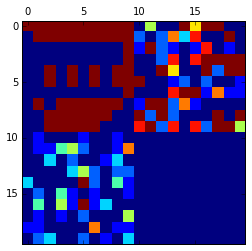

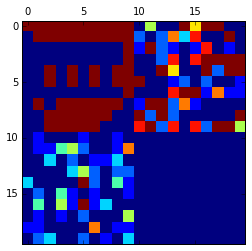

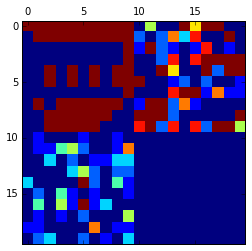

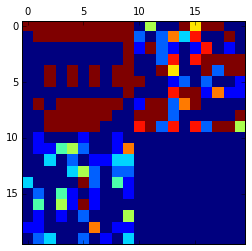

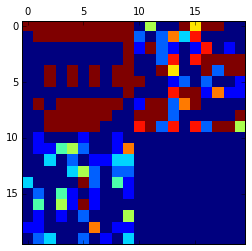

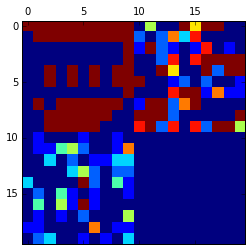

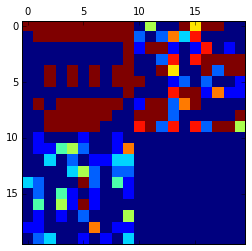

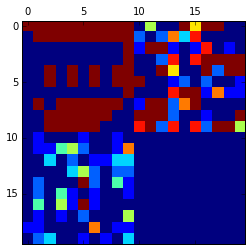

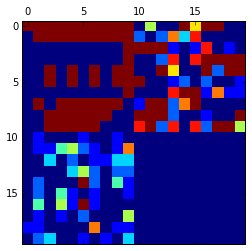

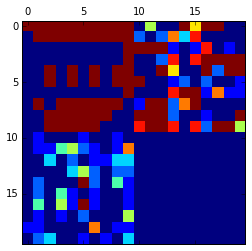

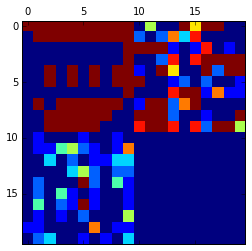

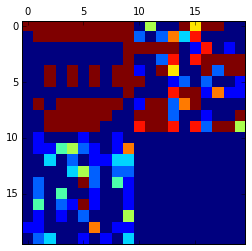

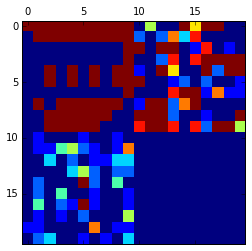

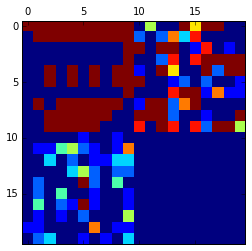

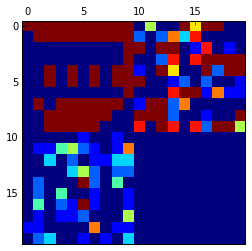

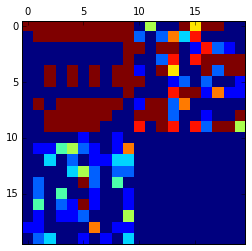

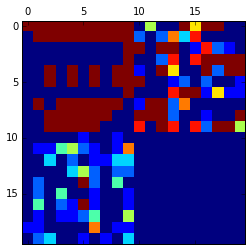

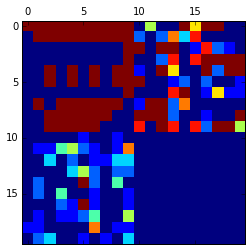

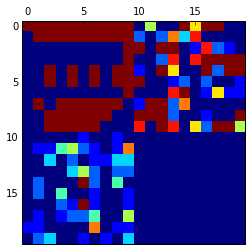

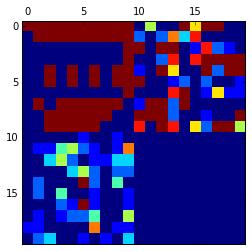

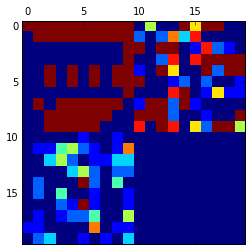

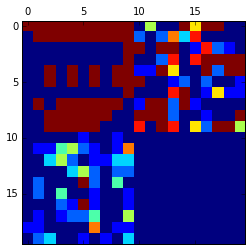

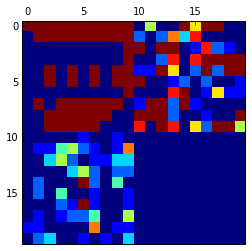

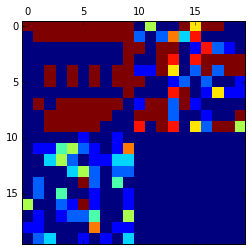

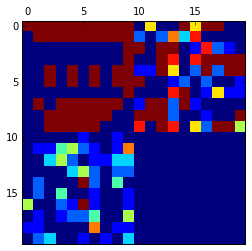

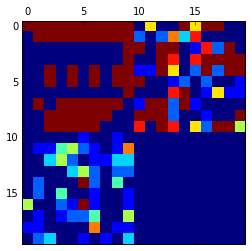

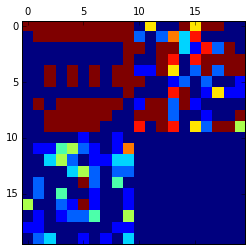

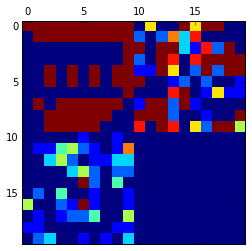

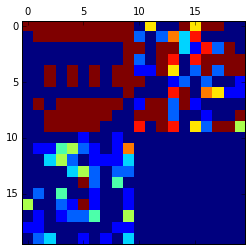

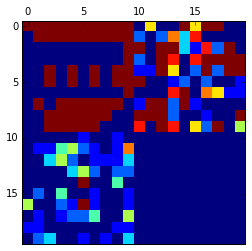

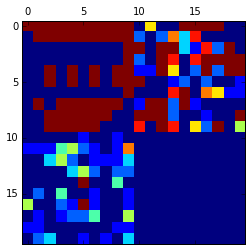

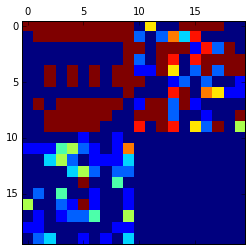

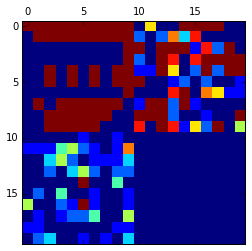

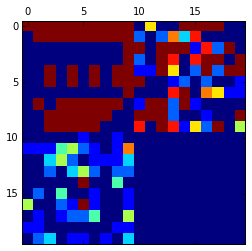

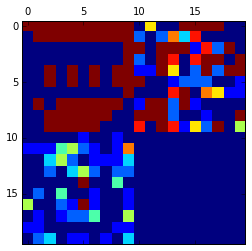

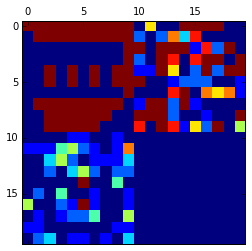

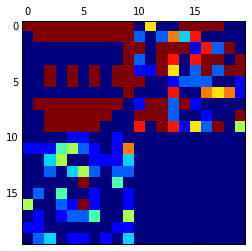

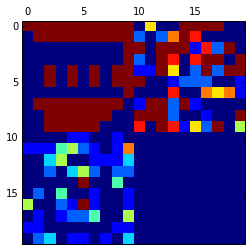

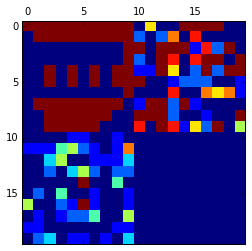

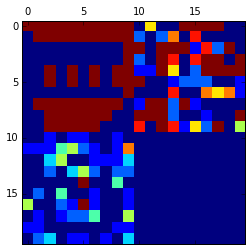

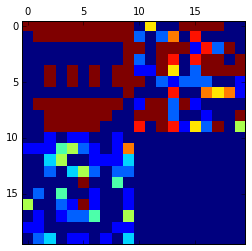

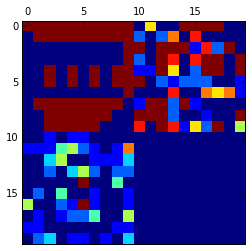

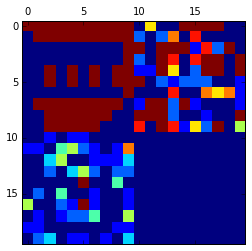

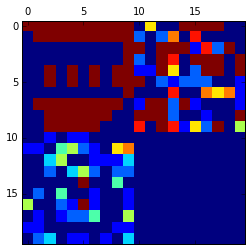

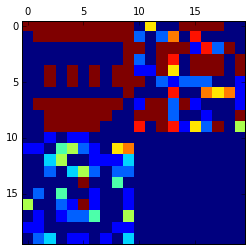

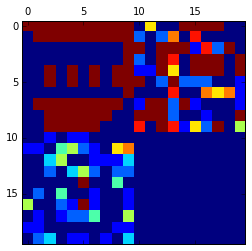

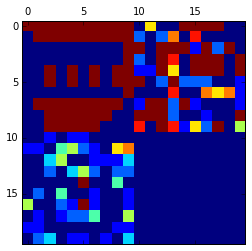

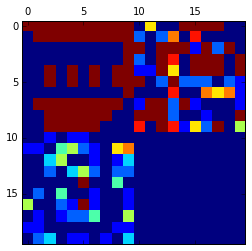

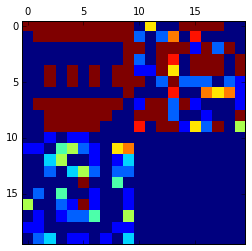

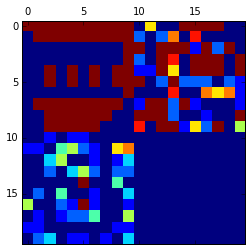

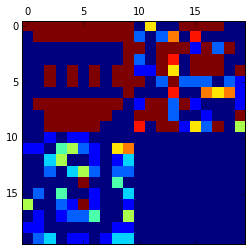

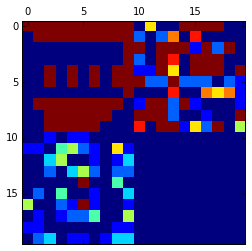

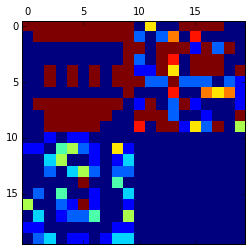

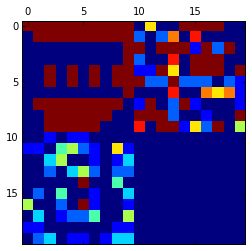

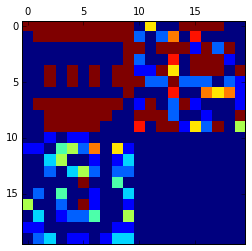

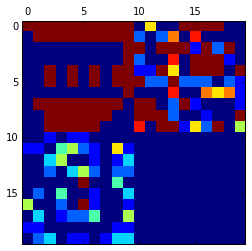

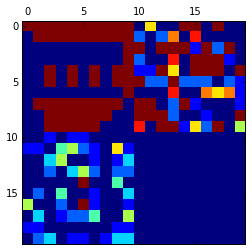

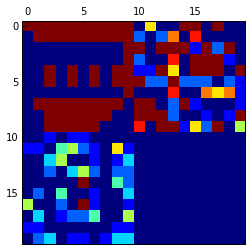

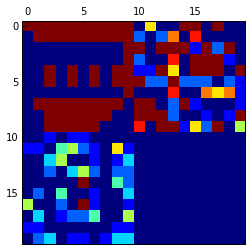

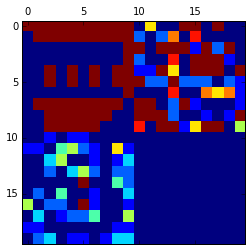

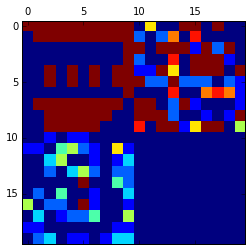

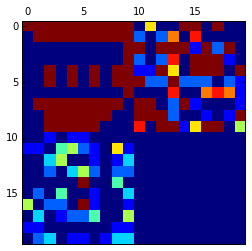

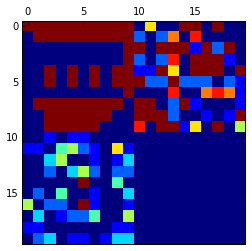

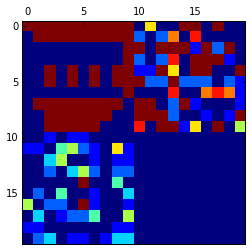

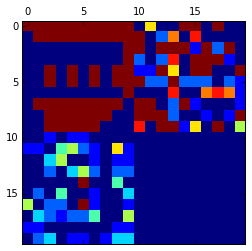

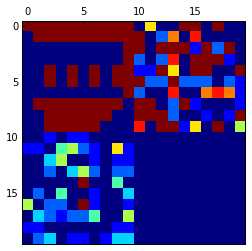

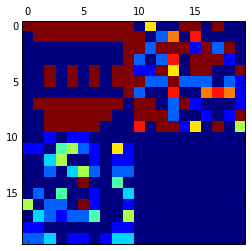

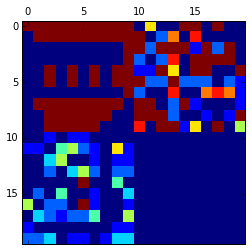

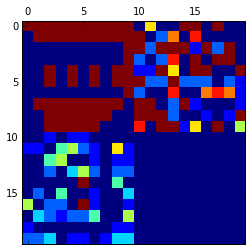

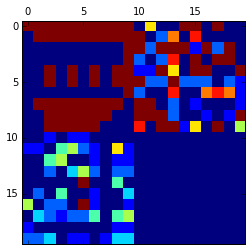

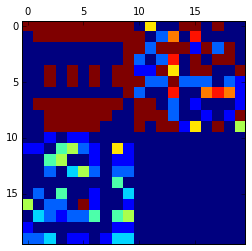

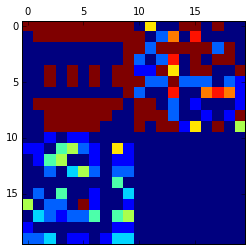

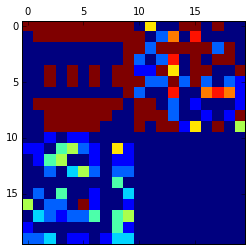

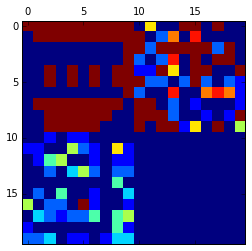

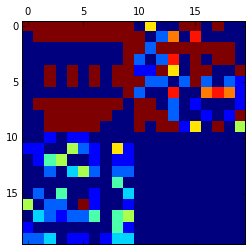

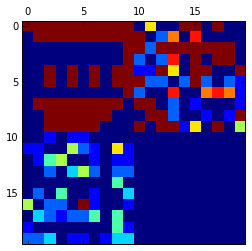

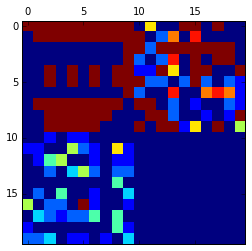

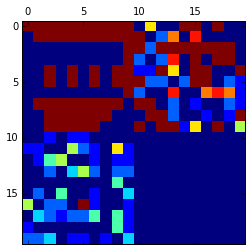

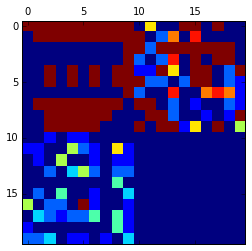

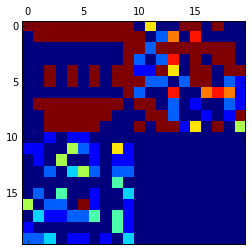

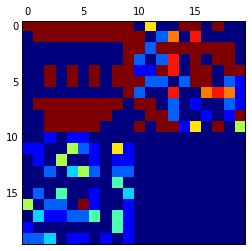

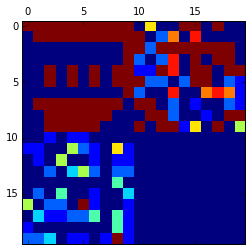

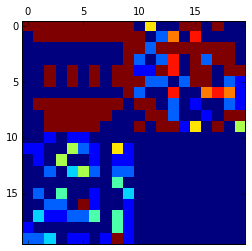

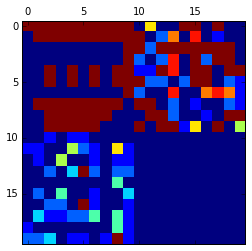

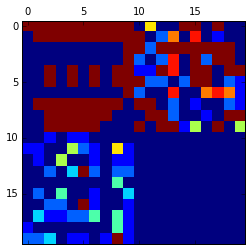

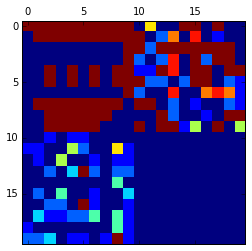

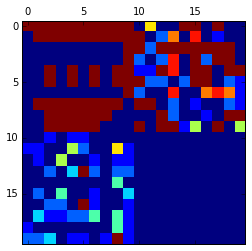

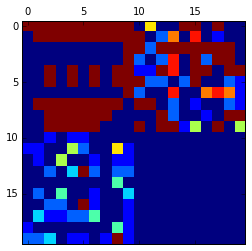

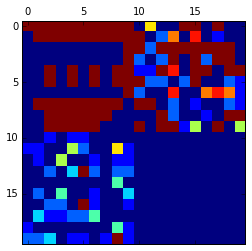

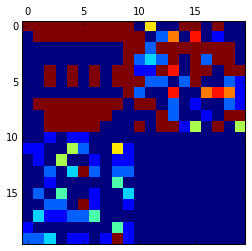

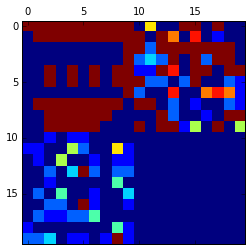

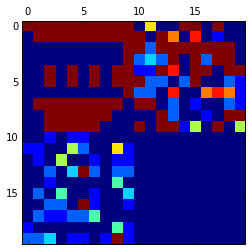

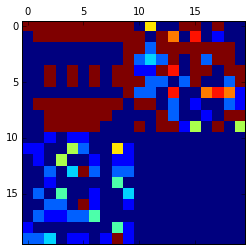

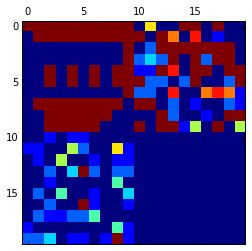

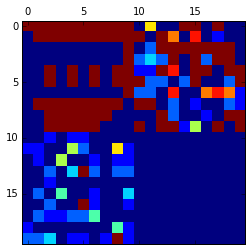

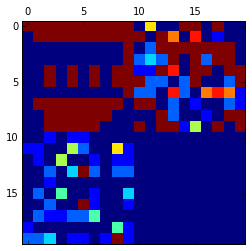

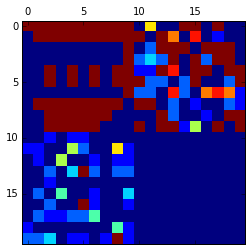

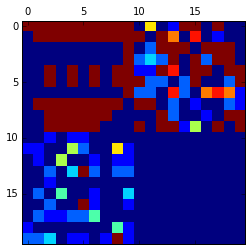

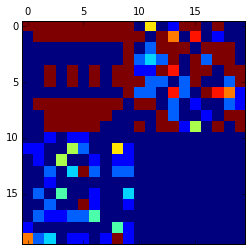

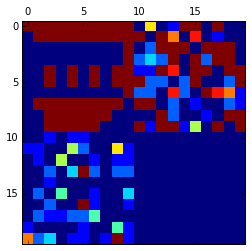

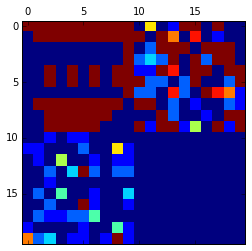

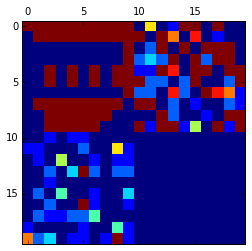

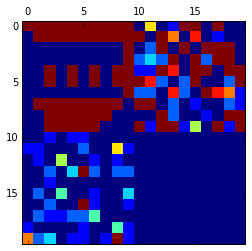

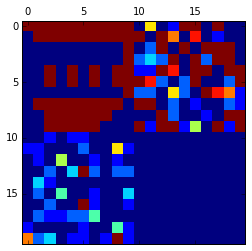

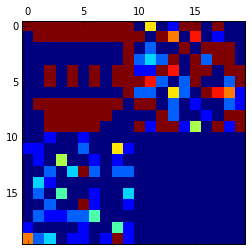

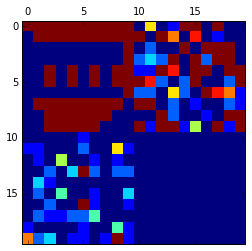

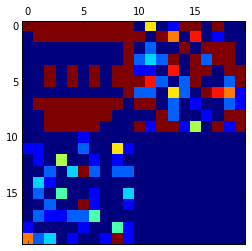

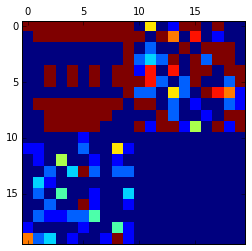

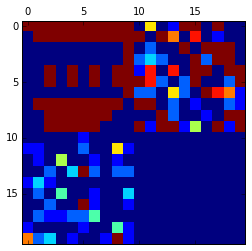

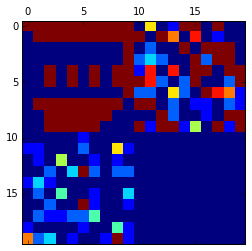

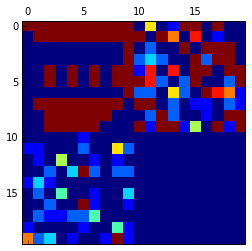

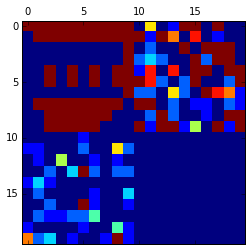

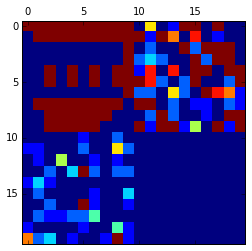

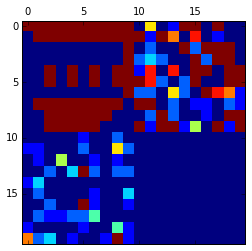

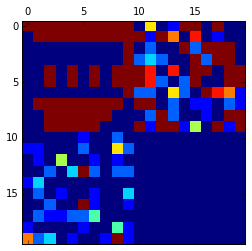

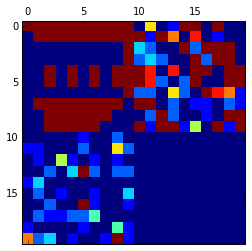

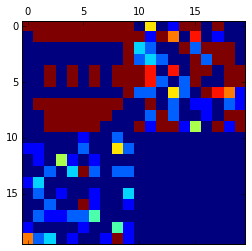

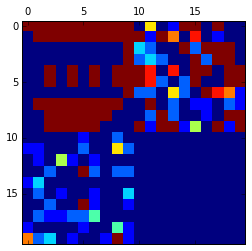

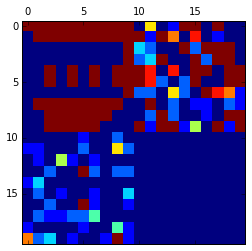

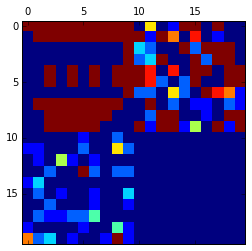

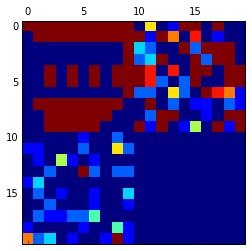

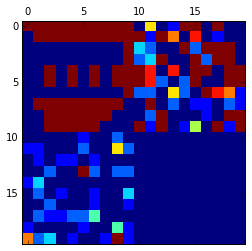

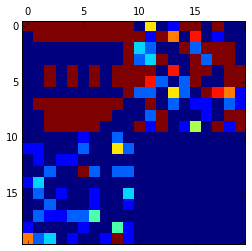

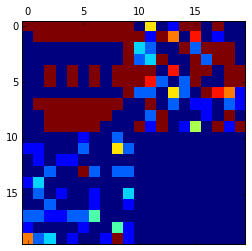

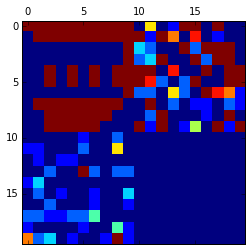

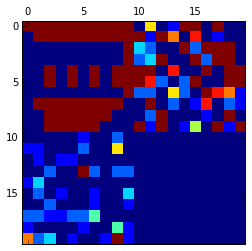

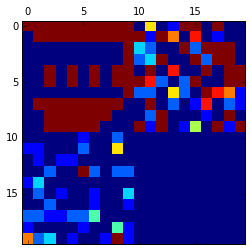

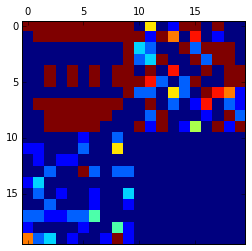

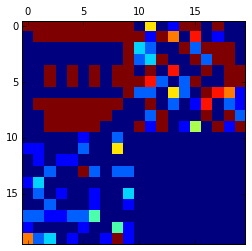

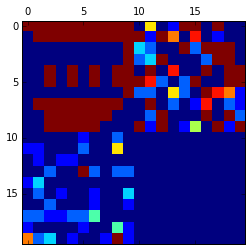

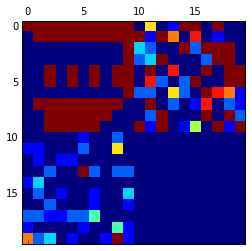

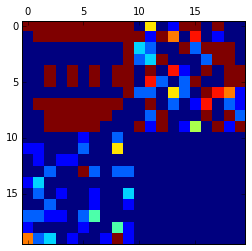

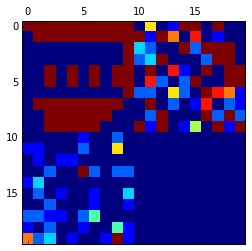

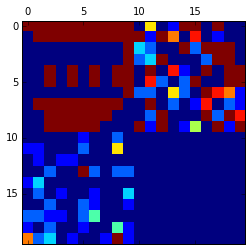

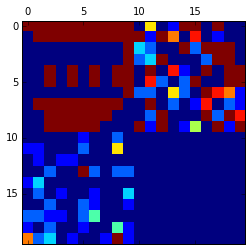

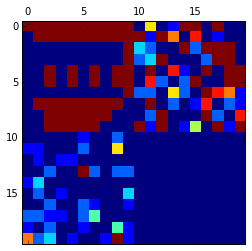

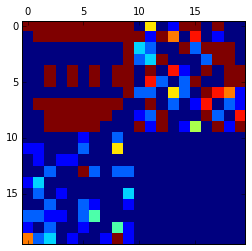

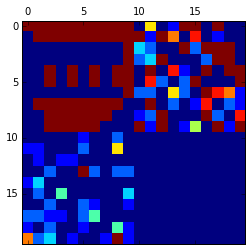

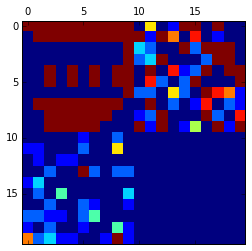

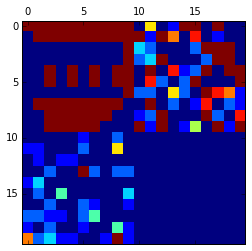

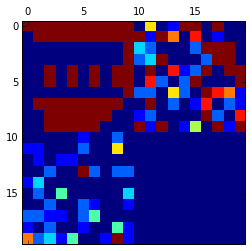

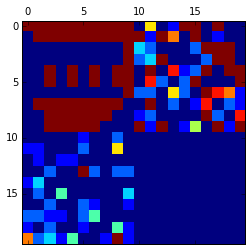

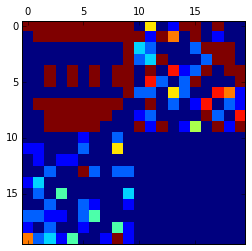

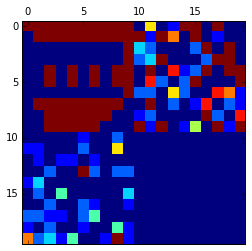

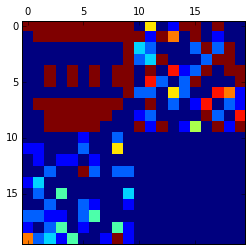

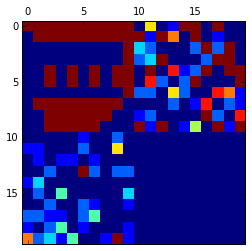

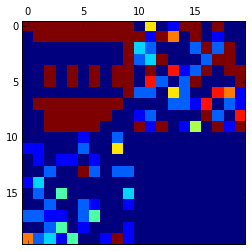

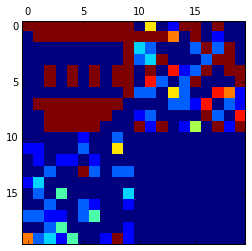

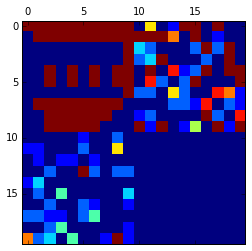

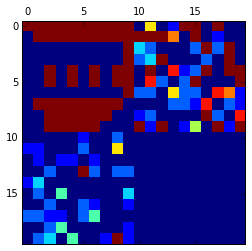

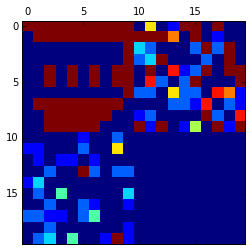

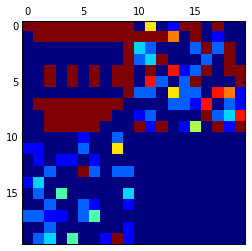

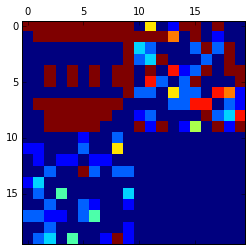

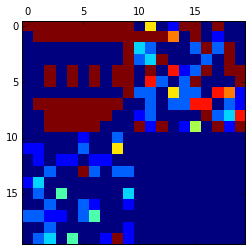

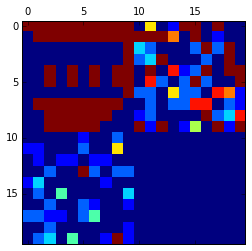

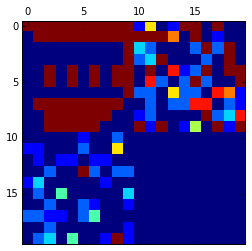

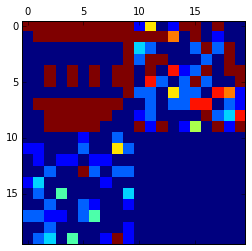

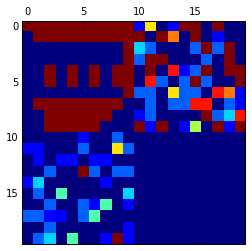

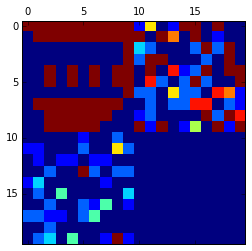

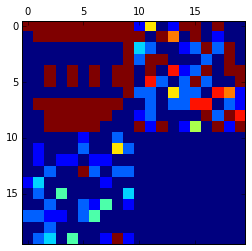

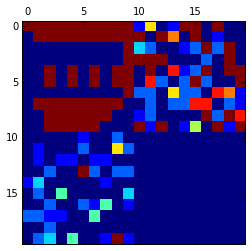

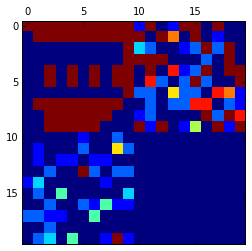

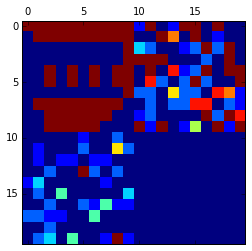

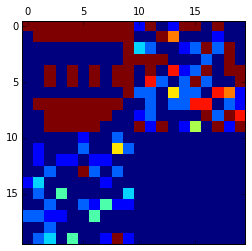

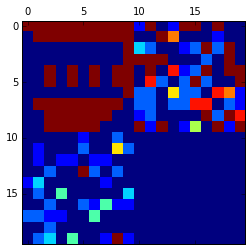

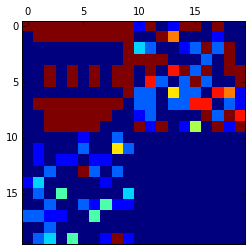

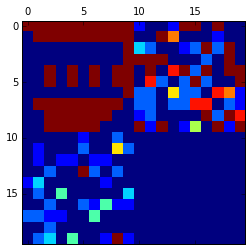

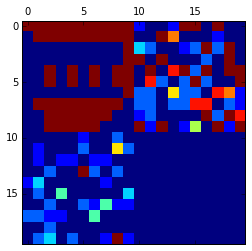

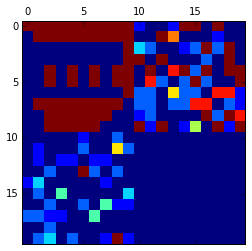

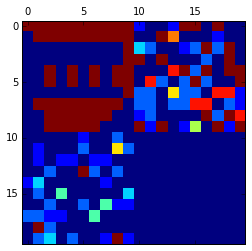

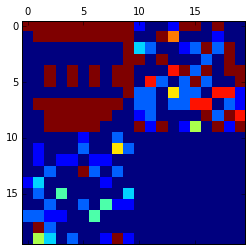

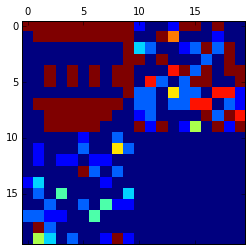

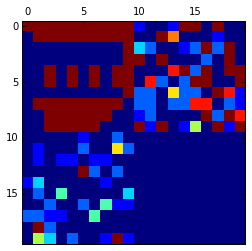

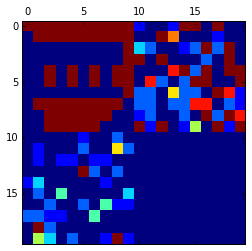

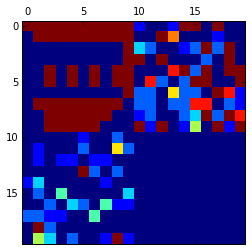

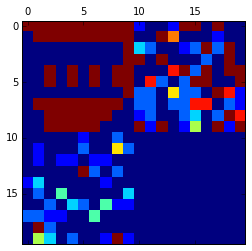

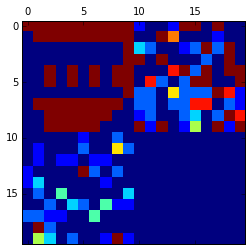

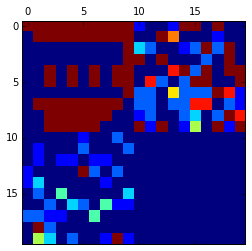

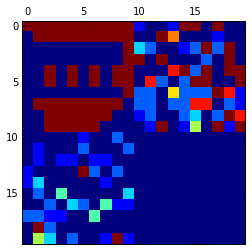

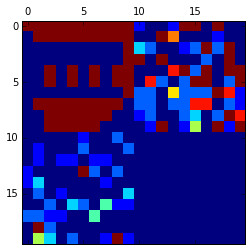

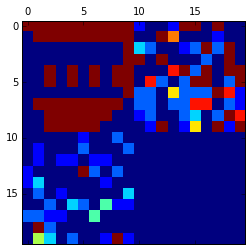

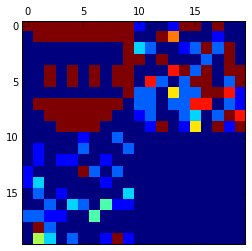

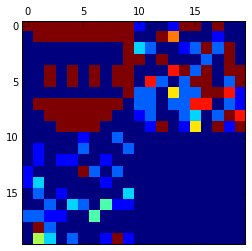

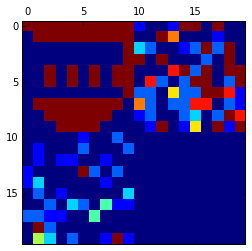

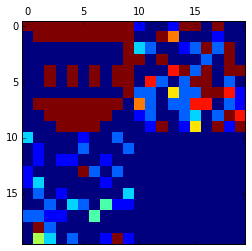

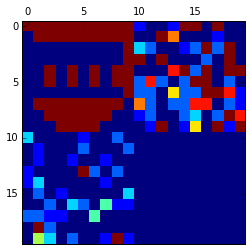

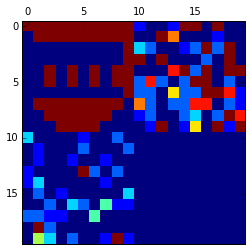

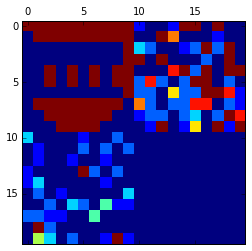

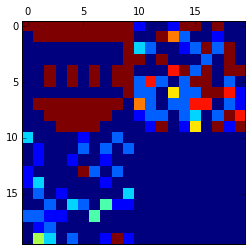

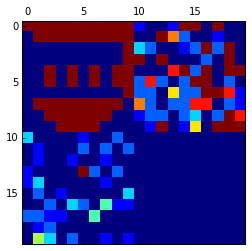

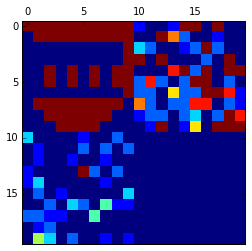

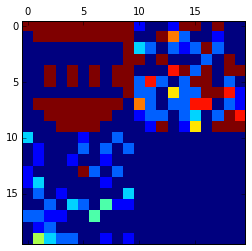

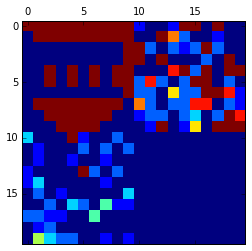

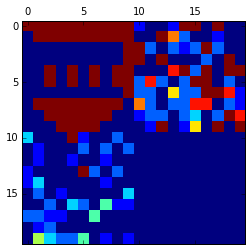

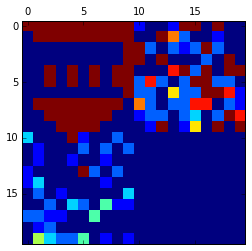

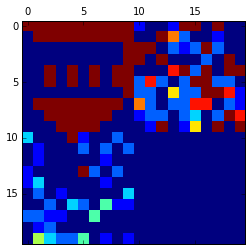

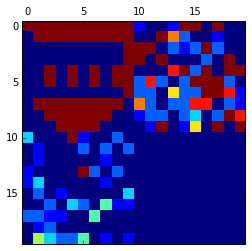

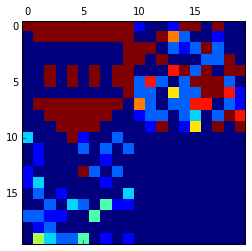

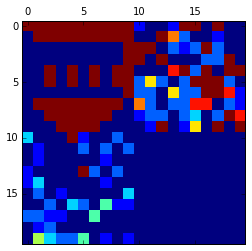

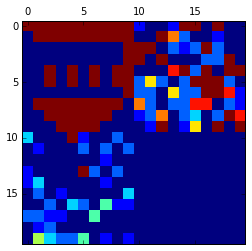

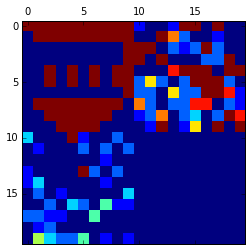

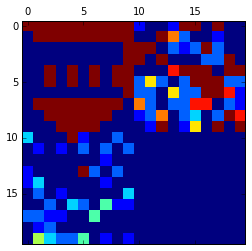

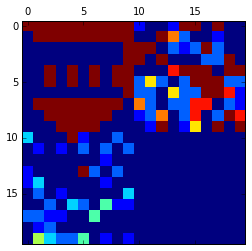

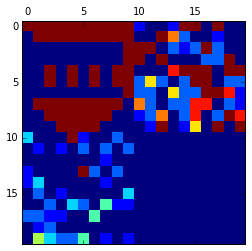

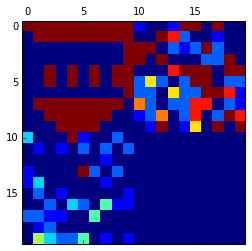

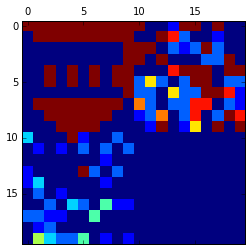

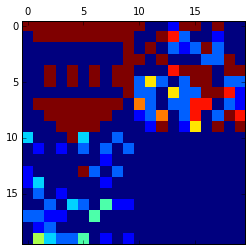

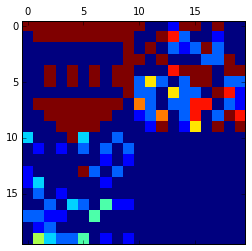

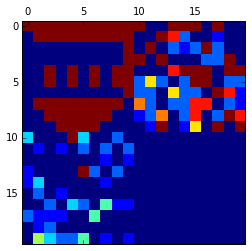

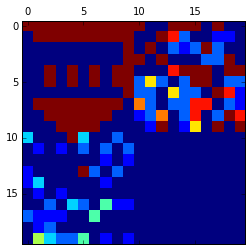

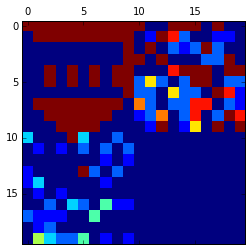

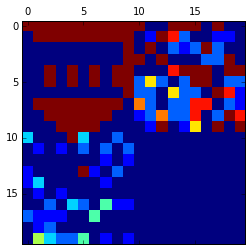

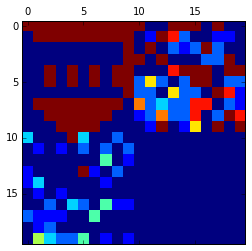

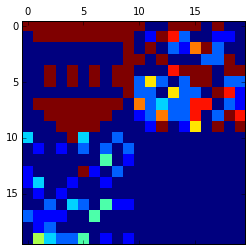

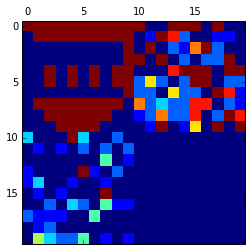

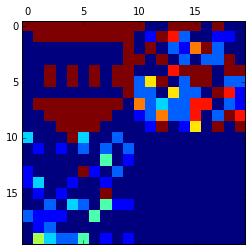

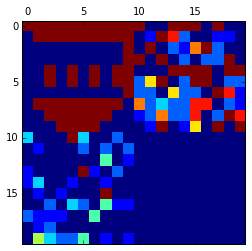

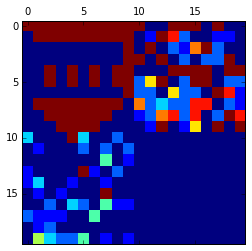

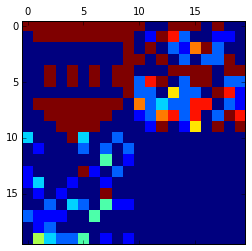

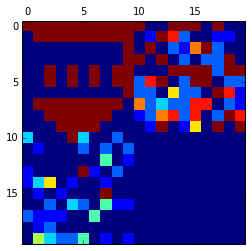

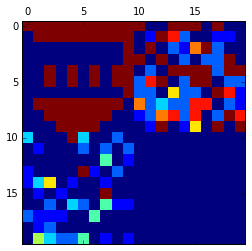

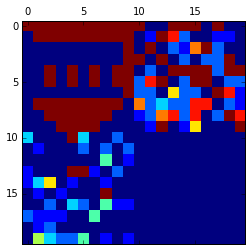

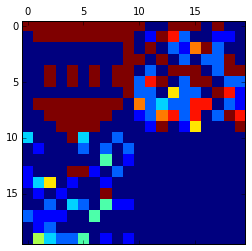

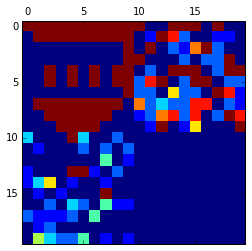

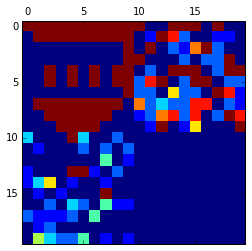

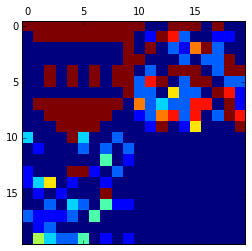

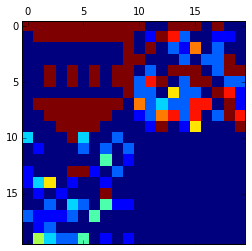

In [485]:
for i in range(1000):
    print i
    matshow(table_list_1000[i])
    savefig("./pics/%d.png" % i)